# DSP W_1_14

14.	Загрузите набор данных о стоимости медицинских процедур и создайте модель регрессии для определения стоимости процедур на основе их характеристик.

In [3]:
%reset -f

In [4]:
#https://gomask.ai/marketplace/datasets/healthcare-procedure-cost-dataset

In [5]:
# Импорт стандартных модулей
import sys
import collections
from typing import List, Tuple

# Импорт сторонних библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [6]:
# decorators module


#------Decorators For EDA-------------------------------------------------------------------------------

def data_descr_decorator(f):
    def wrapper(df):
        print('View the data types and basic statistics before the pre-processing')
        res = f(df)
        print('Ready to proceed to the next stage...')
        return res
    return wrapper

def hist_decorator(f):
    def wrapper(df):
        print('View the data types and basic statistics before the pre-processing')
        res = f(df)
        print('Ready to proceed to the pre-processing...')
        return res
    return wrapper
    
def heatmap_decorator(f):
    def wrapper(df):
        print('This is a a heatmap as part of exploratory data analysis.')
        res = f(df)
        print('This is the end of the heatmap diagram...')
        return res
    return wrapper
    
def whisker_box_decorator(f):
    def wrapper(df):
        print('This is a whisker box diagram as part of exploratory data analysis..')
        res = f(df)
        print('The end of the whisker box diagram...')
        return res
    return wrapper

In [7]:
%matplotlib inline

In [8]:
#EDA module

# Импорт стандартных модулей
import sys
import collections
from typing import List, Tuple

# Импорт сторонних библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import decor_module as d

#----------------------------------Show Types and Stats------------------------------------------------
@d.data_descr_decorator
def view_data(df):

    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    print(df.info())
    print(df.describe())
    print(df.head())
    print(df.dtypes)
    return df


#-----------------------------------Histograms---------------------------------------------------------

@d.hist_decorator
def plot_histogram(df):
    
    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    # Установка стиля Seaborn для красивых графиков
    sns.set(style="whitegrid")
    
    # Создание гистограмм для каждой числовой переменной
    df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
    
    # Добавление названий для каждого графика и осей
    for ax in plt.gcf().get_axes():
        ax.set_xlabel('Значение')
        ax.set_ylabel('Частота')
        ax.set_title(ax.get_title())
        #ax.set_title(ax.get_title().replace('wine_class', 'Класс вина'))
    
    # Регулировка макета для предотвращения наложения подписей
    plt.tight_layout()
    
    # Показать график
    plt.show()


#-------------------------------------Heatmaps----------------------------------------------------------
@d.heatmap_decorator
def plot_heatmap(df):
    
    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    # Установка стиля Seaborn
    sns.set(style="white")
    
    # Расчет корреляционной матрицы только для числовых данных
    numeric_df = df.select_dtypes(include=[np.number])  # Исключаем нечисловые столбцы
    corr = numeric_df.corr()
    
    # Маска для отображения только нижней треугольной части матрицы (опционально)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Настройка цветовой палитры
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Создание тепловой карты
    plt.figure(figsize=(30, 16))
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    # Добавление заголовка
    plt.title('Тепловая карта корреляций', fontsize=20)
    
    # Показать график
    plt.show()


#------------------------------------WhiskerBox-----------------------------------------------------------
@d.whisker_box_decorator
def plot_whisker_box(df):

    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    # Установка стиля Seaborn
    sns.set(style="whitegrid")
    
    # Предполагаем, что df — это ваш DataFrame
    # Создаем ящики с усами для каждой колонки в DataFrame
    plt.figure(figsize=(12, 50))
    
    # Перебираем каждый числовой столбец и создаем для него ящик с усами
    for index, column in enumerate(df.select_dtypes(include=[np.number]).columns):
        plt.subplot((len(df.columns) // 3) + 1, 3, index + 1)
        sns.boxplot(y=df[column])
    
    plt.tight_layout()
    plt.show()


#------------------------------------FeatureImportancePlot--------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('Agg') # Non-interactive backed for containers
import pandas as pd
import numpy as np
from scipy.sparse import issparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import issparse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import issparse


def show_or_save(filename = None):
    if filename:
        plt.savefig(filename, dpi = 300, bbox_inches = 'tight')
    #plot.close()

def plot_feature_importance_rf(model, X_train, feature_names=None, max_features=50):
    """
    Function to plot the top N feature importance of a trained Random Forest model.
    
    :param model: The trained RandomForestRegressor model.
    :param X_train: The training dataset (features), can be a dense or sparse matrix.
    :param feature_names: List of feature names to match with the feature importance. 
                          If None, feature names are taken from X_train.columns if X_train is a DataFrame.
    :param max_features: Maximum number of top features to display.
    """
    # Get feature importance
    importance = model.feature_importances_

    # Generate feature names if not provided
    if feature_names is None:
        if hasattr(X_train, 'columns'):
            feature_names = X_train.columns
        elif hasattr(X_train, 'shape'):
            feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
        else:
            raise ValueError("Feature names must be provided for non-DataFrame input.")

    if len(importance) != len(feature_names):
        raise ValueError(f"Number of features in 'importance' ({len(importance)}) does not match number of feature names ({len(feature_names)}).")

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })

    # Sort features by importance (descending)
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Limit to top max_features
    feature_importance_df = feature_importance_df.head(max_features)

    # Plot
    plt.figure(figsize=(12, 8))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xticks(rotation=90, ha='center')
    plt.subplots_adjust(bottom=0.3)  # Adjust for longer labels
    plt.ylabel('Importance')
    plt.title(f'Top {max_features} Feature Importances (Random Forest)')
    plt.tight_layout()
    
    #plt.show()
    show_or_save('plot.png')
    plt.close()
    print("Top Feature Importances:")
    print(feature_importance_df)

    return feature_importance_df




def get_feature_names(X_train, feature_names=None):
    """
    Returns feature names based on the type of X_train.
    :param X_train: The input features (DataFrame, NumPy array, or sparse matrix).
    :param feature_names: If not provided, will try to extract feature names from X_train.
    :return: List of feature names.
    """
    # Case 1: If X_train is a pandas DataFrame
    if hasattr(X_train, 'columns'):
        return X_train.columns.tolist()
    
    # Case 2: If X_train is a NumPy array
    elif isinstance(X_train, np.ndarray):
        return [f"Feature {i}" for i in range(X_train.shape[1])]
    
    # Case 3: If X_train is a sparse matrix (e.g., from OneHotEncoder)
    elif issparse(X_train):
        if feature_names is None:
            raise ValueError("Sparse matrix provided, but feature names must be explicitly passed.")
        return feature_names  # Feature names must be explicitly passed for sparse matrices
    
    # Default case: unsupported type for X_train
    else:
        raise ValueError("Unsupported type for X_train.")

def plot_feature_importance(model, X_train, feature_names=None):
    """
    Function to plot the feature importance of a trained model with a vertical bar plot.
    This function works for both Linear Regression and Random Forest models.
    
    :param model: The trained model (RandomForestRegressor, LinearRegression, etc.).
    :param X_train: The training dataset (features), can be a dense or sparse matrix.
    :param feature_names: List of feature names to match with the feature importance. 
                          If None, feature names are taken from X_train.columns if X_train is a DataFrame.
    """
    # Check if the model has 'feature_importances_' (e.g., RandomForest) or 'coef_' (LinearRegression)
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_  # RandomForestRegressor, GradientBoosting, etc.
        importance_type = 'Feature Importance'
    elif hasattr(model, 'coef_'):  # For models like LinearRegression
        importance = model.coef_
        importance_type = 'Coefficients'
    else:
        raise ValueError("Model does not have 'feature_importances_' or 'coef_' attribute.")
    
    # Get feature names using the get_feature_names function
    feature_names = get_feature_names(X_train, feature_names)

    if len(importance) != len(feature_names):
        raise ValueError(f"Number of features in 'importance' ({len(importance)}) does not match number of feature names ({len(feature_names)}).")


    # Create a DataFrame for feature importance or coefficients
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })
    
    # Sort the features by importance (descending order)
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plotting the feature importance (vertical histogram)
    plt.figure(figsize=(12, 8))  # Increase figure width to fit labels
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    
    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=90, ha='center')
    
    # Compress the x-axis to give more space for labels
    plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to fit labels
    
    plt.ylabel('Importance')
    plt.title(f'{importance_type} - {model.__class__.__name__}')
    plt.tight_layout()  # Automatically adjust the layout to prevent clipping
    plt.show()
    
    # Output the feature importance table
    print(f"{importance_type}:")
    print(feature_importance_df)

    return feature_importance_df



In [9]:
# ml_module.py
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import eda_module as eda
import decor_module as d

import warnings
from tqdm import TqdmWarning

# Ignore tqdm notebook warnings
warnings.filterwarnings("ignore", category=TqdmWarning)


def load_data(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    file_path = str(file_path) # ensuring the file_path is a string
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f'File not found..')

        if file_path.endswith('.zip'):
            with zipfile.ZipFile(file_path, 'r') as zip_index:
                zip_files = zip_index.namelist()
                print(f'Files in zip {zip_files}')
                zip_file = zip_files[0]
                with zip_index.open(zip_file) as file:
                    return _load_by_extension(file_path, zip_file)
                    
        file_ext = os.path.splitext(file_path)[1].lower()

        return _load_by_extension(file_path, file_ext)

    except FileNotFoundError as e:
        print(f"File not found: {e}")

    except ValueError as e:
        print(f'Value error: {e}')

    except Exception as e:
        print(f'Undefined error: {e}')

    finally:
        print(f'Attempted data loading..')


def _load_by_extension(file_path, file_ext):
    
    if file_ext == '.csv':
        return pd.read_csv(file_path)

    elif file_ext == '.json':
        return pd.read_json(file_path)

    elif file_ext == '.txt':
        return pd.read_txt(file_path, delimiter = '\t') # tab separation is assumed

    elif file_ext in ['.xlsx', '.xls']:
        return pd.read_excel(file_path)

    elif file_ext == '.parquet':
        return pd.read_parquet(file_path)

    else:
        raise ValueError(f'Unsupported file {file_ext}')
    
def _preprocess_date_columns(df, date_columns):

    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors = 'coerce')

    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_weekday'] = df[col].dt.weekday
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_quarter'] = df[col].dt.quarter
    df[f'{col}_day_of_year'] = df[col].dt.dayofyear

    # cyclic encoding for month and weekday
    df[f'{col}_month_sin'] = np.sin(2*np.pi*df[f'{col}_month']/12)
    df[f'{col}_month_cos'] = np.cos(2*np.pi*df[f'{col}_month']/12)
    df[f'{col}_weekday_sin'] = np.sin(2*np.pi*df[f'{col}_weekday']/7)
    df[f'{col}_weekday_cos'] = np.cos(2*np.pi*df[f'{col}_weekday']/7)

    df[f'{col}_is_weekend'] = df[f'{col}_weekday'].isin([5,6])

    return df

def preprocess_data(df, drop_columns, target_column):
    """
    Предобработка данных: разделение на признаки и целевую переменную, масштабирование признаков.
    :param df: DataFrame с данными.
    :param target_column: Имя столбца с целевой переменной.
    :return: Обработанные признаки, целевая переменная, препроцессор.
    """

    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    #df['date'] = pd.to_datetime(df['date'])

    date_columns = ['payment_date', 'procedure_date']
    df = _preprocess_date_columns(df, date_columns)
    
    df = df.set_index('procedure_description', inplace = False)
    df = df.drop(columns = drop_columns) 
    #df = df.dropna() # remove nan values
    df = df.drop_duplicates() # remove duplicates

    # imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    # imp.fit(df)
    # imp = SimpleImputer(strategy = "most_frequent" )
    # imp.fit_transform(df)
    
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Определение числовых и категориальных признаков
    # numeric_features = ['patient_age']
    # categorical_features = ['patient_gender', 'patient_race_ethnicity', 'patient_zip_code', 'insurance_type',\
    #     'provider_name', 'provider_city', 'provider_state', 'provider_postal_code', 'procedure_outcome']

    
    numeric_features = X.select_dtypes(include = ['number']).columns
    categorical_features = X.select_dtypes(include = ['object']).columns
    
    X[numeric_features] = X[numeric_features].fillna(X[numeric_features].median())
    for col in categorical_features:
        X[col] = X[col].fillna(X[col].mode()[0])
    
    # Создание препроцессора
    # numeric_transformer = StandardScaler()
    # categorical_transformer = OneHotEncoder(drop='first')
    # date_transformer = _preprocess_date_columns(df, date_columns)

    numeric_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(drop = 'first'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    #print('features: ', X.columns.tolist())
    
    # Применение препроцессора к данным
    X_processed = preprocessor.fit_transform(X)
    print(X_processed, y)
    print("Данные успешно предобработаны.")

    # Extract feature names after transformations
     # Extract the one-hot encoded feature names from the encoder
    categorical_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    
    # Combine numeric and categorical feature names
    feature_names = numeric_features.tolist() + categorical_feature_names.tolist()
    print('features',feature_names)
    
    return X_processed, y




import optuna
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


def objective(trial, X_train, y_train):
    """
    Objective function for Optuna hyperparameter optimization.
    We define the hyperparameter space and optimize for MAE and R2.
    """
    
    # Hyperparameters for RandomForestRegressor
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 50, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    # Correct the max_features parameter selection
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Removing 'auto'
    
    # Initialize RandomForestRegressor with hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Predict and calculate metrics
    y_pred = rf_model.predict(X_train)
    
    # Calculate MAE and R^2 score
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    # Objective: minimize a weighted sum of MAE and the negative of R2
    weight_mae = 0.5
    weight_r2 = 0.5
    
    # We negate R^2 because Optuna minimizes the objective function
    return weight_mae * mae - weight_r2 * r2  # We subtract R^2 since we want to maximize it


def train_model(X, y):
    """
    Train a model using Optuna hyperparameter tuning for MAE and R².
    :param X: Features
    :param y: Target
    :return: Trained models and best hyperparameters.
    """
    
    # Split data into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 1: Train Linear Regression model (without hyperparameter tuning)
    # print("Training Linear Regression model...")
    # linear_model = LinearRegression()
    # linear_model.fit(X_train, y_train)
    # y_pred = linear_model.predict(X_test)
    # print("Linear Regression: MAE =", mean_absolute_error(y_test, y_pred), ", R^2 =", r2_score(y_test, y_pred))
    
    # Step 2: Hyperparameter tuning using Optuna for RandomForestRegressor
    print("Optimizing Random Forest Regressor with Optuna for MAE and R²...")
    
    # Optuna study setup
    study = optuna.create_study(direction='minimize')  # We minimize the objective
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50)  # Run 50 trials
    
    # Get the best hyperparameters
    best_rf_params = study.best_params
    print(f"Best Random Forest hyperparameters: {best_rf_params}")
    
    # Train Random Forest model with the best parameters
    best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
    best_rf_model.fit(X_train, y_train)
    
    # Evaluate the best model on the test set
    rf_y_pred = best_rf_model.predict(X_test)
    print("Random Forest: MAE =", mean_absolute_error(y_test, rf_y_pred), ", R^2 =", r2_score(y_test, rf_y_pred))

    #model = linear_model
    model = best_rf_model
    
    #return linear_model, best_rf_model, best_rf_params
    return model


# def train_model(X, y):
    # """
    # Обучение модели линейной регрессии.
    # :param X: Признаки.
    # :param y: Целевая переменная.
    # :return: Обученная модель.
    # """
    # """
    # Обучение модели на обучающих данных.
    # """
    # if X is None or y is None:
    #     print("Данные не загружены или не предобработаны.")
    #     return

    # try:
    #     model = LinearRegression()
    #     model.fit(X, y)
    #     print("Модель успешно обучена.")
    #     return model
    # except Exception as e:
    #     print(f"Ошибка при обучении модели: {e}")


def predict(model, X):
    """
    Предсказание на новых данных.
    :param model: Обученная модель.
    :param X: Признаки.
    :return: Предсказанные значения.
    """
    return model.predict(X)

def evaluate_model(y_true, y_pred):
    """
    Оценка модели с использованием метрик MSE и R^2.
    :param y_true: Истинные значения.
    :param y_pred: Предсказанные значения.
    :return: MSE, R^2.
    """
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

Attempted data loading..
View the data types and basic statistics before the pre-processing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   record_id                    200 non-null    object 
 1   patient_id                   200 non-null    object 
 2   patient_age                  200 non-null    int64  
 3   patient_gender               200 non-null    object 
 4   patient_race_ethnicity       200 non-null    object 
 5   patient_zip_code             197 non-null    float64
 6   insurance_type               200 non-null    object 
 7   procedure_code               200 non-null    object 
 8   procedure_description        200 non-null    object 
 9   procedure_date               200 non-null    object 
 10  provider_id                  200 non-null    object 
 11  provider_name                196 non-null   

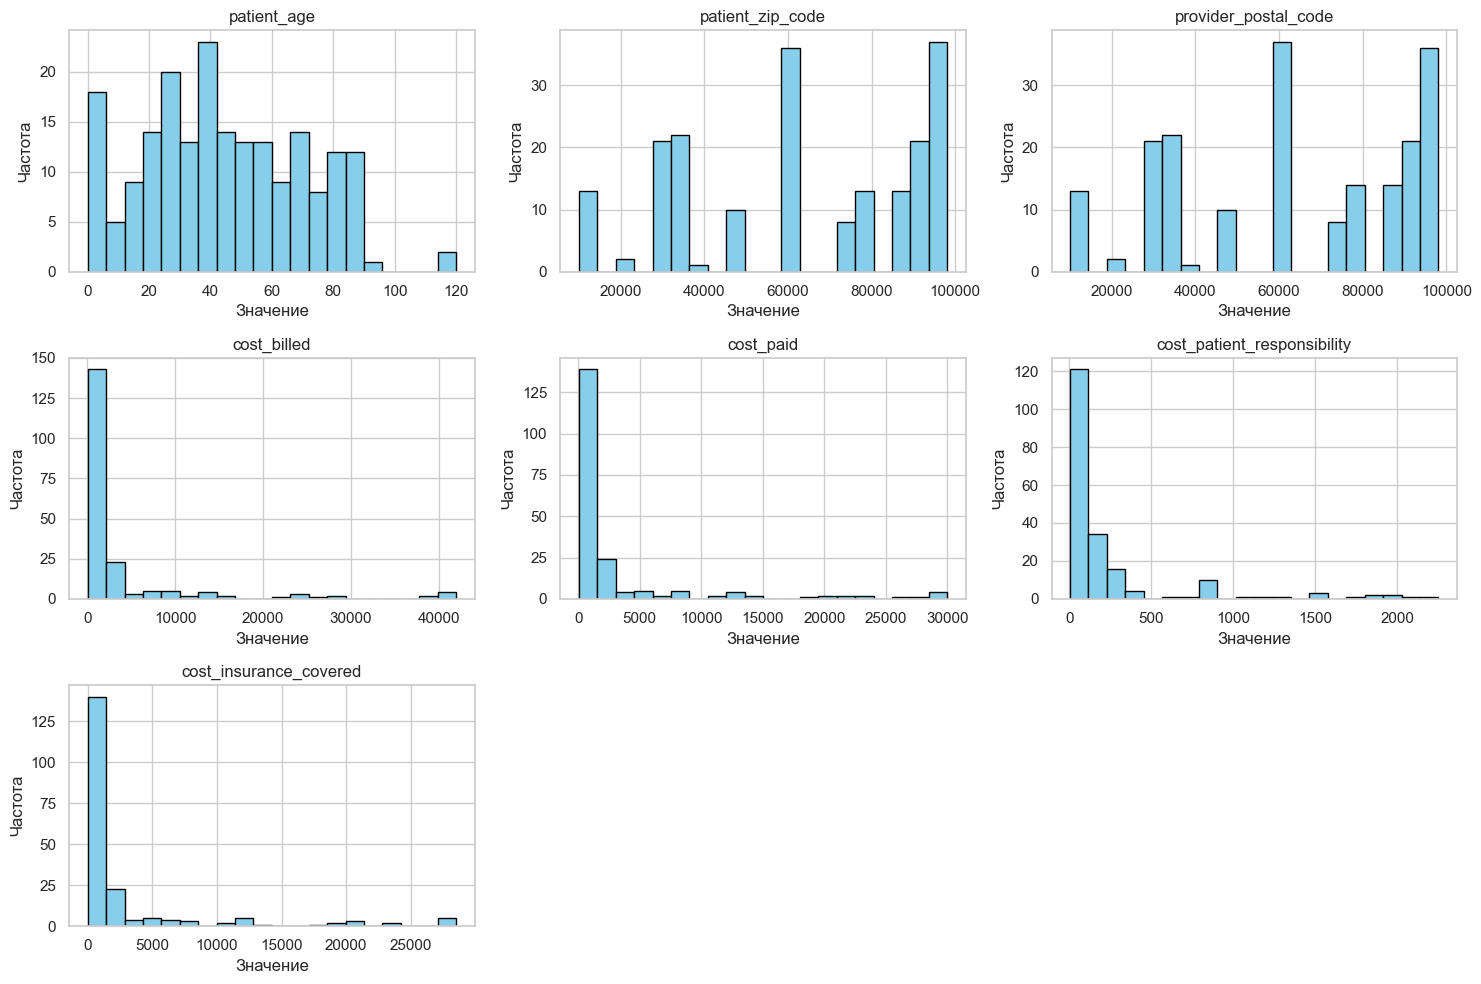

Ready to proceed to the pre-processing...
This is a a heatmap as part of exploratory data analysis.


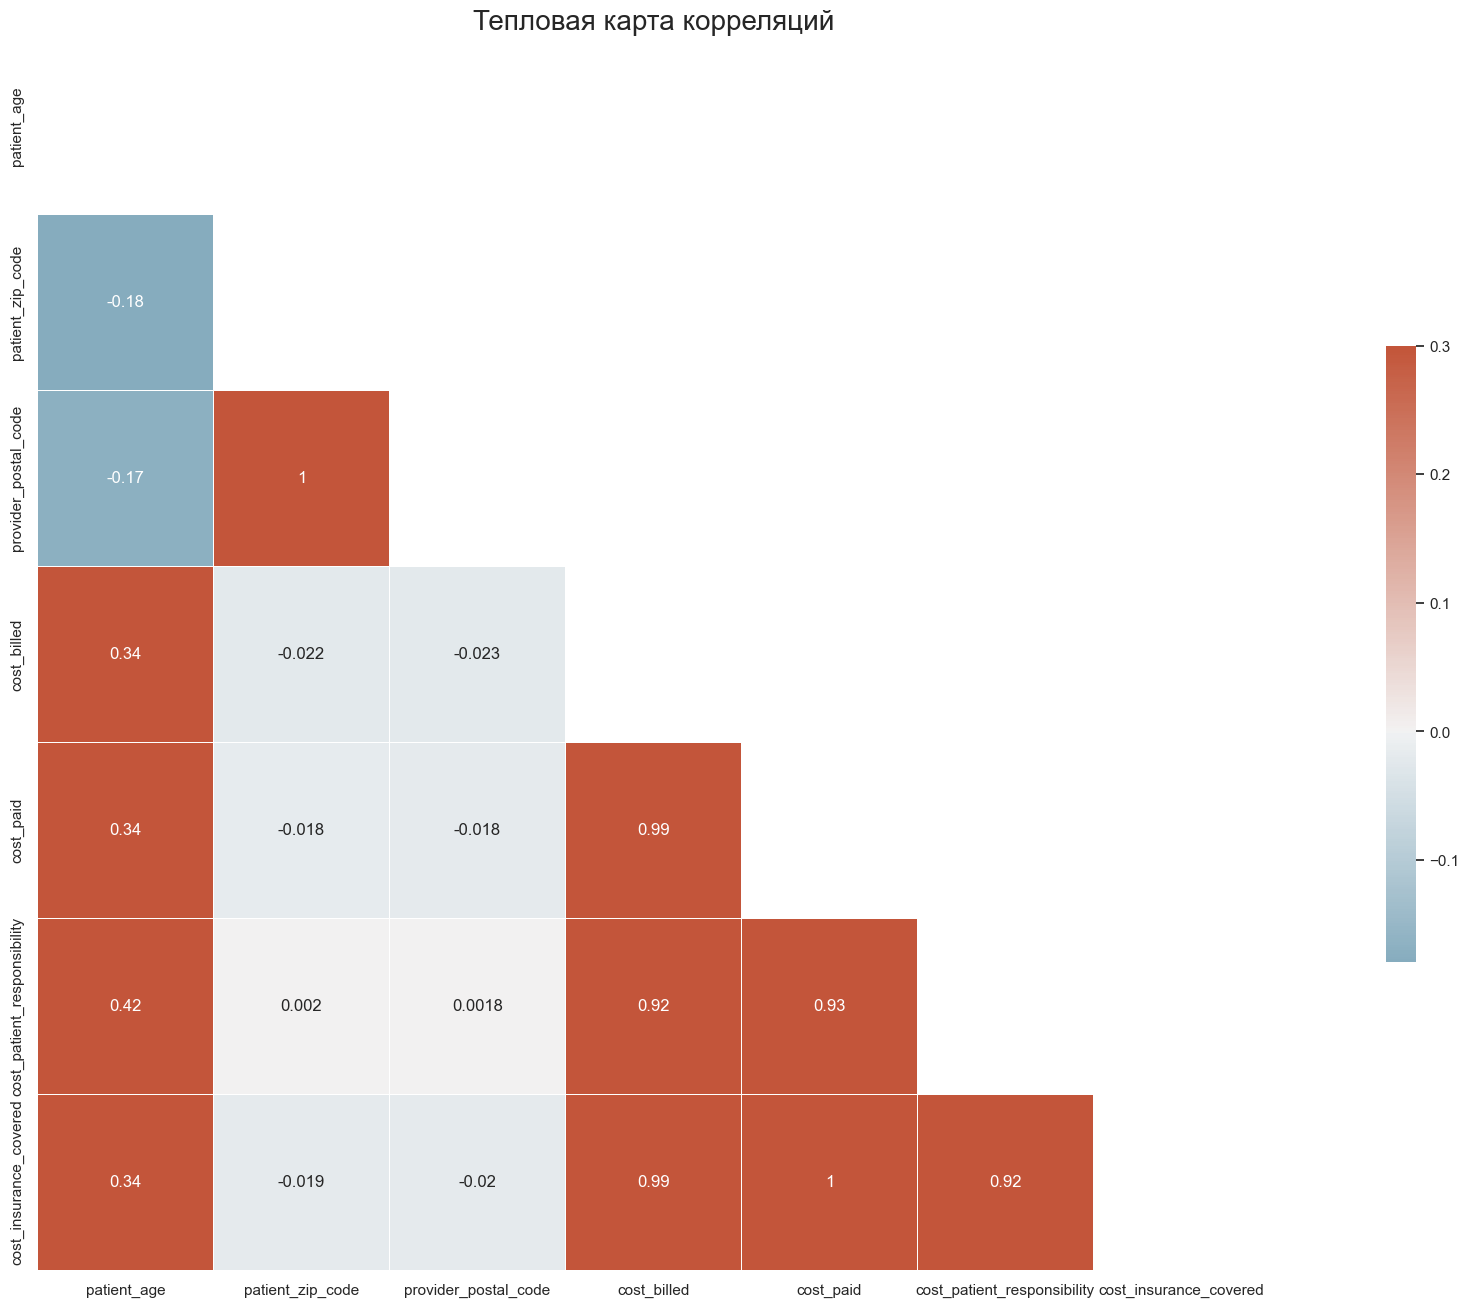

This is the end of the heatmap diagram...
This is a whisker box diagram as part of exploratory data analysis..


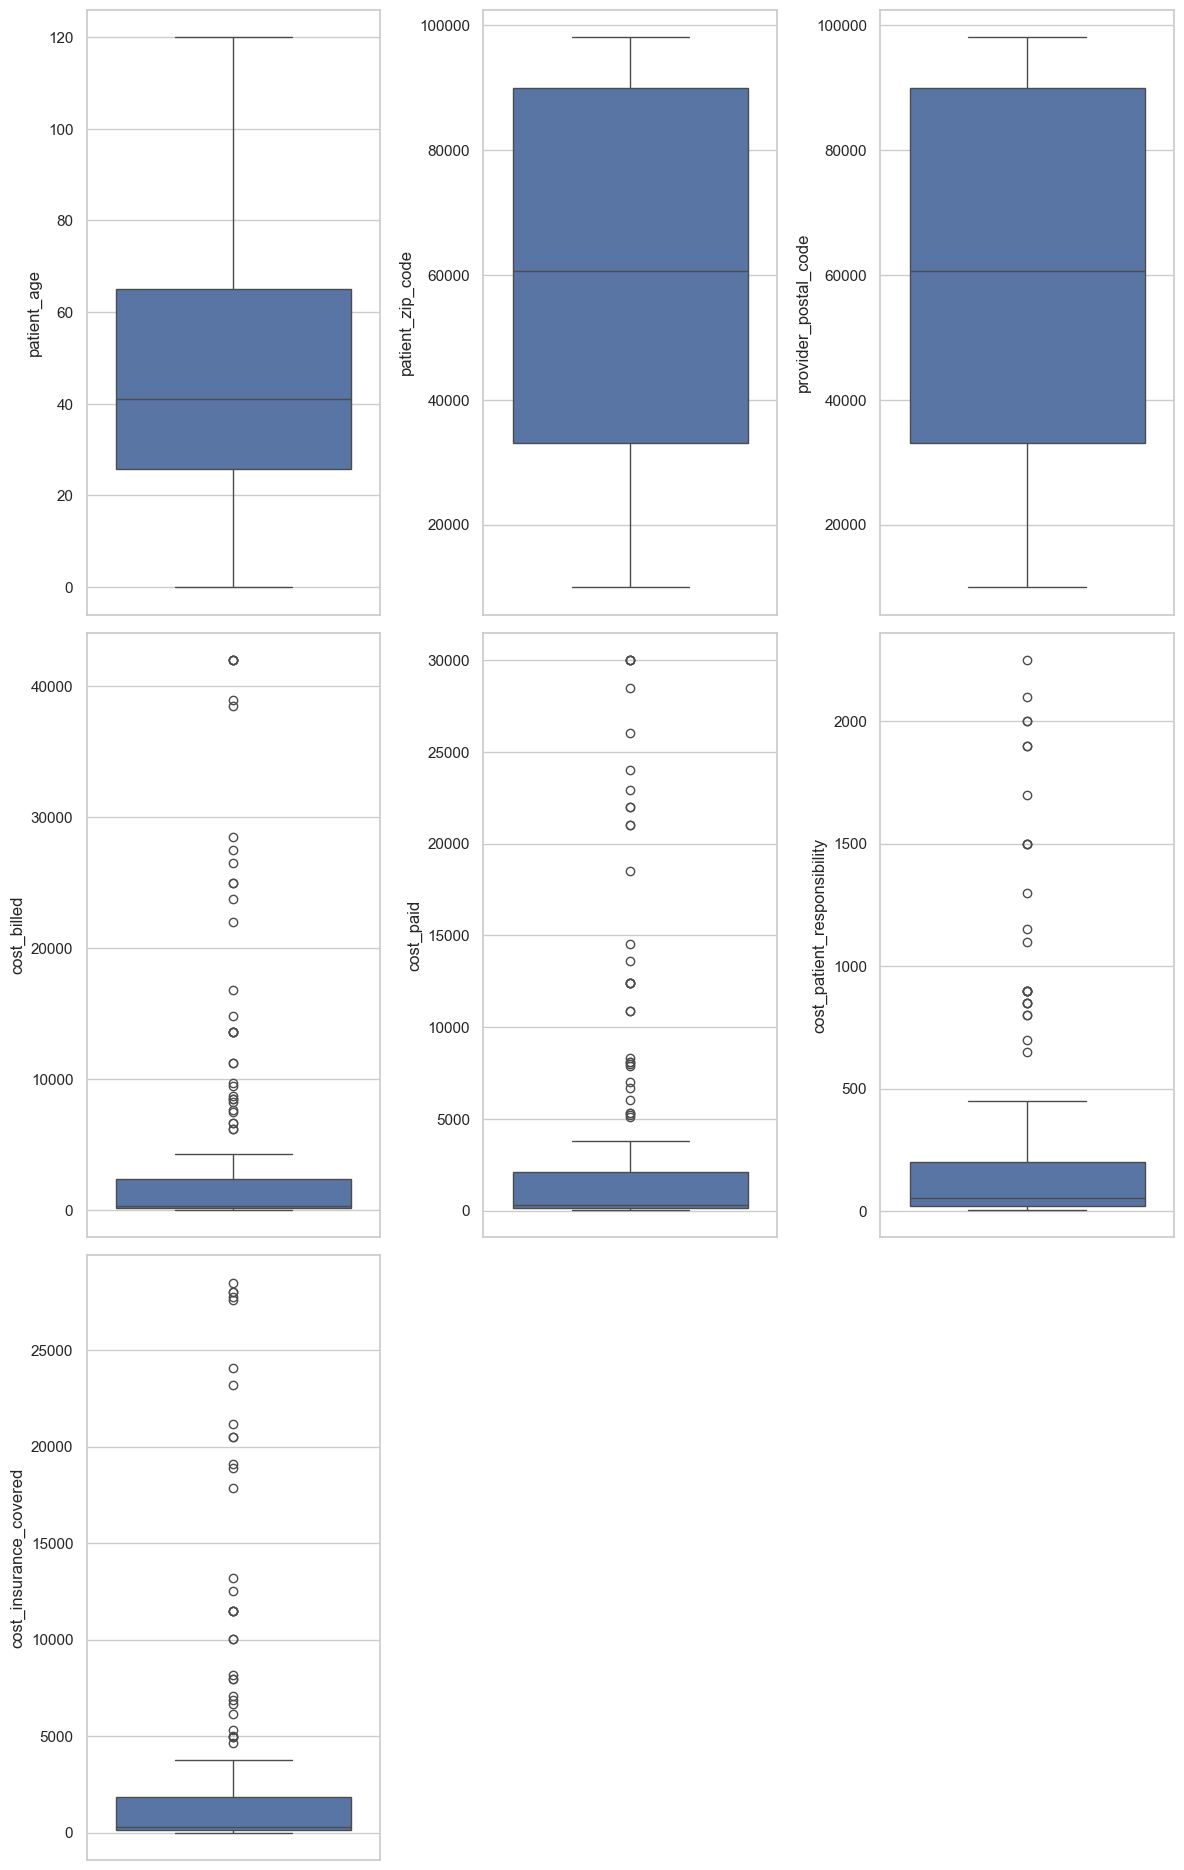

[I 2026-01-02 19:56:32,272] A new study created in memory with name: no-name-347c584a-64f2-4136-a40c-d744f6925da2
[I 2026-01-02 19:56:32,445] Trial 0 finished with value: 1189.2247581959052 and parameters: {'n_estimators': 167, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 1189.2247581959052.


The end of the whisker box diagram...
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4542 stored elements and shape (200, 649)>
  Coords	Values
  (0, 0)	-1.4361353754294863
  (0, 1)	1.1493510422434325
  (0, 2)	1.1491010558126091
  (0, 3)	1.557975352557394
  (0, 4)	-1.0712287580283921
  (0, 5)	0.009747866669123658
  (0, 6)	0.1298778540975434
  (0, 7)	-1.3368478455539217
  (0, 8)	-1.065999198917836
  (0, 9)	1.3362959267919614
  (0, 10)	0.25110906531144706
  (0, 11)	0.7022603798363848
  (0, 12)	-1.2982605228716686
  (0, 86)	1.0
  (0, 350)	1.0
  (0, 409)	1.0
  (0, 461)	1.0
  (0, 614)	1.0
  (0, 630)	1.0
  (0, 633)	1.0
  (0, 648)	1.0
  (1, 0)	-0.5831392021182363
  (1, 1)	-1.9295583928492777
  (1, 2)	-1.9327578307781377
  (1, 3)	1.557975352557394
  :	:
  (198, 648)	1.0
  (199, 0)	1.0840805911719342
  (199, 1)	0.5242049596443527
  (199, 2)	0.523356112451729
  (199, 3)	-0.377397756209402
  (199, 4)	0.9155942862282854
  (199, 5)	0.9845345335814887
  (199, 6)	0.38579480798432825
  

[I 2026-01-02 19:56:32,515] Trial 1 finished with value: 1030.9167003038292 and parameters: {'n_estimators': 131, 'max_depth': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 1030.9167003038292.
[I 2026-01-02 19:56:32,708] Trial 2 finished with value: 1235.82533064569 and parameters: {'n_estimators': 191, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 1030.9167003038292.
[I 2026-01-02 19:56:32,798] Trial 3 finished with value: 1801.0788447301347 and parameters: {'n_estimators': 183, 'max_depth': 35, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 1030.9167003038292.
[I 2026-01-02 19:56:33,012] Trial 4 finished with value: 974.6183277673571 and parameters: {'n_estimators': 186, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 4 with value: 974.6183277673571.
[I 2

Best Random Forest hyperparameters: {'n_estimators': 169, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}
Random Forest: MAE = 3703.3671416928987 , R^2 = 0.5957872127167221
Среднеквадратичная ошибка: 29085576.32
Коэффициент детерминации R^2: 0.43


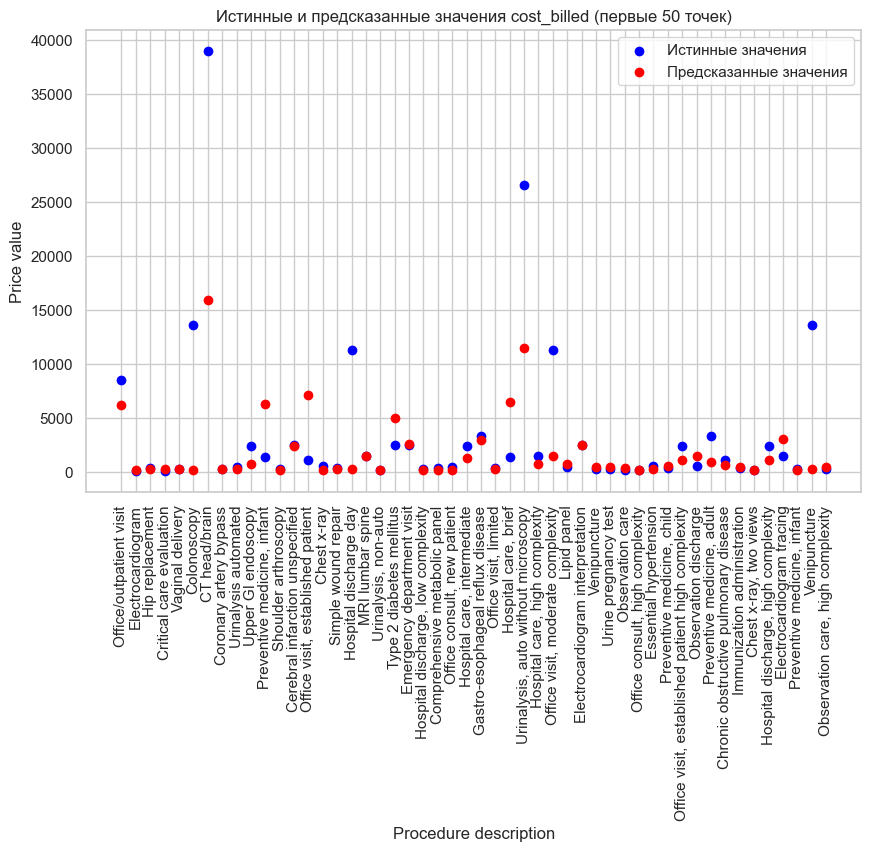

Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Model attributes: ['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_compute_oob_predictions', '_compute_partial_dependence_recursion', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_params_html', '_html_repr', '_make_estimator', '_n_samples', '_

In [10]:
# main.py
import ml_module as ml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import eda_module as eda
import decor_module as d
from pathlib import Path

# Загрузка данных
# Reference: https://www.kaggle.com/datasets/franciscogcc/financial-data
# #!/bin/bash
# curl -L -o ~/Downloads/financial-data.zip\                         
  # https://www.kaggle.com/api/v1/datasets/download/franciscogcc/financial-data

#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()   # Jupyter-safe

DATA_DIR = BASE_DIR / "data"  # CSVs in a data/ folder
file_path = DATA_DIR / "healthcare-procedure-cost-dataset.csv"

# Safety check
if not file_path.exists():
    raise FileNotFoundError(f"CSV file not found at: {file_path}")
    
data = ml.load_data(file_path)

# EDA
eda.view_data(data)
eda.plot_histogram(data)
eda.plot_heatmap(data)
eda.plot_whisker_box(data)

# Предобработка данных
drop_columns = ['cost_paid','cost_insurance_covered', 'cost_patient_responsibility']
target_column = 'cost_billed'
X, y = ml.preprocess_data(data, drop_columns, target_column)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

# Обучение модели
model = ml.train_model(X_train, y_train)

# Предсказание на тестовых данных
y_pred = ml.predict(model, X_test)

# Оценка модели
mse, r2 = ml.evaluate_model(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

# Визуализация истинных и предсказанных значений
# def plot_predictions(y_true, y_pred, num_points=50):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
#     plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
#     plt.xlabel('Date')
#     plt.xticks(ticks = range(num_points), labels = X[:num_points].index.strftime('%Y-%m-%d'), rotation = 75)
#     plt.ylabel('Price value')
#     plt.title(f'Истинные и предсказанные значения {target_column} (первые {num_points} точек)')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
X = data.drop(columns=[target_column])
X = X.set_index('procedure_description', inplace = False)

def plot_predictions(y_true, y_pred, num_points=50):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
    plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
    plt.xlabel('Procedure description')
    plt.xticks(ticks = range(num_points), labels = X.index[:num_points], rotation = 90)
    plt.ylabel('Price value')
    plt.title(f'Истинные и предсказанные значения {target_column} (первые {num_points} точек)')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_predictions(y_test, y_pred)

print(f"Model type: {type(model)}")
print(f"Model attributes: {dir(model)}")



In [11]:
feature_names = ['patient_age', 'patient_zip_code', 'provider_postal_code', 'procedure_date_year', 'procedure_date_month', 'procedure_date_weekday', 'procedure_date_day', 'procedure_date_quarter', 'procedure_date_day_of_year', 'procedure_date_month_sin', 'procedure_date_month_cos', 'procedure_date_weekday_sin', 'procedure_date_weekday_cos', 'record_id_REC-0001A4B19Q', 'record_id_REC-0002B451L', 'record_id_REC-0002C5H12R', 'record_id_REC-0003C862G', 'record_id_REC-0003D2J18S', 'record_id_REC-0004D384K', 'record_id_REC-0004N9M16Y', 'record_id_REC-0005E497M', 'record_id_REC-0005T3F09X', 'record_id_REC-0006W5G10Z', 'record_id_REC-0007P7H20V', 'record_id_REC-0008B6R13K', 'record_id_REC-0009E8S27L', 'record_id_REC-0010V4J31N', 'record_id_REC-0011X8R13B', 'record_id_REC-0012Z2T23Q', 'record_id_REC-0013U5K18E', 'record_id_REC-0014M3L11F', 'record_id_REC-0015Y7N22K', 'record_id_REC-0016Q3P17T', 'record_id_REC-0017W2V29P', 'record_id_REC-0018H9T21U', 'record_id_REC-0019BYD2Y3A', 'record_id_REC-0019J6Y31G', 'record_id_REC-0020M2D23J', 'record_id_REC-0021V8Q30S', 'record_id_REC-0022F4Q01M', 'record_id_REC-0023L8A19F', 'record_id_REC-0024P2M24B', 'record_id_REC-0024QWEM2FJ', 'record_id_REC-0025T6N25E', 'record_id_REC-0026H8V14D', 'record_id_REC-0027P3R26K', 'record_id_REC-0028M4V12L', 'record_id_REC-0029V2T21M', 'record_id_REC-0030F2K17B', 'record_id_REC-0031A4Q13Y', 'record_id_REC-0032U3N15J', 'record_id_REC-0033P1S11H', 'record_id_REC-0034N6F20P', 'record_id_REC-0035H6PLS3Y', 'record_id_REC-0035J8Q27S', 'record_id_REC-0036H6D22N', 'record_id_REC-0037A4B13X', 'record_id_REC-0038M7N18K', 'record_id_REC-0039P3V10T', 'record_id_REC-0040N7V13M', 'record_id_REC-0041A5D17P', 'record_id_REC-0042P6Z12Q', 'record_id_REC-0043M8N13A', 'record_id_REC-0044J7V18P', 'record_id_REC-0045A6V15L', 'record_id_REC-0046M8V18C', 'record_id_REC-0047T7K15Y', 'record_id_REC-0048N4V19A', 'record_id_REC-0049P7K12V', 'record_id_REC-004KJ2X9VTR', 'record_id_REC-0050A6N20L', 'record_id_REC-005CL2L8J5V', 'record_id_REC-006X8ZQH4FS', 'record_id_REC-007A5CV3K2R', 'record_id_REC-008B7QDR2L1', 'record_id_REC-009L8N0Z4WX', 'record_id_REC-010W5BQM4PN', 'record_id_REC-011C0VZ2YJP', 'record_id_REC-012F7LWD9GS', 'record_id_REC-013H6QJ2VPF', 'record_id_REC-014M8T4KJ2N', 'record_id_REC-015K2V8LJ3R', 'record_id_REC-016V3J5N2GP', 'record_id_REC-017N2B9LJ6K', 'record_id_REC-018G7KJ2M4P', 'record_id_REC-019J5N2V8LJ', 'record_id_REC-01A23B45D', 'record_id_REC-020XZ9KS4TQ', 'record_id_REC-021KJ2N3B9LF', 'record_id_REC-022N0P3ZK4B', 'record_id_REC-023L8QK2M4T', 'record_id_REC-024G9KJ2M4B', 'record_id_REC-025Y3KJ2N8T', 'record_id_REC-026M8T4KJ2B', 'record_id_REC-027N2B9LJ4K', 'record_id_REC-028G7KJ2M2P', 'record_id_REC-029KJ2N3L9V', 'record_id_REC-02B34C56E', 'record_id_REC-030Y3KJ2M8T', 'record_id_REC-031N2B9LJ2K', 'record_id_REC-032G7KJ2M0P', 'record_id_REC-033H6QJ2V3F', 'record_id_REC-034KJ2N3B8F', 'record_id_REC-035J5N2V6LJ', 'record_id_REC-036M8T4KJ6B', 'record_id_REC-037KJ2N3B7F', 'record_id_REC-038G7KJ2M7P', 'record_id_REC-039KJ2N3B4F', 'record_id_REC-03C45D67F', 'record_id_REC-040Y3KJ2M1T', 'record_id_REC-041N2B9LJ8K', 'record_id_REC-042M8T4KJ4B', 'record_id_REC-043G7KJ2M9P', 'record_id_REC-044KJ2N3B2F', 'record_id_REC-045J5N2V4LJ', 'record_id_REC-046M8T4KJ9B', 'record_id_REC-047N2B9LJ0K', 'record_id_REC-048G7KJ2M5P', 'record_id_REC-049KJ2N3B1F', 'record_id_REC-04D56E78G', 'record_id_REC-050Y3KJ2M2T', 'record_id_REC-05E67F89H', 'record_id_REC-06F78G90I', 'record_id_REC-07G89H01J', 'record_id_REC-08H90I12K', 'record_id_REC-09I01J23L', 'record_id_REC-10J12K34M', 'record_id_REC-11K23L45N', 'record_id_REC-12L34M56O', 'record_id_REC-13M45N67P', 'record_id_REC-14N56O78Q', 'record_id_REC-15O67P89R', 'record_id_REC-16P78Q90S', 'record_id_REC-17Q89R01T', 'record_id_REC-18R90S12U', 'record_id_REC-19S01T23V', 'record_id_REC-20T12U34W', 'record_id_REC-21U23V45X', 'record_id_REC-22V34W56Y', 'record_id_REC-2381JKLQXZT', 'record_id_REC-2382ZLMRTWK', 'record_id_REC-2383QWERTYU', 'record_id_REC-2384ASDFGHJ', 'record_id_REC-2385ZXCVBNM', 'record_id_REC-2386QWOPASD', 'record_id_REC-2387LKJHGFD', 'record_id_REC-2388MNBVCXZ', 'record_id_REC-2389POIUYTRE', 'record_id_REC-2390UYTREWQZ', 'record_id_REC-2391LKJFDSWA', 'record_id_REC-2392MNBVCXZL', 'record_id_REC-2393QWERTYUI', 'record_id_REC-2394ZXCVBNML', 'record_id_REC-2395LKJHGFDQ', 'record_id_REC-2396MNBVCXZQ', 'record_id_REC-2397POIUYTREW', 'record_id_REC-2398UYTREWQZX', 'record_id_REC-2399LKJFDSWAP', 'record_id_REC-23W45X67Z', 'record_id_REC-2400MNBVCXZLP', 'record_id_REC-2401ZXCVBNMLP', 'record_id_REC-2402LKJHGFDQP', 'record_id_REC-2403MNBVCXZQP', 'record_id_REC-2404POIUYTREWP', 'record_id_REC-2405UYTREWQZXP', 'record_id_REC-2406LKJFDSWAPK', 'record_id_REC-2407MNBVCXZLKP', 'record_id_REC-2408ZXCVBNMLKP', 'record_id_REC-2409LKJHGFDQPK', 'record_id_REC-2410MNBVCXZQPK', 'record_id_REC-2411POIUYTREWPK', 'record_id_REC-2412UYTREWQZXPK', 'record_id_REC-2413LKJFDSWAPKQ', 'record_id_REC-2414MNBVCXZLKPQ', 'record_id_REC-2415ZXCVBNMLKPQ', 'record_id_REC-2416LKJHGFDQPKQ', 'record_id_REC-2417MNBVCXZQPKQ', 'record_id_REC-2418POIUYTREWPKQ', 'record_id_REC-2419UYTREWQZXPKQ', 'record_id_REC-2420LKJFDSWAPKQ', 'record_id_REC-2421MNBVCXZLKPQ', 'record_id_REC-2422ZXCVBNMLKPQ', 'record_id_REC-2423LKJHGFDQPKQ', 'record_id_REC-2424MNBVCXZQPKQ', 'record_id_REC-2425ZXCVBNMLKPQ', 'record_id_REC-24X56Y78A', 'record_id_REC-25Y67Z89B', 'record_id_REC-26Z78A90C', 'record_id_REC-27A89B01D', 'record_id_REC-28B90C12E', 'record_id_REC-29C01D23F', 'record_id_REC-30D12E34G', 'record_id_REC-31E23F45H', 'record_id_REC-32F34G56I', 'record_id_REC-33G45H67J', 'record_id_REC-34H56I78K', 'record_id_REC-35I67J89L', 'record_id_REC-36J78K90M', 'record_id_REC-37K89L01N', 'record_id_REC-38L90M12O', 'record_id_REC-39M01N23P', 'record_id_REC-40N12O34Q', 'record_id_REC-41O23P45R', 'record_id_REC-42P34Q56S', 'record_id_REC-43Q45R67T', 'record_id_REC-44R56S78U', 'record_id_REC-45S67T89V', 'record_id_REC-46T78U90W', 'record_id_REC-47U89V01X', 'record_id_REC-48V90W12Y', 'record_id_REC-49W01X23Z', 'record_id_REC-50X12Y34A', 'patient_id_PAT-0002EFGH', 'patient_id_PAT-0003IJKL', 'patient_id_PAT-0004MNOP', 'patient_id_PAT-0005QRST', 'patient_id_PAT-0006UVWX', 'patient_id_PAT-0007YZAB', 'patient_id_PAT-0008CDEF', 'patient_id_PAT-0009GHIJ', 'patient_id_PAT-0010KLMN', 'patient_id_PAT-0011OPQR', 'patient_id_PAT-0012STUV', 'patient_id_PAT-0013WXYZ', 'patient_id_PAT-0014ABCD', 'patient_id_PAT-0015EFGH', 'patient_id_PAT-0016IJKL', 'patient_id_PAT-0017MNOP', 'patient_id_PAT-0018QRST', 'patient_id_PAT-0019UVWX', 'patient_id_PAT-0020YZAB', 'patient_id_PAT-0021CDEF', 'patient_id_PAT-0022GHIJ', 'patient_id_PAT-0023KLMN', 'patient_id_PAT-0024OPQR', 'patient_id_PAT-0025STUV', 'patient_id_PAT-0026WXYZ', 'patient_id_PAT-0027ABCD', 'patient_id_PAT-0028EFGH', 'patient_id_PAT-0029IJKL', 'patient_id_PAT-0030MNOP', 'patient_id_PAT-0031QRST', 'patient_id_PAT-0032UVWX', 'patient_id_PAT-0033YZAB', 'patient_id_PAT-0034CDEF', 'patient_id_PAT-0035GHIJ', 'patient_id_PAT-0036KLMN', 'patient_id_PAT-0037OPQR', 'patient_id_PAT-0038STUV', 'patient_id_PAT-0039WXYZ', 'patient_id_PAT-0040ABCD', 'patient_id_PAT-0041EFGH', 'patient_id_PAT-0042IJKL', 'patient_id_PAT-0043MNOP', 'patient_id_PAT-0044QRST', 'patient_id_PAT-0045UVWX', 'patient_id_PAT-0046YZAB', 'patient_id_PAT-0047CDEF', 'patient_id_PAT-0048GHIJ', 'patient_id_PAT-03K8XZ5FJQ', 'patient_id_PAT-10928347', 'patient_id_PAT-10KFP3ZZ8G', 'patient_id_PAT-112450FG', 'patient_id_PAT-11483728', 'patient_id_PAT-12783965', 'patient_id_PAT-18PKX7M2LB', 'patient_id_PAT-19827364', 'patient_id_PAT-21NPR1F2BQ', 'patient_id_PAT-23891247', 'patient_id_PAT-27384910', 'patient_id_PAT-28NZT6CX5M', 'patient_id_PAT-29384756', 'patient_id_PAT-32KXG5MPTV', 'patient_id_PAT-34789214', 'patient_id_PAT-38291047', 'patient_id_PAT-41298375', 'patient_id_PAT-41KJ8M9PLD', 'patient_id_PAT-48291732', 'patient_id_PAT-48572913', 'patient_id_PAT-49XJ9T1Q6K', 'patient_id_PAT-53J2WQX7PK', 'patient_id_PAT-542916QY', 'patient_id_PAT-551281LK', 'patient_id_PAT-60J9V2QX5R', 'patient_id_PAT-62X3C9BVWQ', 'patient_id_PAT-65718923', 'patient_id_PAT-67283921', 'patient_id_PAT-67HJ2F9TQX', 'patient_id_PAT-71298461', 'patient_id_PAT-71JKV2QX9E', 'patient_id_PAT-76839124', 'patient_id_PAT-773901ZX', 'patient_id_PAT-82736492', 'patient_id_PAT-83419234', 'patient_id_PAT-85927341', 'patient_id_PAT-85QPM8T3DD', 'patient_id_PAT-89ZPX5W6TR', 'patient_id_PAT-9001HJKL', 'patient_id_PAT-9002MNOP', 'patient_id_PAT-9003QRST', 'patient_id_PAT-9004UVWX', 'patient_id_PAT-9005YZAB', 'patient_id_PAT-9006CDEF', 'patient_id_PAT-9007GHIJ', 'patient_id_PAT-9008JKLM', 'patient_id_PAT-9009NOPQ', 'patient_id_PAT-9010QRST', 'patient_id_PAT-9011UVWX', 'patient_id_PAT-9012YZAB', 'patient_id_PAT-9013CDEF', 'patient_id_PAT-9014GHIJ', 'patient_id_PAT-9015JKLM', 'patient_id_PAT-9016NOPQ', 'patient_id_PAT-9017UVWX', 'patient_id_PAT-9018YZAB', 'patient_id_PAT-9019CDEF', 'patient_id_PAT-9020GHIJ', 'patient_id_PAT-9021JKLM', 'patient_id_PAT-9022NOPQ', 'patient_id_PAT-9023UVWX', 'patient_id_PAT-9024YZAB', 'patient_id_PAT-9025CDEF', 'patient_id_PAT-9026GHIJ', 'patient_id_PAT-9027JKLM', 'patient_id_PAT-9028NOPQ', 'patient_id_PAT-9029UVWX', 'patient_id_PAT-9030YZAB', 'patient_id_PAT-9031CDEF', 'patient_id_PAT-9032GHIJ', 'patient_id_PAT-9033JKLM', 'patient_id_PAT-9034NOPQ', 'patient_id_PAT-9035UVWX', 'patient_id_PAT-9036YZAB', 'patient_id_PAT-9037CDEF', 'patient_id_PAT-9038GHIJ', 'patient_id_PAT-9039JKLM', 'patient_id_PAT-9040NOPQ', 'patient_id_PAT-9041UVWX', 'patient_id_PAT-9042YZAB', 'patient_id_PAT-9043CDEF', 'patient_id_PAT-9044GHIJ', 'patient_id_PAT-90TJKX2MPL', 'patient_id_PAT-91283745', 'patient_id_PAT-91827365', 'patient_id_PAT-98234712', 'patient_id_PAT-998123LM', 'patient_gender_male', 'patient_gender_other', 'patient_gender_unknown', 'patient_race_ethnicity_black', 'patient_race_ethnicity_hispanic', 'patient_race_ethnicity_native-american', 'patient_race_ethnicity_other', 'patient_race_ethnicity_pacific-islander', 'patient_race_ethnicity_unknown', 'patient_race_ethnicity_white', 'insurance_type_medicare', 'insurance_type_other', 'insurance_type_private', 'insurance_type_uninsured', 'procedure_code_CPT-27130', 'procedure_code_CPT-27447', 'procedure_code_CPT-29580', 'procedure_code_CPT-29827', 'procedure_code_CPT-33208', 'procedure_code_CPT-33533', 'procedure_code_CPT-36415', 'procedure_code_CPT-43235', 'procedure_code_CPT-43239', 'procedure_code_CPT-44950', 'procedure_code_CPT-45378', 'procedure_code_CPT-47562', 'procedure_code_CPT-58661', 'procedure_code_CPT-59400', 'procedure_code_CPT-59409', 'procedure_code_CPT-59410', 'procedure_code_CPT-66984', 'procedure_code_CPT-70450', 'procedure_code_CPT-71020', 'procedure_code_CPT-71046', 'procedure_code_CPT-72148', 'procedure_code_CPT-80048', 'procedure_code_CPT-80053', 'procedure_code_CPT-80061', 'procedure_code_CPT-80076', 'procedure_code_CPT-81000', 'procedure_code_CPT-81001', 'procedure_code_CPT-81002', 'procedure_code_CPT-81003', 'procedure_code_CPT-81025', 'procedure_code_CPT-85025', 'procedure_code_CPT-85027', 'procedure_code_CPT-87070', 'procedure_code_CPT-87081', 'procedure_code_CPT-88305', 'procedure_code_CPT-90460', 'procedure_code_CPT-90471', 'procedure_code_CPT-90700', 'procedure_code_CPT-92928', 'procedure_code_CPT-92950', 'procedure_code_CPT-93000', 'procedure_code_CPT-93005', 'procedure_code_CPT-93010', 'procedure_code_CPT-96372', 'procedure_code_CPT-99050', 'procedure_code_CPT-99203', 'procedure_code_CPT-99204', 'procedure_code_CPT-99205', 'procedure_code_CPT-99212', 'procedure_code_CPT-99213', 'procedure_code_CPT-99214', 'procedure_code_CPT-99215', 'procedure_code_CPT-99223', 'procedure_code_CPT-99231', 'procedure_code_CPT-99232', 'procedure_code_CPT-99233', 'procedure_code_CPT-99234', 'procedure_code_CPT-99235', 'procedure_code_CPT-99236', 'procedure_code_CPT-99238', 'procedure_code_CPT-99239', 'procedure_code_CPT-99285', 'procedure_code_CPT-99291', 'procedure_code_CPT-99306', 'procedure_code_CPT-99385', 'procedure_code_CPT-99391', 'procedure_code_CPT-99392', 'procedure_code_CPT-99393', 'procedure_code_CPT-99395', 'procedure_code_CPT-99396', 'procedure_code_CPT-99406', 'procedure_code_ICD10-E11.9', 'procedure_code_ICD10-G30.9', 'procedure_code_ICD10-I10', 'procedure_code_ICD10-I50.9', 'procedure_code_ICD10-I63.9', 'procedure_code_ICD10-J44.9', 'procedure_code_ICD10-J45.909', 'procedure_code_ICD10-K21.9', 'procedure_code_ICD10-N18.9', 'provider_id_PRV-00102SF', 'provider_id_PRV-00213LA', 'provider_id_PRV-00234NY', 'provider_id_PRV-00345IL', 'provider_id_PRV-00456GA', 'provider_id_PRV-00543SF', 'provider_id_PRV-00567WA', 'provider_id_PRV-00678MI', 'provider_id_PRV-00732PX', 'provider_id_PRV-00789CA', 'provider_id_PRV-00890AZ', 'provider_id_PRV-00897NY', 'provider_id_PRV-00985CH', 'provider_id_PRV-00987TX', 'provider_id_PRV-01287GA', 'provider_id_PRV-01594DT', 'provider_id_PRV-01621CO', 'provider_id_PRV-02211FL', 'provider_id_PRV-02581TX', 'provider_id_PRV-03481WA', 'provider_id_PRV-05521TX', 'provider_id_PRV-10XJ8WQK5', 'provider_id_PRV-11YH9KLM2', 'provider_id_PRV-12ZH6WXR7', 'provider_id_PRV-13QK4FDV8', 'provider_id_PRV-14DL6PWO2', 'provider_id_PRV-15RM2GTE5', 'provider_id_PRV-16EG3VBN9', 'provider_id_PRV-17DS6EWM3', 'provider_id_PRV-18UJ7QWL4', 'provider_id_PRV-19QK9RWE8', 'provider_id_PRV-20VD3KQP1', 'provider_id_PRV-21TG3NWM7', 'provider_id_PRV-22RT2JQK6', 'provider_id_PRV-23YD4JKP3', 'provider_id_PRV-24ZM7ELM8', 'provider_id_PRV-25ET6KZW4', 'provider_id_PRV-26RP5KWE9', 'provider_id_PRV-27VT8JWP1', 'provider_id_PRV-28QW7ZPL2', 'provider_id_PRV-29RM4FWQ5', 'provider_id_PRV-ATL2023X11', 'provider_id_PRV-ATL2023X16', 'provider_id_PRV-ATL2023X36', 'provider_id_PRV-ATL2023X44', 'provider_id_PRV-AZTRV98M', 'provider_id_PRV-CAXYZ56F', 'provider_id_PRV-CHG2023X1', 'provider_id_PRV-CHG2023X22', 'provider_id_PRV-CHG2023X27', 'provider_id_PRV-CHG2023X33', 'provider_id_PRV-CHG2023X38', 'provider_id_PRV-CHG2023X41', 'provider_id_PRV-CHG2023X6', 'provider_id_PRV-DAL2023X9', 'provider_id_PRV-DET2023X8', 'provider_id_PRV-FLJKT84B', 'provider_id_PRV-HNL2023X17', 'provider_id_PRV-HST2023X2', 'provider_id_PRV-ILHPL73J', 'provider_id_PRV-LAX2023X10', 'provider_id_PRV-LAX2023X23', 'provider_id_PRV-LAX2023X37', 'provider_id_PRV-LAX2023X40', 'provider_id_PRV-MIA2023X25', 'provider_id_PRV-MIA2023X28', 'provider_id_PRV-MIA2023X34', 'provider_id_PRV-MIA2023X5', 'provider_id_PRV-NSH2023X15', 'provider_id_PRV-NYC2023X13', 'provider_id_PRV-NYC2023X24', 'provider_id_PRV-NYC2023X4', 'provider_id_PRV-NYC2023X43', 'provider_id_PRV-OKC2023X12', 'provider_id_PRV-PHL2023X18', 'provider_id_PRV-PHL2023X31', 'provider_id_PRV-PHX2023X21', 'provider_id_PRV-PHX2023X3', 'provider_id_PRV-PHX2023X30', 'provider_id_PRV-PHX2023X32', 'provider_id_PRV-SBD2023X14', 'provider_id_PRV-SEA2023X19', 'provider_id_PRV-SEA2023X26', 'provider_id_PRV-SFO2023X20', 'provider_id_PRV-SFO2023X29', 'provider_id_PRV-SFO2023X35', 'provider_id_PRV-SFO2023X39', 'provider_id_PRV-SFO2023X42', 'provider_id_PRV-SFO2023X7', 'provider_id_PRV-TXMDI23C', 'provider_name_Atlanta Long-Term Care', 'provider_name_Atlanta Primary Care', 'provider_name_Atlanta Renal Center', 'provider_name_Atlanta Stroke Center', 'provider_name_Banner Health Tucson', 'provider_name_Baylor Dallas', 'provider_name_Baylor Ortho Center', 'provider_name_Brooklyn Health', 'provider_name_Cedars Sinai', 'provider_name_Chicago Allergy Clinic', 'provider_name_Chicago Diagnostic Lab', 'provider_name_Chicago Diagnostics', 'provider_name_Chicago Laboratory', 'provider_name_Chicago Medical Center', 'provider_name_Chicago Ortho Clinic', 'provider_name_Chicago Urgent Care', "provider_name_Children's Medical Center", 'provider_name_Dallas Family Practice', "provider_name_Detroit Children's Hosp", 'provider_name_Detroit Medical Center', 'provider_name_Detroit North Clinic', 'provider_name_Emory Healthcare', 'provider_name_Emory University Hosp', 'provider_name_Emory University Hospital', 'provider_name_Honolulu Cardiology', 'provider_name_Houston General Hospital', 'provider_name_Houston Medical Center', 'provider_name_Houston Methodist', 'provider_name_Houston Methodist Hospital', 'provider_name_Jackson Memorial', 'provider_name_Jackson Memorial Hosp', 'provider_name_Keck Hospital of USC', 'provider_name_LA Health Clinic', 'provider_name_LA Preventive Center', 'provider_name_LA Therapeutics', 'provider_name_Lenox Hill Hospital', 'provider_name_Los Angeles ER', 'provider_name_Manhattan Digestive Clinic', "provider_name_Miami Children's Hosp", "provider_name_Miami Children's Hospital", 'provider_name_Miami Heart Institute', 'provider_name_Miami Medical Center', 'provider_name_Miami Senior Care', 'provider_name_Miami Urgent Care', 'provider_name_Mission Health SF', 'provider_name_Mount Sinai Hospital', 'provider_name_NYC Imaging', 'provider_name_NYC Neuro Center', 'provider_name_NYC Radiology', 'provider_name_NYU Cardiology', 'provider_name_Nashville Eye Center', 'provider_name_Northwestern Health', 'provider_name_Northwestern Hospital', 'provider_name_Northwestern Memorial', 'provider_name_Northwestern Memorial Hospital', "provider_name_Oklahoma Women's Health", 'provider_name_Philadelphia ER', 'provider_name_Philadelphia Labs', 'provider_name_Phoenix After Hours', "provider_name_Phoenix Children's", "provider_name_Phoenix Children's Hosp", "provider_name_Phoenix Children's Hospital", 'provider_name_Phoenix Immunization', 'provider_name_Phoenix Pediatrics Group', 'provider_name_Phoenix Senior Center', "provider_name_Queen's Medical Center", 'provider_name_Rose Medical Center', 'provider_name_Rush University Med', 'provider_name_SF Diagnostic Center', 'provider_name_SF Internal Medicine', 'provider_name_SF Laboratory', 'provider_name_SF Liver Clinic', 'provider_name_SF Medical Services', 'provider_name_SF Preventive Care', 'provider_name_San Bernardino Hospital', 'provider_name_San Francisco General Hospital', 'provider_name_Seattle Inpatient Center', 'provider_name_Seattle Ortho Center', 'provider_name_St. Francis Hospital', 'provider_name_Sutter Health SF', 'provider_name_Swedish Medical Center', 'provider_name_UCSF Gastroenterology', 'provider_name_UCSF General Clinic', 'provider_name_UCSF Hematology', 'provider_name_UCSF Pediatrics', 'provider_city_Brooklyn', 'provider_city_Chicago', 'provider_city_Dallas', 'provider_city_Denver', 'provider_city_Detroit', 'provider_city_Honolulu', 'provider_city_Houston', 'provider_city_Los Angeles', 'provider_city_Miami', 'provider_city_Nashville', 'provider_city_New York', 'provider_city_Oklahoma City', 'provider_city_Philadelphia', 'provider_city_Phoenix', 'provider_city_San Bernardino', 'provider_city_San Francisco', 'provider_city_Seattle', 'provider_city_Tucson', 'provider_state_CA', 'provider_state_CO', 'provider_state_FL', 'provider_state_GA', 'provider_state_HI', 'provider_state_IL', 'provider_state_MI', 'provider_state_NY', 'provider_state_OK', 'provider_state_PA', 'provider_state_TN', 'provider_state_TX', 'provider_state_WA', 'procedure_outcome_ongoing', 'procedure_outcome_readmission', 'procedure_outcome_successful']

In [12]:
eda.plot_feature_importance_rf(model, X_train, feature_names=feature_names, max_features=50)

Top Feature Importances:
                                    Feature  Importance
365                procedure_code_CPT-33533    0.234306
360                procedure_code_CPT-27130    0.133817
0                               patient_age    0.117782
361                procedure_code_CPT-27447    0.069849
435              procedure_code_ICD10-I63.9    0.065347
647           procedure_outcome_readmission    0.058022
124                 record_id_REC-08H90I12K    0.025103
213                 patient_id_PAT-0003IJKL    0.020678
108                 record_id_REC-03C45D67F    0.014276
460                 provider_id_PRV-05521TX    0.011023
283               patient_id_PAT-60J9V2QX5R    0.010980
109               record_id_REC-040Y3KJ2M1T    0.010864
218                 patient_id_PAT-0008CDEF    0.010345
110               record_id_REC-041N2B9LJ8K    0.009794
289               patient_id_PAT-71JKV2QX9E    0.007906
2                      provider_postal_code    0.007496
621                   p

,Feature,Importance
365,procedure_code_CPT-33533,0.234306
360,procedure_code_CPT-27130,0.133817
0,patient_age,0.117782
361,procedure_code_CPT-27447,0.069849
435,procedure_code_ICD10-I63.9,0.065347
647,procedure_outcome_readmission,0.058022
124,record_id_REC-08H90I12K,0.025103
213,patient_id_PAT-0003IJKL,0.020678
108,record_id_REC-03C45D67F,0.014276
460,provider_id_PRV-05521TX,0.011023


## Reflections

Where the prediction is poor, the values are under-predicted.

The features having most importance in the model are as follows:

- CPT-33533	Coronary artery bypass
- CPT-27130	Hip replacement
- patient_age
- CPT-27447   Knee replacement
- ICD10-I63.9	Stroke management
- procedure_outcome_readmission

The one-hot encoder results in hundreds of features due to the nature of the transformation. This might not be very practical for the feature
importance plotting and analysis and also might not be computationally efficient.

In [17]:
# !which uv
# !uv --version

In [18]:
#!curl -LsSf https://astral.sh/uv/install.sh | sh


In [19]:
#bash check:
#~/.local/bin/uv

In [20]:
# %%bash

# # Creating a new virtual environment using Python 3.10
# uv venv --python 3.10 .venv310

# # Activating the environment
# source .venv310/bin/activate

# # Installing desired packages inside the venv
# uv pip install ipykernel gplearn numpy scikit-learn matplotlib pandas

# # Registering venv as a Jupyter kernel
# python -m ipykernel install --user --name venv310 --display-name "Python 3.10 (uv)"


In [21]:
# # Import required libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from gplearn.genetic import SymbolicRegressor



# # 1. Split data into training and testing sets
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 2. Initialize and configure the symbolic regressor
# regressor = SymbolicRegressor(population_size=5000, generations=20, tournament_size=20,
#                               stopping_criteria=0.01, const_range=(-1., 1.), 
#                               init_depth=(2, 6), init_method='half and half', 
#                               function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'tan'),
#                               metric='mean absolute error', random_state=42)

# # 3. Fit the model to the training data
# regressor.fit(X_train, y_train)

# # 4. Evaluate the model
# y_pred = regressor.predict(X_test)

# # 5. Plot results
# plt.figure(figsize=(10, 6))
# plt.scatter(X_test, y_test, color='blue', label='True data')
# plt.plot(X_test, y_pred, color='red', label='Predicted regression curve')
# plt.title("Symbolic Regression")
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()

# # 6. Print the symbolic expression
# print(f"Learned symbolic regression expression: {regressor._program}")


In [22]:
#!uv pip install ipywidgets

In [23]:
from pysr import PySRRegressor
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import csr_matrix, issparse
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import pickle
from pathlib import Path

# Model path
#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()          # Jupyter-safe
MODELS_DIR = BASE_DIR / "models"
pysr_model_path = MODELS_DIR / "pysr_model.pkl"

# Load the model
#pysr_model = pickle.load(pysr_model_path)


# Ensure that X_train and y_train are numpy arrays
if issparse(X_train):
    X_train = X_train.toarray()
if issparse(X_test):
    X_test = X_test.toarray()
y_train = np.array(y_train)

# Check if model exists:
if os.path.exists(pysr_model_path):
    print('Loading existing model...')
    with open(pysr_model_path, 'rb') as f:
        model = pickle.load(f)
    print("Model loaded successfully!")
else:
    print("No existing model found. Training new model...")

    # Initialize the symbolic regression model
    model = PySRRegressor(
        niterations=1000,
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["sin", "cos", "exp", "log"],
        population_size=20,
        tournament_selection_n=10,
        maxsize=40,
        maxdepth=5,
        verbosity=1,
        parsimony = 0.01
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Save the trained model
    with open(pysr_model_path, 'wb') as f:
        pickle.dump(pysr_model, f)
    print(f"Model trained and saved to {pysr_model_path}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using R2, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

import pickle
with open(pysr_model_path, 'wb') as f:
    pickle.dump(model, f)
print("\nModel saved to pysr_model.pkl")

# Viewing best equations and avoiding Unicode errors
print("\nBest equations: ")
for i in range(min(5, len(model.equations_))):
    row = model.equations_.iloc[i]
    complexity = int(row['complexity'])
    loss = float(row['loss'])
    equation_str = str(row['equation'])
    print(f"[{i+1}] Complexity = {complexity}, Loss = {loss:.2e}")
; # prevent automatic display

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Loading existing model...
Model loaded successfully!
R^2: 0.6355
MSE: 18539014.3124
MAE: 2496.1185

Model saved to pysr_model.pkl

Best equations: 
[1] Complexity = 1, Loss = 7.99e+07
[2] Complexity = 3, Loss = 5.72e+07
[3] Complexity = 5, Loss = 4.23e+07
[4] Complexity = 6, Loss = 4.08e+07
[5] Complexity = 7, Loss = 2.72e+07


'# prevent automatic display'

In [24]:
print(type(X_train), X_train.shape)  # Print the type and shape of X_train
print(type(y_train), y_train.shape)  # Print the type and shape of y_train

<class 'numpy.ndarray'> (140, 649)
<class 'numpy.ndarray'> (140,)


In [25]:
print(model.equations_[:5])  # If there are equations, print the top 5

   complexity        loss                            equation     score  \
0           1  79914616.0                           3886.2756  0.000000   
1           3  57212028.0                    x365 * 41999.527  0.167097   
2           5  42349170.0           (x365 + x360) * 38400.094  0.150408   
3           6  40796690.0      (x365 + sin(x435)) * 36074.273  0.037348   
4           7  27203066.0  (x365 + (x360 + x435)) * 32477.727  0.405271   

                                       sympy_format  \
0                                  3886.27560000000   
1                                    41999.527*x365   
2                   38400.094*x360 + 38400.094*x365   
3              36074.273*x365 + 36074.273*sin(x435)   
4  32477.727*x360 + 32477.727*x365 + 32477.727*x435   

                                       lambda_format  
0                  PySRFunction(X=>3886.27560000000)  
1                    PySRFunction(X=>41999.527*x365)  
2   PySRFunction(X=>38400.094*x360 + 38400.094*x365) 

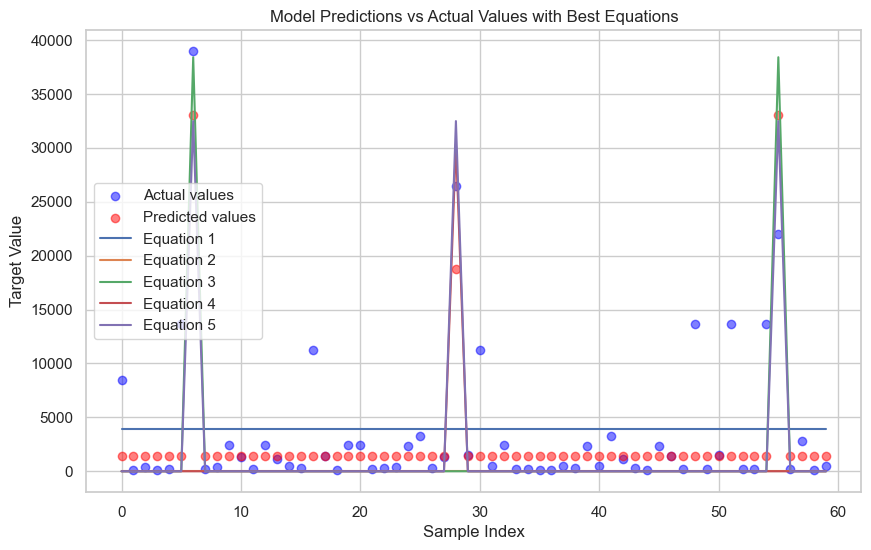

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot the model equations
def plot_best_models(model, X_test, y_test, y_pred, top_n=5):
    # Create the figure for plotting
    plt.figure(figsize=(10, 6))
    
    # Plot the actual vs predicted values
    plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual values', alpha=0.5)
    plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted values', alpha=0.5)
    
    # Plot the top equations
    for i in range(min(top_n, len(model.equations_))):
        eq = model.equations_.iloc[i]['lambda_format']  # Get the callable function from the DataFrame
        
        # Generate predicted values for this model equation (using the callable directly)
        y_range = eq(X_test)  # Directly use the callable function
        
        # Plot the model equation
        plt.plot(np.arange(len(y_range)), y_range, label=f"Equation {i + 1}")
    
    # Set plot labels and title
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.title('Model Predictions vs Actual Values with Best Equations')
    plt.legend()
    
    # Show plot
    plt.show()

# Call the function with the fitted model, X_test, y_test, and y_pred
plot_best_models(model, X_test, y_test, y_pred, top_n=5)


In [27]:
# use --no-color to prevent ANSI symbols due to Julia-Python integration
#!uv pip freeze --no-color > requirements.txt

# HW 1 14

=== ПОЛНЫЙ ЦИКЛ ОБРАБОТКИ ДАННЫХ: ДАТАСЕТ HEALTHCARE  ===

1. ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
Размер датасета: (200, 22)
Колонки: ['record_id', 'patient_id', 'patient_age', 'patient_gender', 'patient_race_ethnicity', 'patient_zip_code', 'insurance_type', 'procedure_code', 'procedure_description', 'procedure_date', 'provider_id', 'provider_name', 'provider_city', 'provider_state', 'provider_postal_code', 'provider_country', 'cost_billed', 'cost_paid', 'cost_patient_responsibility', 'cost_insurance_covered', 'payment_date', 'procedure_outcome']

Первые 5 строк:
       record_id    patient_id  patient_age patient_gender  \
0  REC-01A23B45D  PAT-0001ABCD            7         female   
1  REC-02B34C56E  PAT-0002EFGH           29           male   
2  REC-03C45D67F  PAT-0003IJKL           68           male   
3  REC-04D56E78G  PAT-0004MNOP           86         female   
4  REC-05E67F89H  PAT-0005QRST            2         female   

  patient_race_ethnicity  patient_zip_code insurance_type 

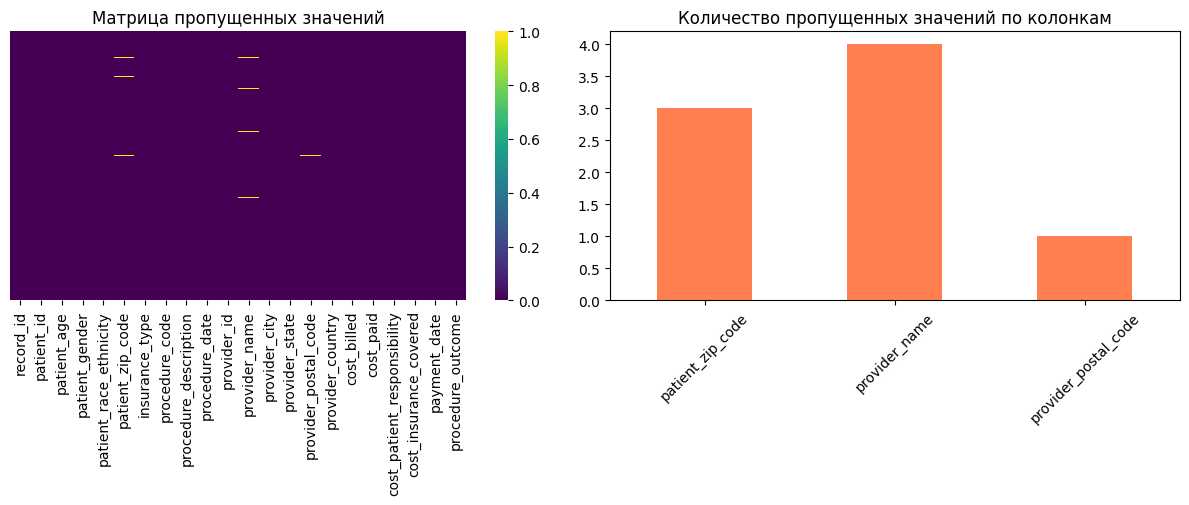


3. СТРАТЕГИИ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
Обработка возраста (Patient Age): KNN импутация
Обработка (Patient Zip Code): заполнение модой
Обработка (Provider Name): заполнение модой
Обработка (Patient Zip Code): заполнение модой
После обработки пропусков:
Осталось пропусков: 0

4. ИНЖЕНЕРИЯ ПРИЗНАКОВ
       record_id    patient_id  patient_age patient_gender  \
0  REC-01A23B45D  PAT-0001ABCD          7.0         female   
1  REC-02B34C56E  PAT-0002EFGH         29.0           male   
2  REC-03C45D67F  PAT-0003IJKL         68.0           male   
3  REC-04D56E78G  PAT-0004MNOP         86.0         female   
4  REC-05E67F89H  PAT-0005QRST          2.0         female   

  patient_race_ethnicity  patient_zip_code insurance_type procedure_code  \
0               hispanic           94107.0       medicaid      CPT-99213   
1                  asian           10001.0        private      CPT-93000   
2                  white           60611.0       medicare      CPT-27130   
3                  

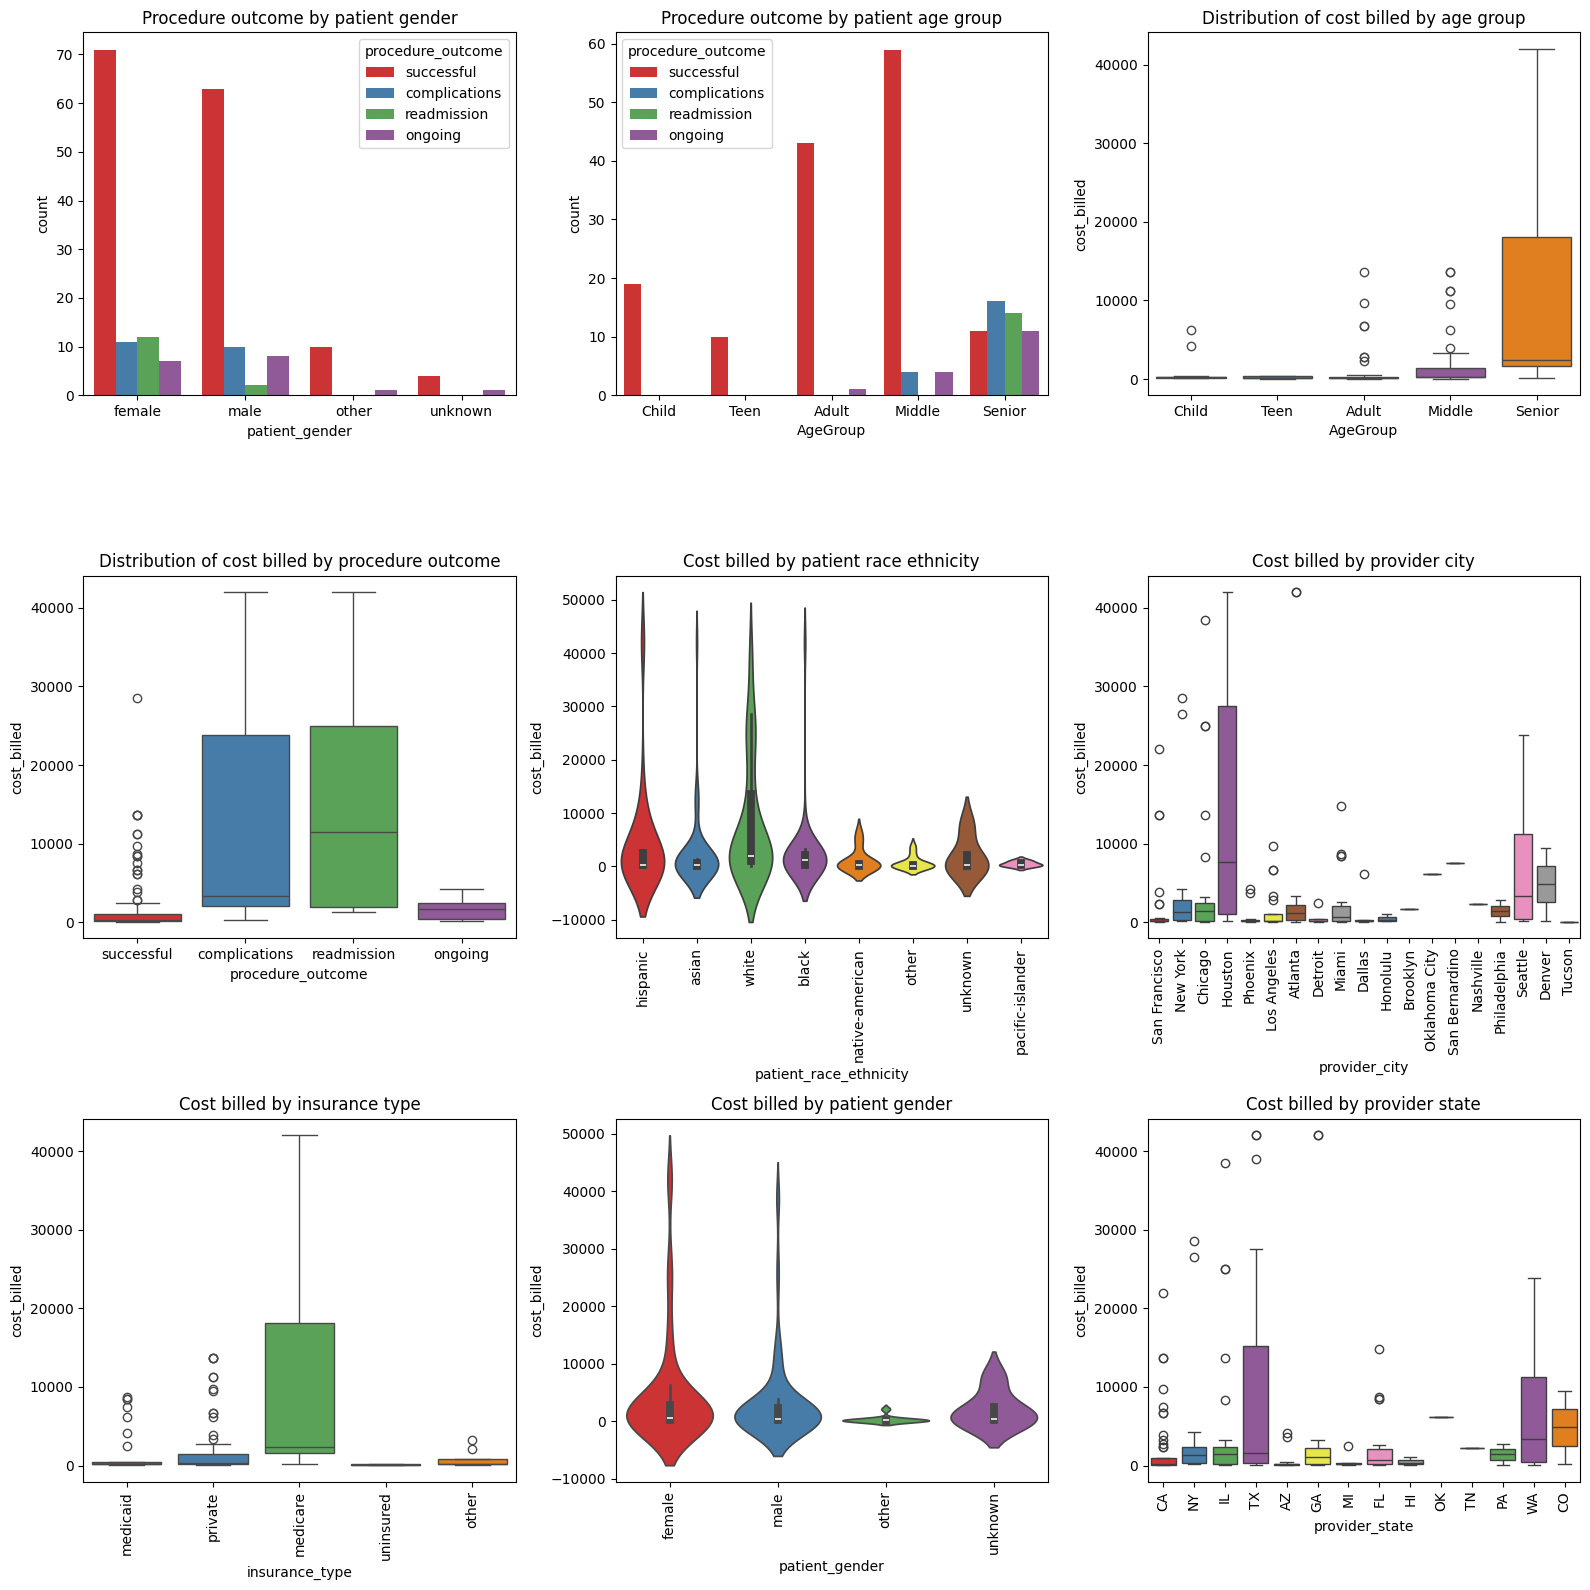

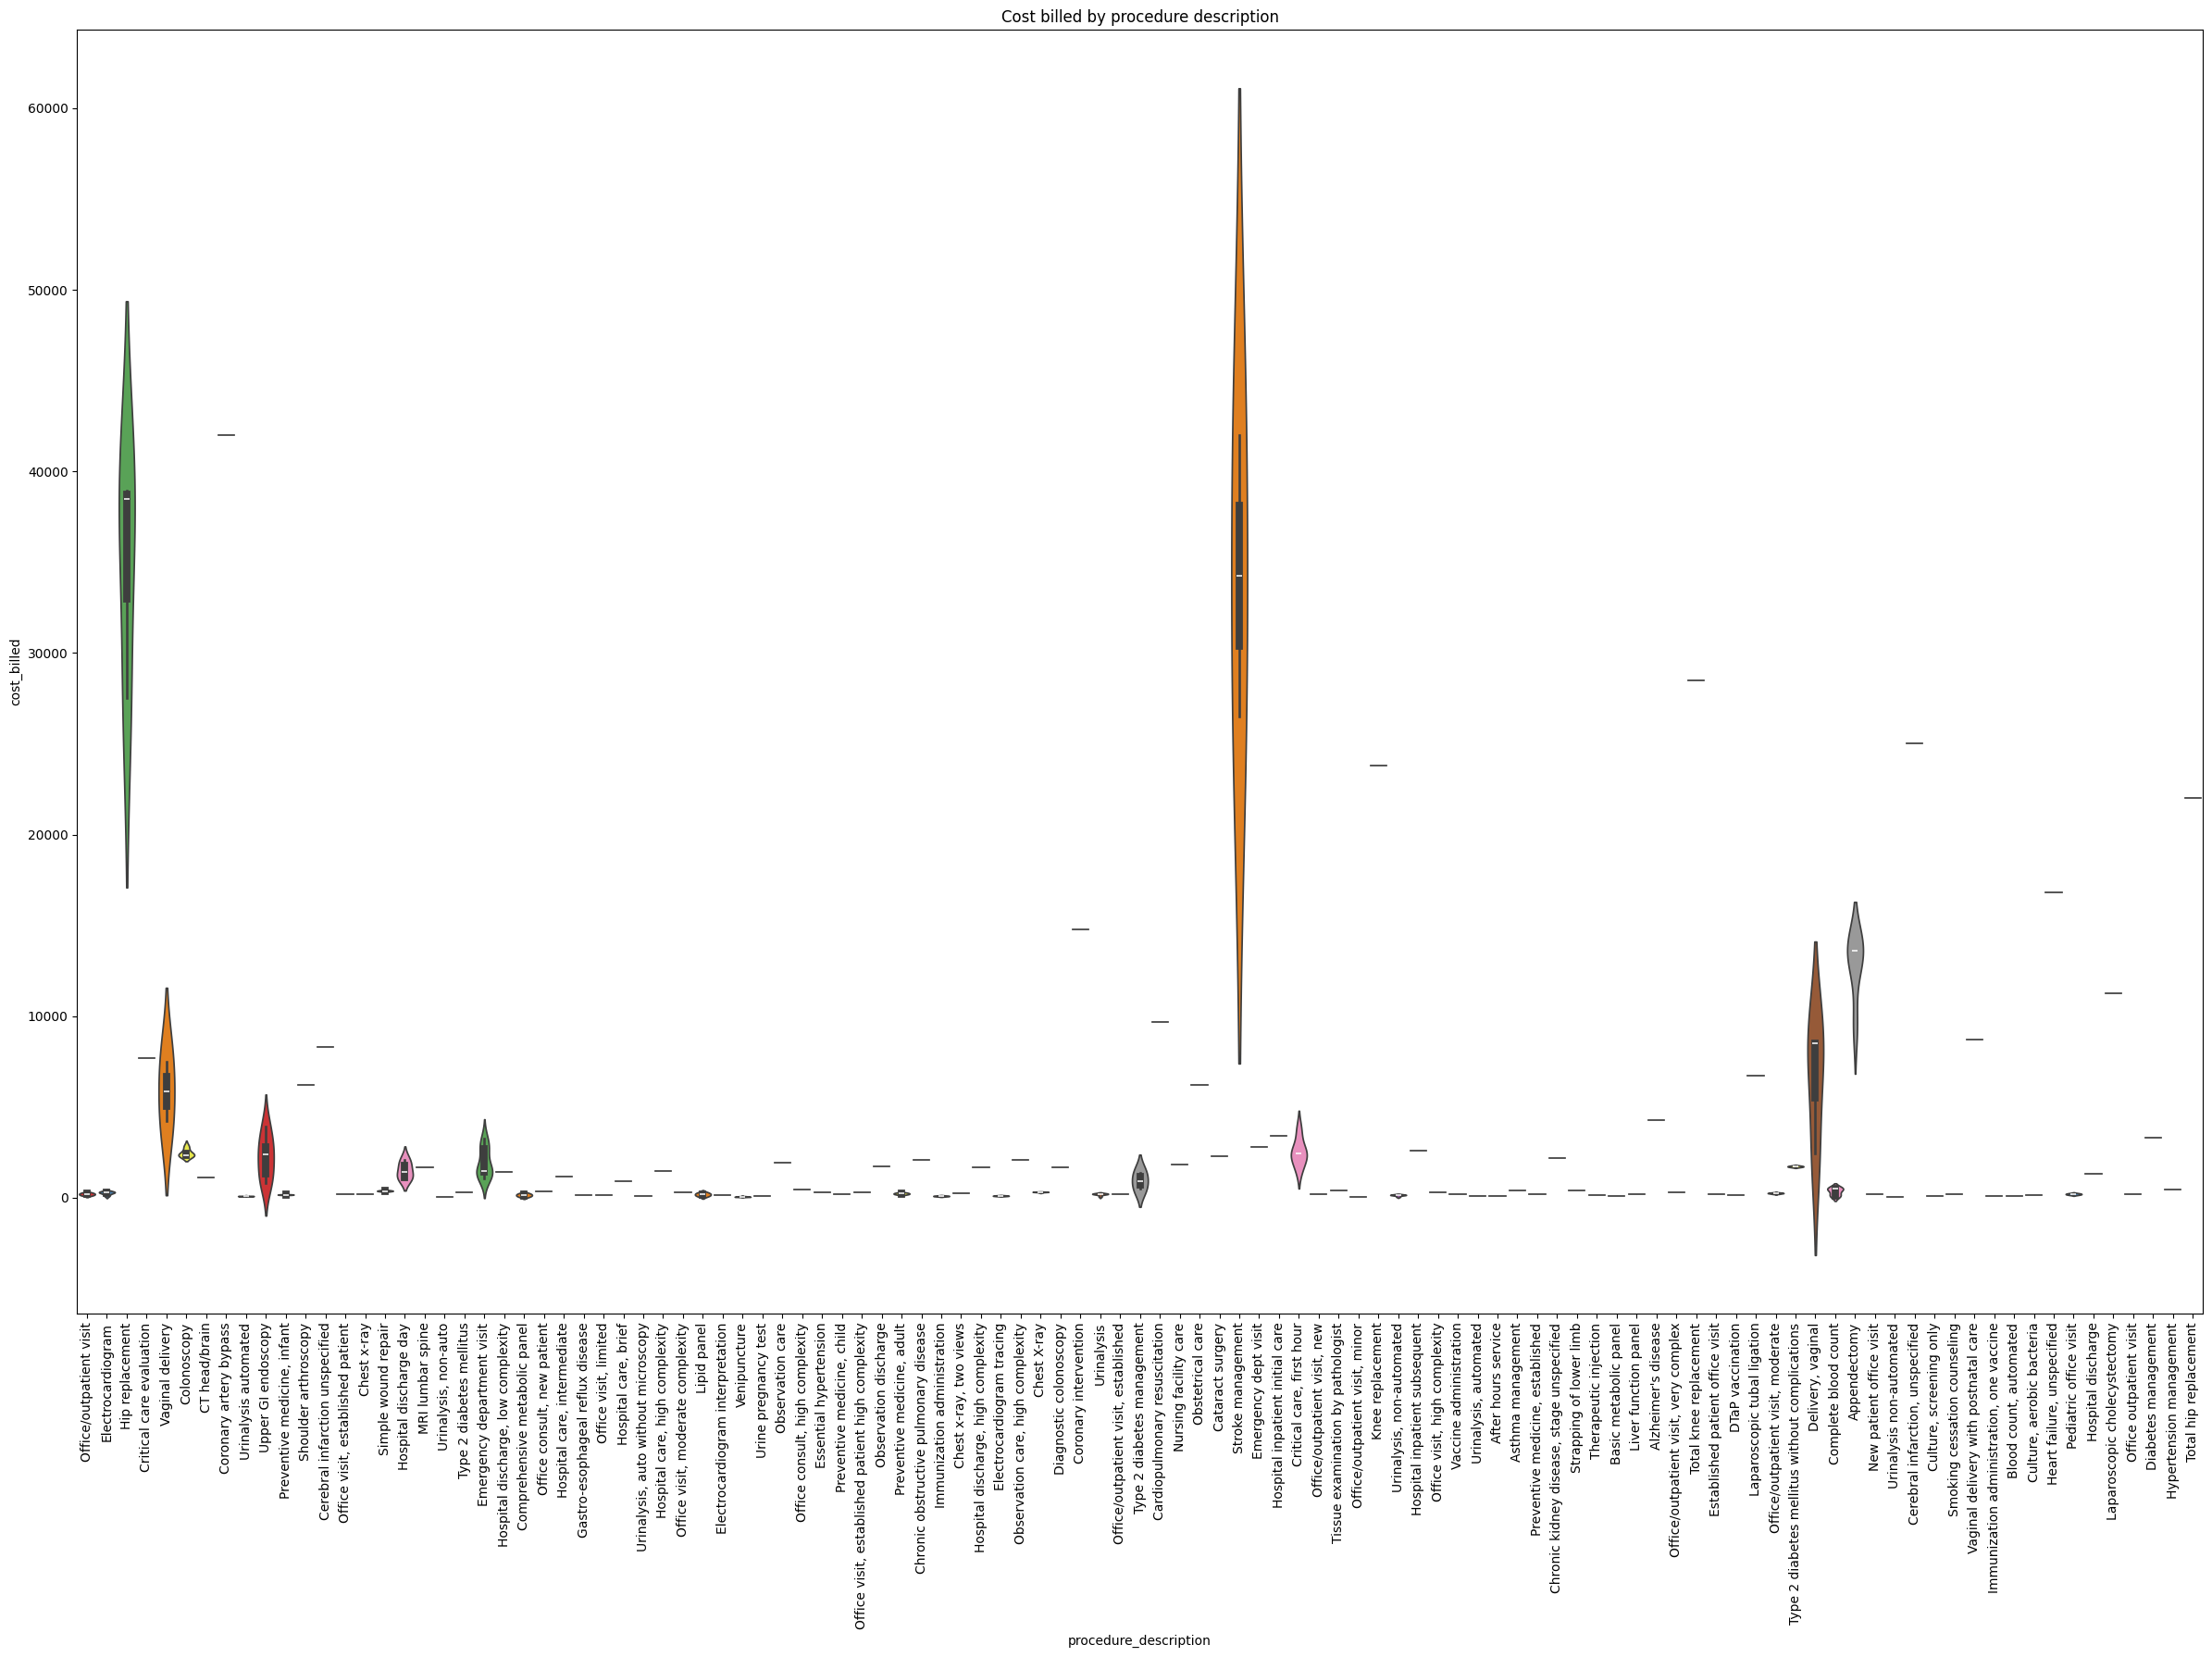

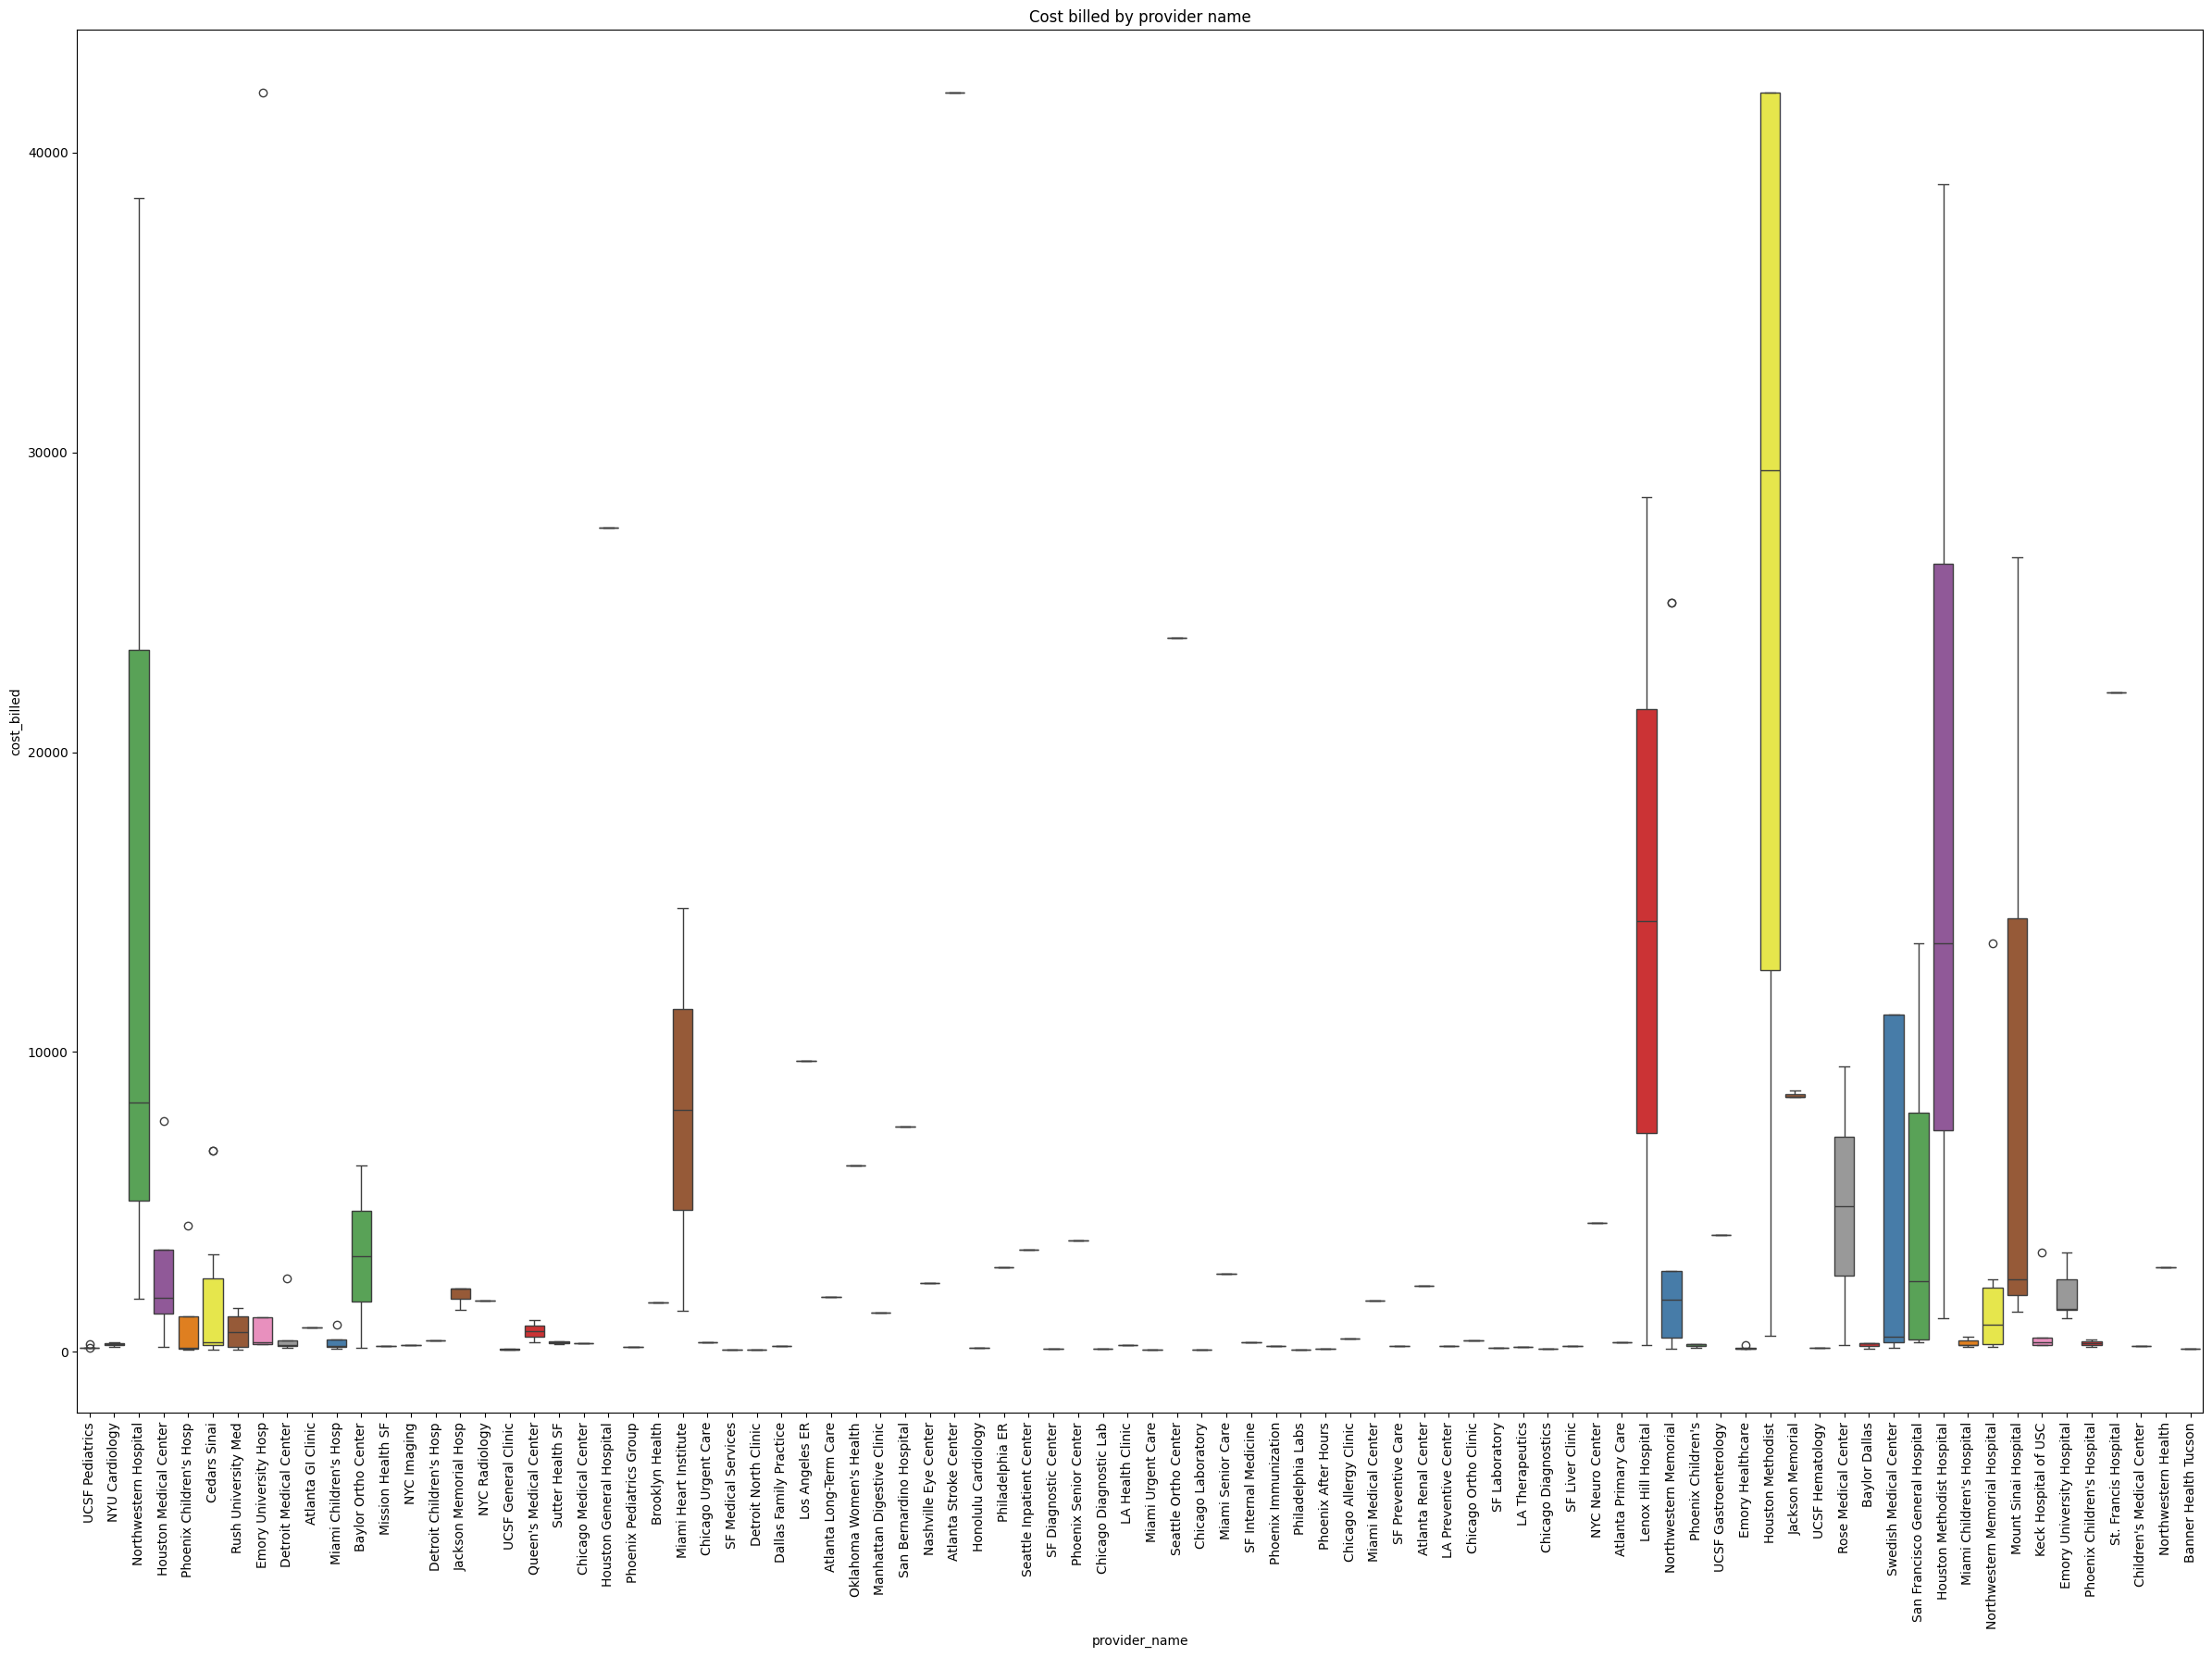

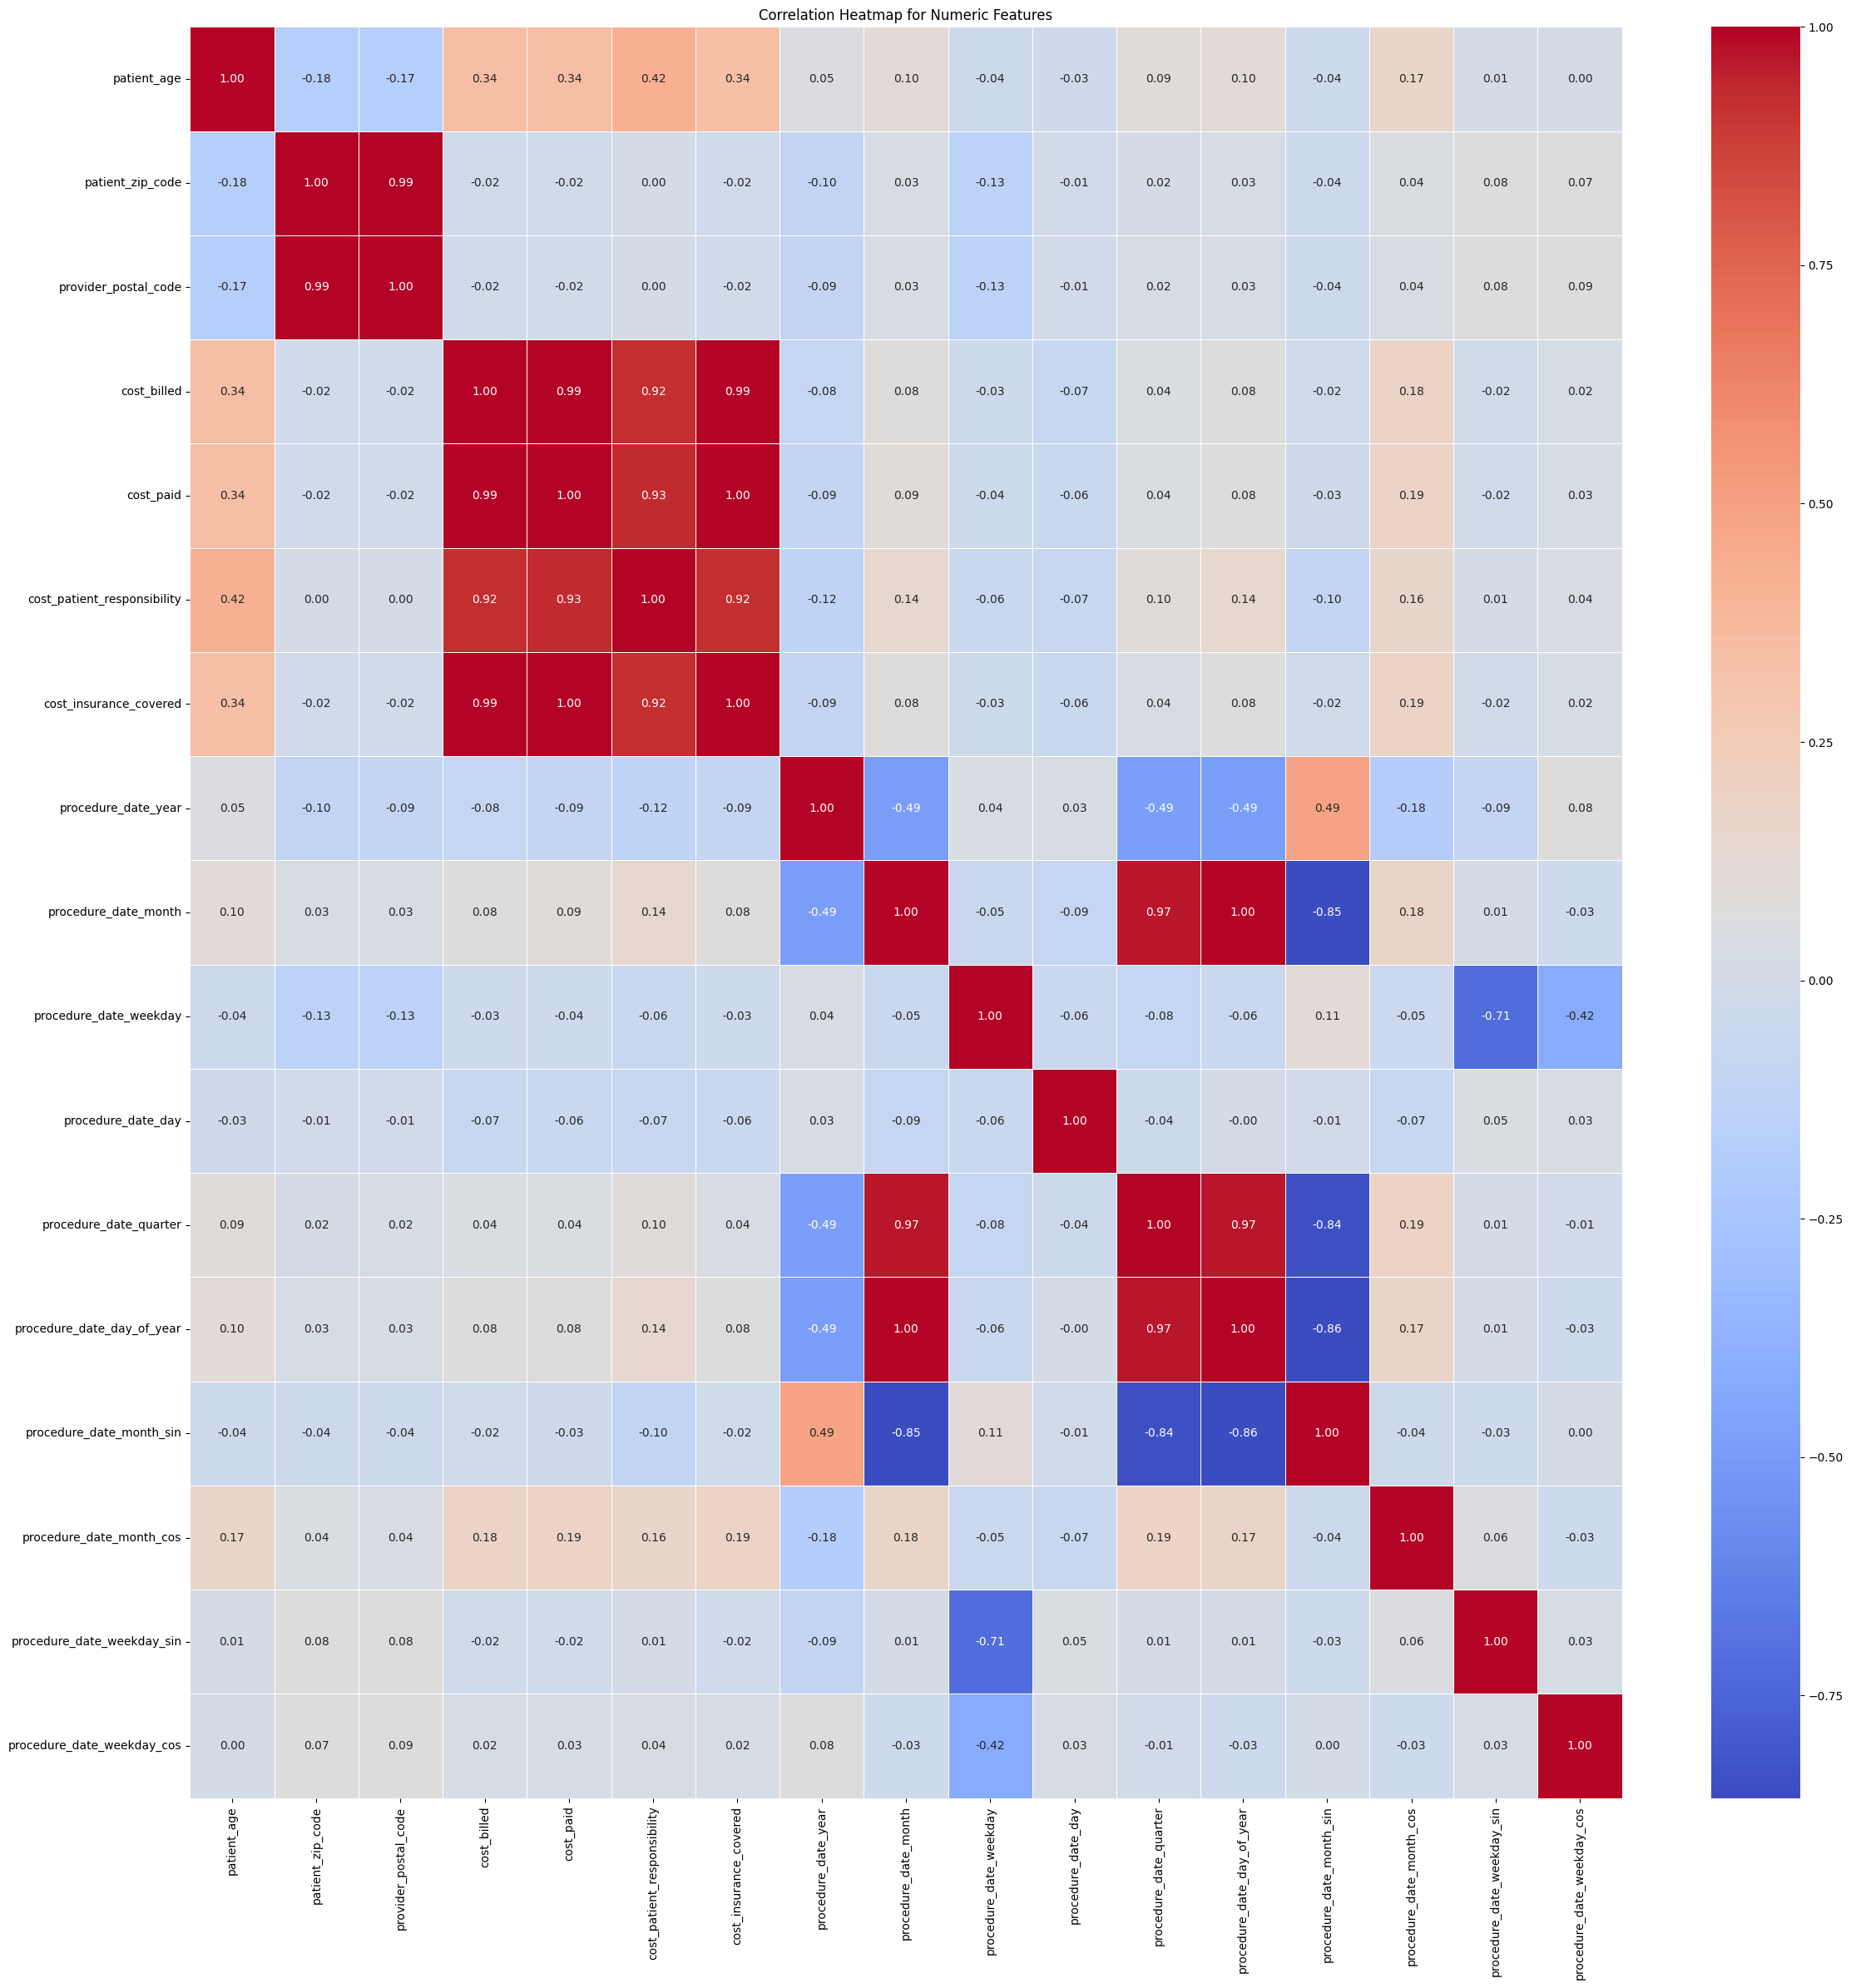

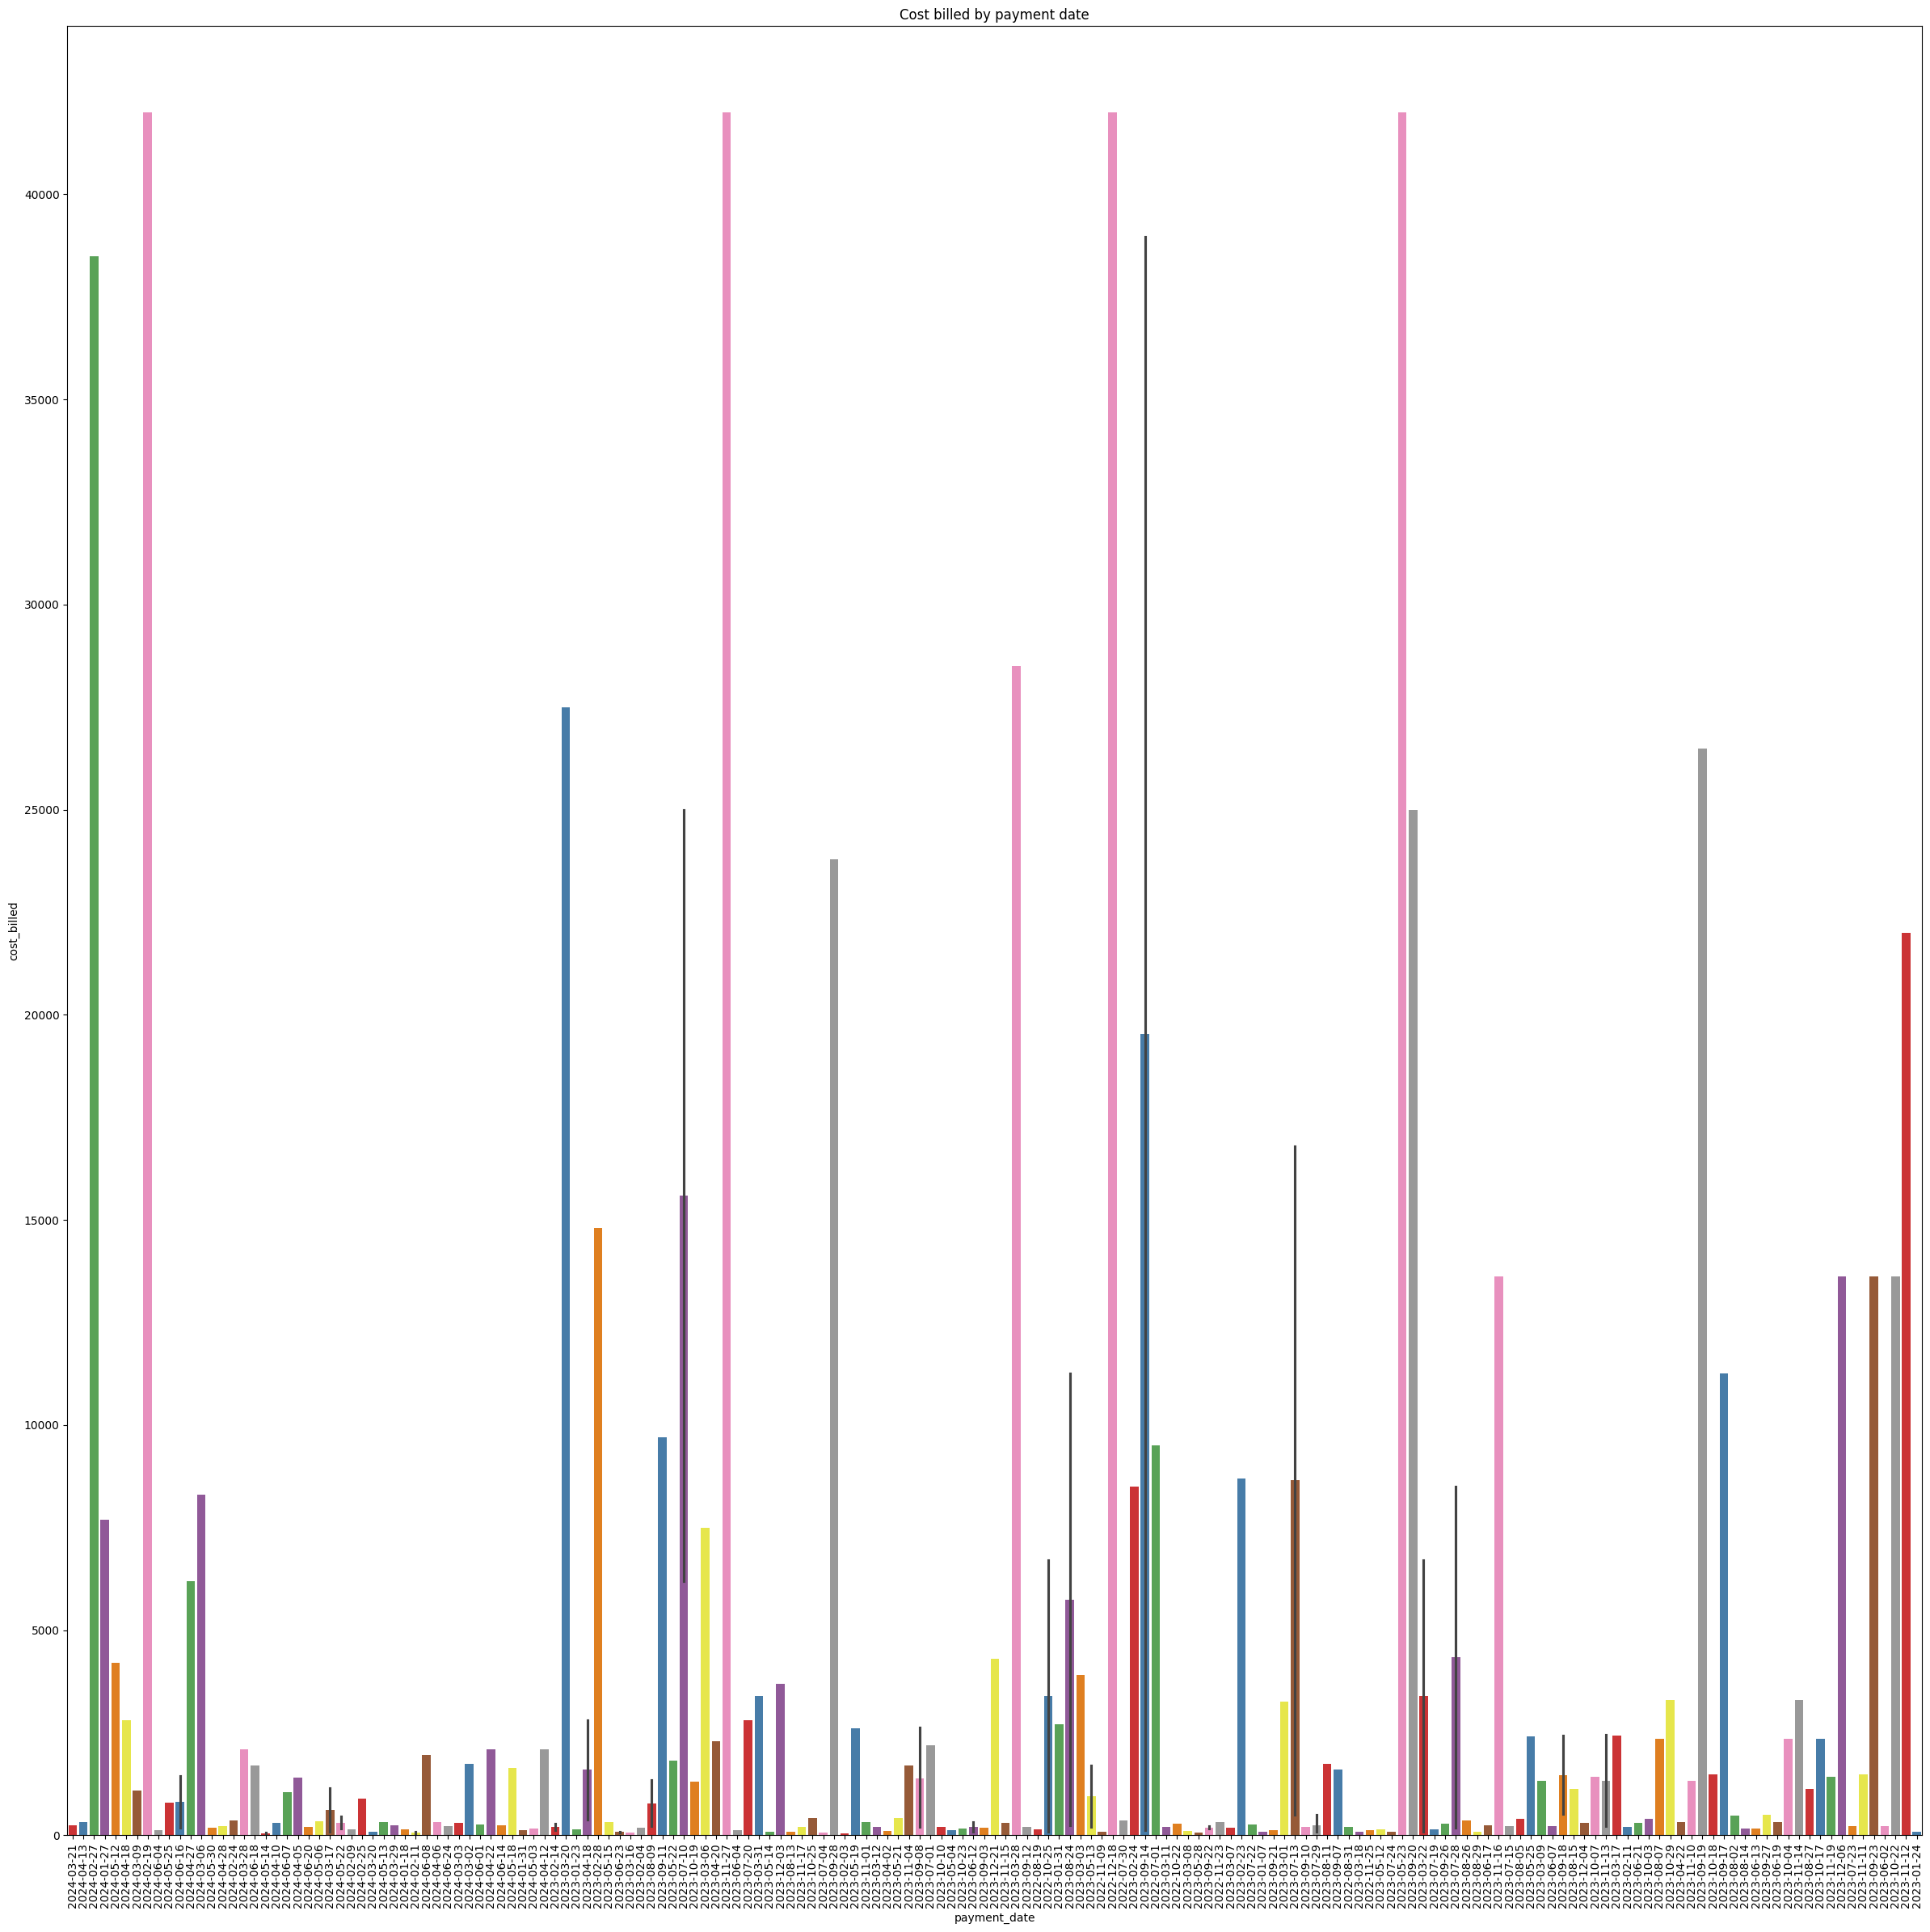

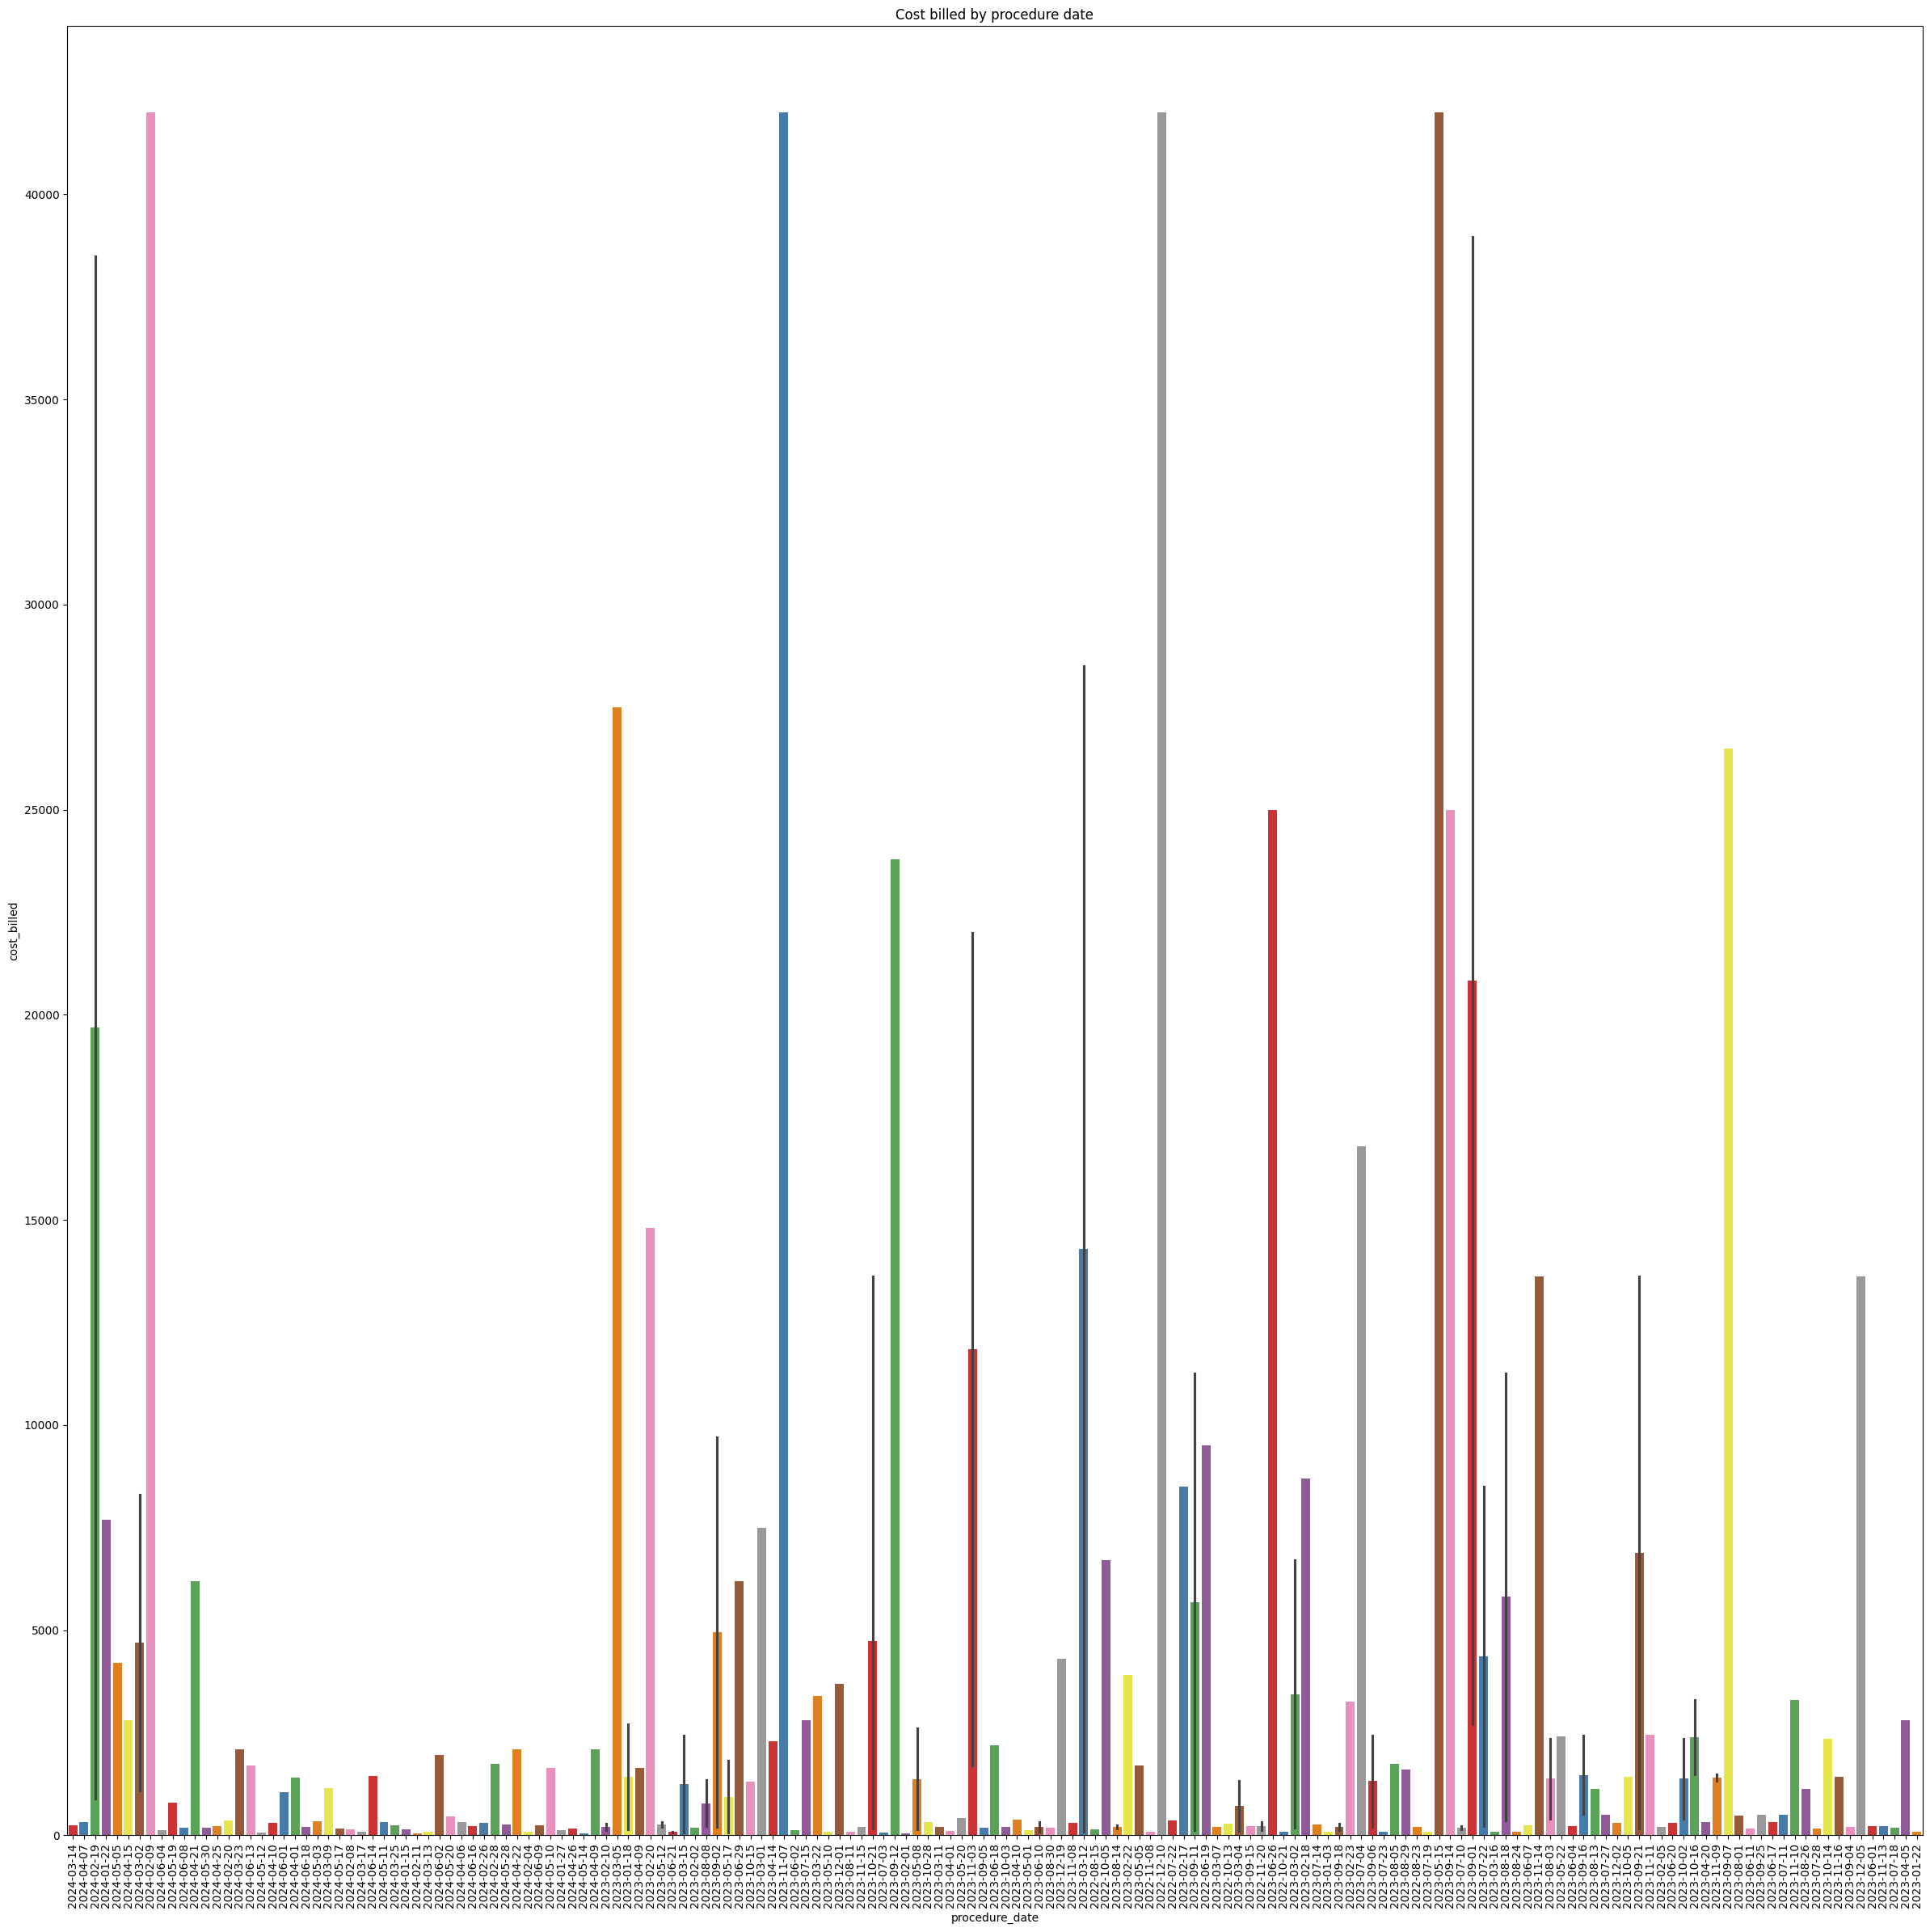

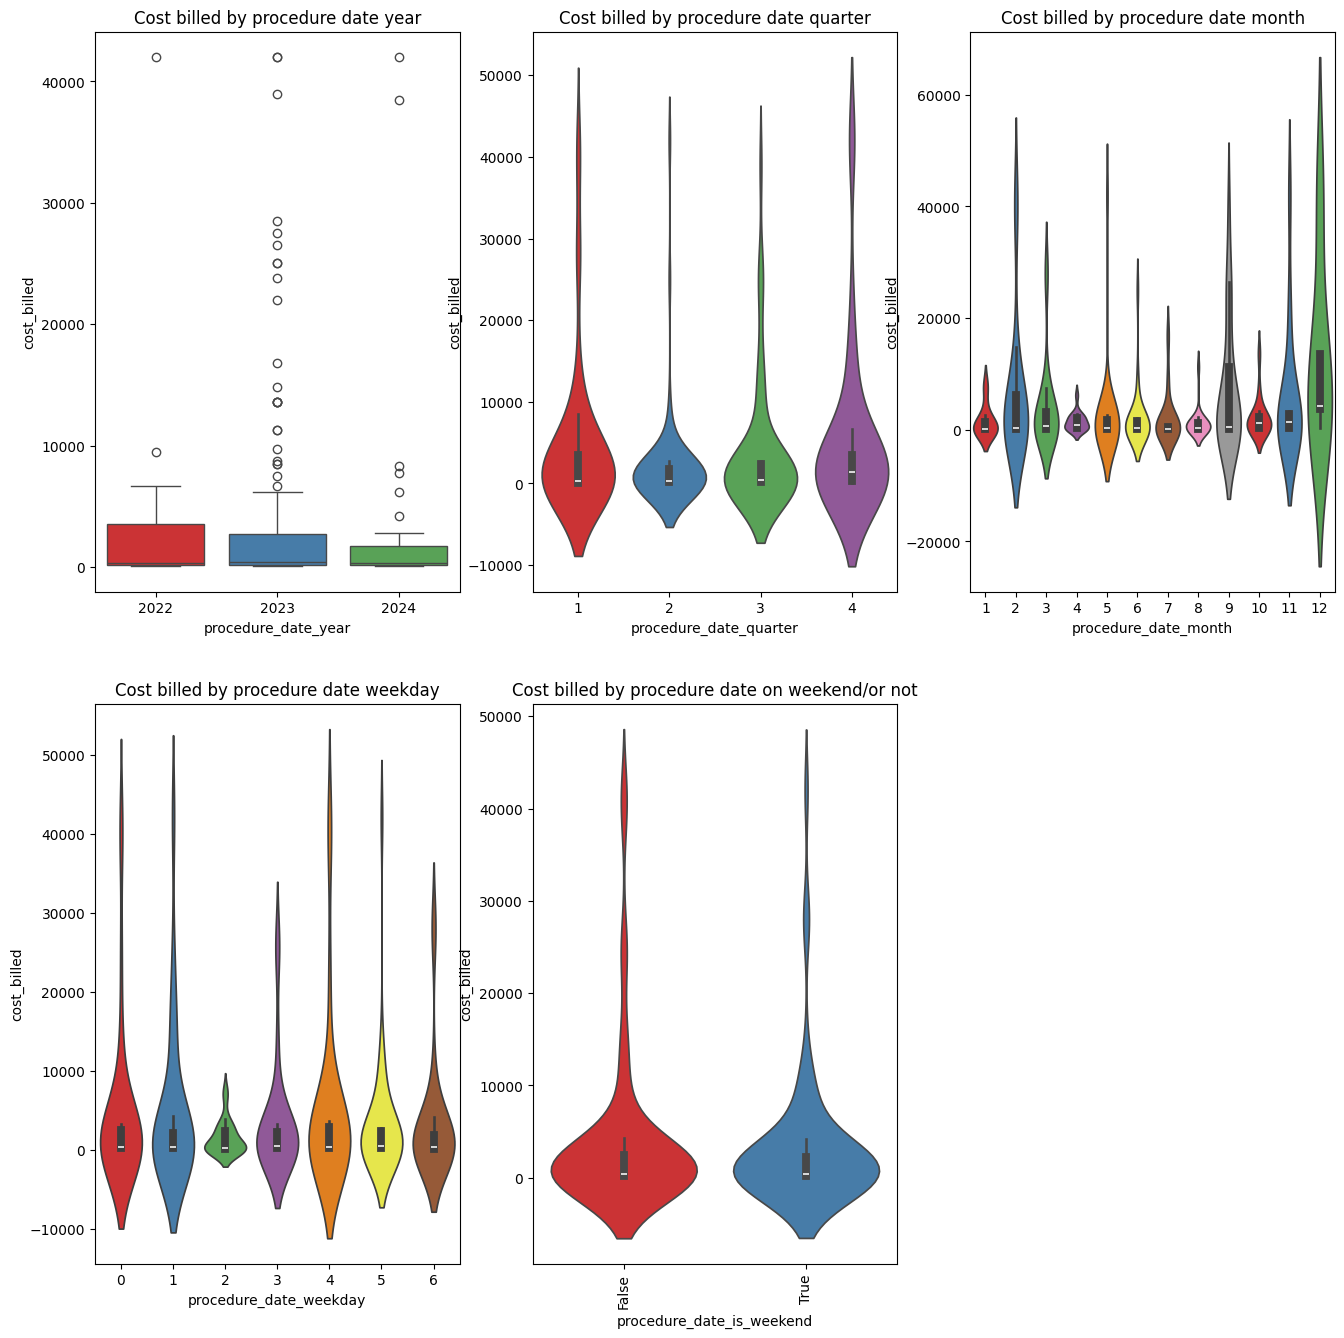

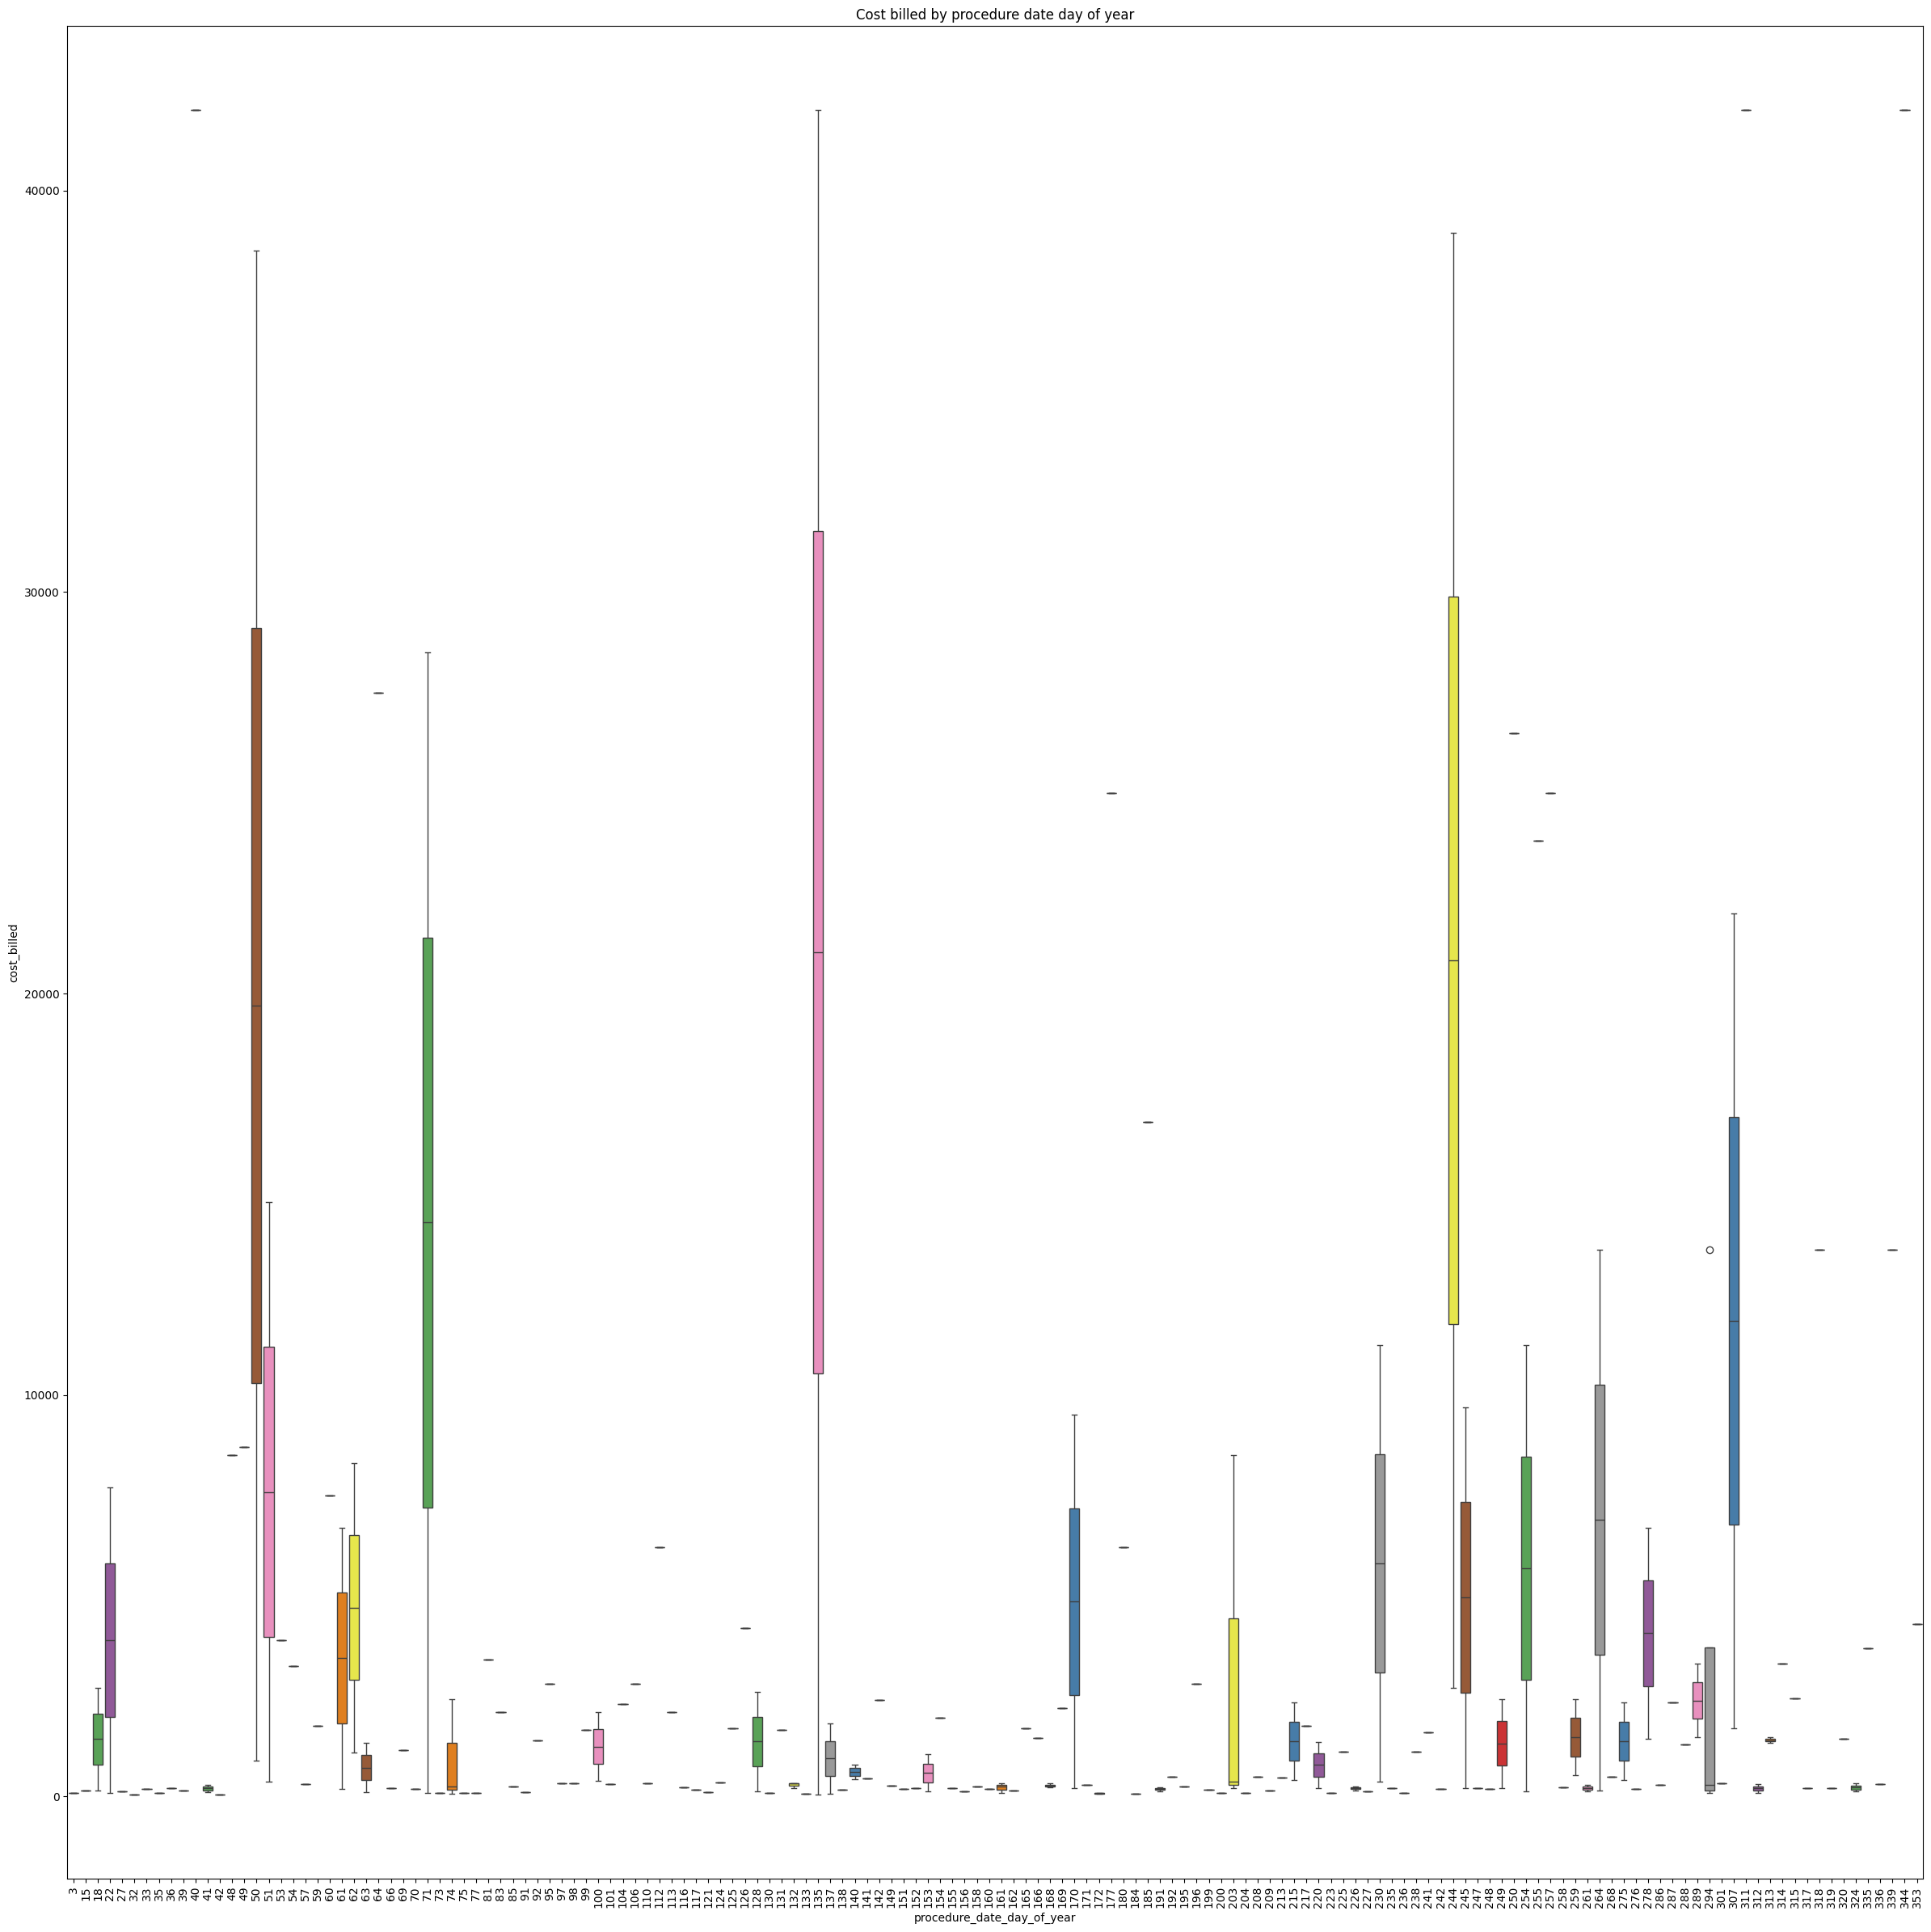

[I 2026-01-02 19:56:50,498] A new study created in memory with name: no-name-92088c5c-45f1-4780-b6ef-2e105a15f083
[I 2026-01-02 19:56:50,576] Trial 0 finished with value: 201.94649872534572 and parameters: {'n_estimators': 178, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 201.94649872534572.
[I 2026-01-02 19:56:50,632] Trial 1 finished with value: 303.9734681167944 and parameters: {'n_estimators': 112, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 201.94649872534572.
[I 2026-01-02 19:56:50,674] Trial 2 finished with value: 587.0690042503873 and parameters: {'n_estimators': 104, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 201.94649872534572.



7. ПОДГОТОВКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ
Отобрано 15 наиболее важных признаков:
  - patient_age
  - patient_gender
  - patient_race_ethnicity
  - insurance_type
  - procedure_description
  - cost_paid
  - cost_patient_responsibility
  - cost_insurance_covered
  - procedure_outcome
  - procedure_date_year
  - procedure_date_month
  - AgeGroup_Teen
  - AgeGroup_Adult
  - AgeGroup_Middle
  - AgeGroup_Senior

Размеры выборок:
  Тренировочная: (140, 15)
  Тестовая: (60, 15)

8. ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛИ
Optimizing Random Forest Regressor with Optuna for MAE and R²...


[I 2026-01-02 19:56:50,717] Trial 3 finished with value: 304.49822591752417 and parameters: {'n_estimators': 84, 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 201.94649872534572.
[I 2026-01-02 19:56:50,791] Trial 4 finished with value: 291.4302671355896 and parameters: {'n_estimators': 177, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 201.94649872534572.
[I 2026-01-02 19:56:50,851] Trial 5 finished with value: 470.9997278907955 and parameters: {'n_estimators': 149, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 201.94649872534572.
[I 2026-01-02 19:56:50,929] Trial 6 finished with value: 254.87578675918874 and parameters: {'n_estimators': 154, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 201.94649872534572.
[I

Best Random Forest hyperparameters: {'n_estimators': 156, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}
Random Forest: MAE = 569.4635874542123 , R^2 = 0.9864765133002309

Regression Report:
Среднеквадратичная ошибка: 2462453.65
Коэффициент детерминации R^2: 0.95


<Figure size 1200x500 with 0 Axes>

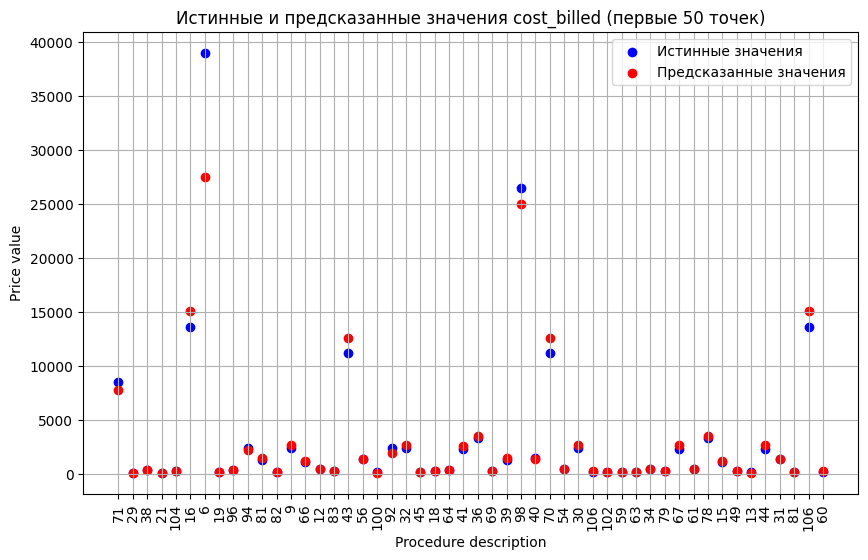

Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Model attributes: ['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_compute_oob_predictions', '_compute_partial_dependence_recursion', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_params_html', '_html_repr', '_make_estimator', '_n_samples', '_

In [29]:
%reset -f
# Adopted from the course Lesson 2:
import ml_module as ml
import eda_module as eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
#from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os
import joblib
from pathlib import Path

# Defining model saving paths
# Base directory where app.py is located
#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()          # Jupyter-safe
MODELS_DIR = BASE_DIR / "models" 

# Safe path to the CSV file
DATA_DIR = BASE_DIR / "data"  # storing CSV in a data/ folder
file_path = DATA_DIR / "healthcare-procedure-cost-dataset.csv"

# Safe paths to the pickle files
scaler_path = BASE_DIR / 'models' / 'scaler.pkl'
selector_path = BASE_DIR / 'models' / 'selector.pkl'
imputer_path = BASE_DIR / 'models' / 'imputer.pkl'
model_path = BASE_DIR / 'models' / 'model.pkl'

# Safe path to the database
DB_PATH = BASE_DIR / "data" / "procedure_costs_database.db"  # storing DB in data/

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")

print("=== ПОЛНЫЙ ЦИКЛ ОБРАБОТКИ ДАННЫХ: ДАТАСЕТ HEALTHCARE  ===\n")

# 1. ЗАГРУЗКА ДАННЫХ
print("1. ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")
data_path = file_path
df = pd.read_csv(data_path)

print(f"Размер датасета: {df.shape}")
print(f"Колонки: {list(df.columns)}")
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о типах данных:")
print(df.info())

print("\nСтатистика числовых колонок:")
print(df.describe())

# 2. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
print("\n" + "="*80)
print("2. АНАЛИЗ И ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("Пропущенные значения:")
for col, count, percent in zip(missing_data.index, missing_data.values, missing_percent.values):
    if count > 0:
        print(f"  {col}: {count} пропусков ({percent:.1f}%)")

# Визуализация пропущенных значений
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Матрица пропущенных значений')

plt.subplot(2, 2, 2)
missing_data[missing_data > 0].plot(kind='bar', color='coral')
plt.title('Количество пропущенных значений по колонкам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
print("\n3. СТРАТЕГИИ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")

# Создаем копию для обработки
df_processed = df.copy()

# Для Age используем KNN импутацию
print("Обработка возраста (Patient Age): KNN импутация")
age_imputer = KNNImputer(n_neighbors=5)
df_processed['patient_age'] = age_imputer.fit_transform(df_processed[['patient_age']])

# Для Embarked используем моду
print("Обработка (Patient Zip Code): заполнение модой")
df_processed['patient_zip_code'].fillna(df_processed['patient_zip_code'].mode()[0], inplace=True)

# Для Embarked используем моду
print("Обработка (Provider Name): заполнение модой")
df_processed['provider_name'].fillna(df_processed['provider_name'].mode()[0], inplace=True)

# Для Embarked используем моду
print("Обработка (Patient Zip Code): заполнение модой")
df_processed['provider_postal_code'].fillna(df_processed['provider_postal_code'].mode()[0], inplace=True)

print("После обработки пропусков:")
print(f"Осталось пропусков: {df_processed.isnull().sum().sum()}")

# 4. ИНЖЕНЕРИЯ ПРИЗНАКОВ
print("\n" + "="*80)
print("4. ИНЖЕНЕРИЯ ПРИЗНАКОВ")


# Creating date features
date_columns = ['procedure_date']
df_processed = ml._preprocess_date_columns(df_processed, date_columns)

print(df_processed.head())

# Создаем категории возраста
df_processed['AgeGroup'] = pd.cut(df_processed['patient_age'],
                                 bins=[0, 12, 18, 35, 60, 100],
                                 labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])


print("Созданные признаки:")
new_features = ['AgeGroup']
for feature in new_features:
    print(f"  {feature}: {df_processed[feature].nunique()} уникальных значений")

# 5. КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ
print("\n" + "="*80)
print("5. КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")

nominal_features = ['AgeGroup']
df_encoded = pd.get_dummies(df_processed, columns=nominal_features, drop_first=True)

# Удаляем колонки, которые не будем использовать
columns_to_drop = ['record_id', 'patient_id', 'provider_id', 'procedure_code','provider_state', 'provider_country']
df_encoded.drop(columns_to_drop, axis=1, inplace=True)

print(f"Размер датасета после кодирования: {df_encoded.shape}")
print(f"Количество признаков: {len(df_encoded.columns) - 1}")  # -1 для целевой переменной

# 6. ВИЗУАЛИЗАЦИЯ ДАННЫХ
print("\n" + "="*80)
print("6. ВИЗУАЛИЗАЦИЯ И АНАЛИЗ ДАННЫХ")

plt.figure(figsize=(16, 16))

# Выживаемость по полу и классу
plt.subplot(3, 3, 1)
sns.countplot(data=df_processed, x='patient_gender', hue='procedure_outcome', palette ='Set1')
plt.title('Procedure outcome by patient gender')

plt.subplot(3, 3, 2)
sns.countplot(data=df_processed, x='AgeGroup', hue='procedure_outcome', palette ='Set1')
plt.title('Procedure outcome by patient age group')

plt.subplot(3, 3, 3)
sns.boxplot(data=df_processed, x='AgeGroup', y='cost_billed', palette ='Set1')
plt.title('Distribution of cost billed by age group')

plt.subplot(3, 3, 4)
sns.boxplot(data=df_processed, x='procedure_outcome', y='cost_billed', palette ='Set1')
plt.title('Distribution of cost billed by procedure outcome')

plt.subplot(3, 3, 5)
sns.violinplot(data=df_processed, x='patient_race_ethnicity', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by patient race ethnicity')
plt.xticks(rotation=90)

plt.subplot(3, 3, 6)
sns.boxplot(data=df_processed, x='provider_city', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by provider city')
plt.xticks(rotation=90)

plt.subplot(3, 3, 7)
sns.boxplot(data=df_processed, x='insurance_type', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by insurance type')
plt.xticks(rotation=90)

plt.subplot(3, 3, 8)
sns.violinplot(data=df_processed, x='patient_gender', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by patient gender')
plt.xticks(rotation=90)

plt.subplot(3, 3, 9)
sns.boxplot(data=df_processed, x='provider_state', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by provider state')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


plt.figure(figsize=(24, 18))
sns.violinplot(data=df_processed, x='procedure_description', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by procedure description')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 18))
sns.boxplot(data=df_processed, x='provider_name', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by provider name')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


plt.figure(figsize=(24, 24))
numeric_df = df_processed.select_dtypes(include = ["number"])
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 24))
sns.barplot(data=df_processed, x='payment_date', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by payment date')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 24))
sns.barplot(data=df_processed, x='procedure_date', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#------Dates Analysis
plt.figure(figsize=(16, 16))

plt.subplot(2, 3, 1)
sns.boxplot(data=df_processed, x='procedure_date_year', y='cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date year')

plt.subplot(2, 3, 2)
sns.violinplot(data=df_processed, x='procedure_date_quarter', y='cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date quarter')

plt.subplot(2, 3, 3)
sns.violinplot(data=df_processed, x='procedure_date_month', y='cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date month')

plt.subplot(2, 3, 4)
sns.violinplot(data=df_processed, x='procedure_date_weekday', y='cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date weekday')

plt.subplot(2, 3, 5)
sns.violinplot(data=df_processed, x='procedure_date_is_weekend', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date on weekend/or not')
plt.xticks(rotation=90)

plt.figure(figsize=(24, 24))
sns.boxplot(data=df_processed, x='procedure_date_day_of_year', y = 'cost_billed', palette ='Set1')
plt.title('Cost billed by procedure date day of year')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# 7. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ
print("\n" + "="*80)
print("7. ПОДГОТОВКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ")

# # Разделяем на признаки и целевую переменную
X = df_encoded.drop('cost_billed', axis=1)
y = df_encoded['cost_billed']

# # Масштабирование числовых признаков
numerical_features = ['patient_age', 'cost_paid', 'cost_patient_responsibility', 'cost_insurance_covered', 'provider_postal_code', 'patient_zip_code']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Pre-processing of categorical features for regression
def map_categorical(df, columns=None):
    """
    Convert categorical columns into integer codes.
    Returns transformed DataFrame and mapping dictionary.
    """

    import pandas as pd

    df = df.copy()
    mapping = {}

    # Auto-detect categorical columns
    if columns is None:
        columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in columns:
        # Extract unique categories
        categories = df[col].astype("category").cat.categories
        
        # Create mapping: category - integer
        mapping[col] = {cat: i for i, cat in enumerate(categories)}

        # Replace categories with integers
        df[col] = df[col].map(mapping[col]).fillna(-1).astype(int)

    return df, mapping
    
cat_cols_for_cost_regression = ['procedure_description', 'patient_gender', 'patient_race_ethnicity', 'insurance_type', 'procedure_outcome', 'procedure_date_is_weekend', 'provider_name', 'provider_city']
X, mapping = map_categorical(X, columns = cat_cols_for_cost_regression)

# Setting procedure types as index
#X = X.set_index('procedure_description', inplace = False)
X = X.set_index('procedure_description', drop = False) # set the index whilst keeping the column in place

# Удаляем колонки, которые не будем использовать
further_columns_to_drop = ['payment_date','procedure_date', 'procedure_date_month_cos', 'procedure_date_month_sin', 'procedure_date_weekday_sin', 'procedure_date_weekday_cos']
X.drop(further_columns_to_drop, axis=1, inplace=True)

# Отбор признаков
#selector = SelectKBest(score_func=f_classif, k=15)
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(f"Отобрано {len(selected_features)} наиболее важных признаков:")
for feature in selected_features:
    print(f"  - {feature}")

# # Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, shuffle = False
)

print(f"\nРазмеры выборок:")
print(f"  Тренировочная: {X_train.shape}")
print(f"  Тестовая: {X_test.shape}")

# 8. ОБУЧЕНИЕ МОДЕЛИ
print("\n" + "="*80)
print("8. ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛИ")


# Обучение модели
model = ml.train_model(X_train, y_train)

# # Предсказания
y_pred = ml.predict(model, X_test)


# Оценка модели
print("\nRegression Report:")
mse, r2 = ml.evaluate_model(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

# Матрица ошибок
plt.figure(figsize=(12, 5))

target_column = 'cost_billed'

def plot_predictions(y_true, y_pred, num_points=50):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
    plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
    plt.xlabel('Procedure description')
    plt.xticks(ticks = range(num_points), labels = X.index[:num_points], rotation = 90)
    #plt.xticks(ticks = range(num_points), labels = X.index[:num_points], rotation = 90)
    plt.ylabel('Price value')
    plt.title(f'Истинные и предсказанные значения {target_column} (первые {num_points} точек)')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_predictions(y_test, y_pred)

print(f"Model type: {type(model)}")
print(f"Model attributes: {dir(model)}")

# # 9. АНАЛИЗ РЕЗУЛЬТАТОВ
print("\n" + "="*80)
print("9. АНАЛИЗ РЕЗУЛЬТАТОВ И ВЫВОДЫ")

print("Most importance factors:")
eda.plot_feature_importance_rf(model, X_train, feature_names=selected_features, max_features=50)


# 10. СОХРАНЕНИЕ ОБРАБОТАННЫХ ДАННЫХ
print("\n" + "="*80)
print("10. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")

# # Сохраняем обработанные данные
#processed_data = pd.concat([pd.DataFrame(X_selected, columns=selected_features), y.reset_index(drop=True)], axis=1)
processed_data = pd.concat([pd.DataFrame(X_selected, columns=selected_features)], axis=1)
print(f"Финальный размер обработанного датасета: {processed_data.shape}")

# # Сводка по процессу
print("\n" + "="*80)
print("СВОДКА ПРОЦЕССА ОБРАБОТКИ ДАННЫХ:")
print("="*80)
process_steps = [
    ("Загрузка данных", f"{df.shape[0]} строк, {df.shape[1]} колонок"),
    ("Обработка пропусков", "KNN импутация + создание новых признаков"),
    ("Инженерия признаков", f"Создано {len(new_features)} новых признаков"),
    ("Кодирование", f"Получено {X.shape[1]} признаков после кодирования"),
    ("Отбор признаков", f"Отобрано {X_selected.shape[1]} наиболее важных"),
    ("Масштабирование", "StandardScaler для числовых признаков"),
    ("Обучение модели", f"RandomForest с точностью test R2 {r2:.3f} and MSE {mse:.3f}")
]

for step, description in process_steps:
    print(f"  {step}: {description}")


# Save the model, selector and scaler
with open(scaler_path, 'wb') as f:
    joblib.dump(scaler, f)
with open(selector_path, 'wb') as f:
    joblib.dump(selector, f)
with open(imputer_path, 'wb') as f:
    joblib.dump(age_imputer, f)
with open(model_path, 'wb') as f:
    joblib.dump(model, f)
    
print("All model components are saved.")

In [30]:
# Relational Database: SQLite

import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime

from pathlib import Path

# Base directory where app.py is located
#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()          # Jupyter-safe

# Safe path to the CSV file
DATA_DIR = BASE_DIR / "data"  # storing CSV in a data/ folder
file_path = DATA_DIR / "healthcare-procedure-cost-dataset.csv"

# Safe path to the database
DB_PATH = BASE_DIR / "data" / "procedure_costs_database.db"  # storing DB in data/

print("=== Saving Data of Procedure Costs in SQLITE Database ===\n")

# Создаем подключение к базе данных (файл создастся автоматически)
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

print("1. СОЗДАНИЕ СТРУКТУРЫ БАЗЫ ДАННЫХ")

# Создаем таблицы с нормализованной структурой
create_tables_sql = """

-- Procedures Table with date-derived columns
CREATE TABLE IF NOT EXISTS procedures (
    procedure_id INTEGER PRIMARY KEY AUTOINCREMENT,
    procedure_code TEXT,
    procedure_description TEXT,
    procedure_date DATE,
    procedure_date_weekday INTEGER,       -- 0=Sunday .. 6=Saturday
    procedure_date_month INTEGER,         -- 1..12
    procedure_date_year INTEGER,
    procedure_date_quarter INTEGER,       -- 1..4
    procedure_date_day_of_year INTEGER,   -- 1..366
    procedure_date_is_weekend INTEGER,    -- 0=weekday, 1=weekend
    created_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);


-- Patients Table
CREATE TABLE IF NOT EXISTS patients (
    patient_id INTEGER PRIMARY KEY AUTOINCREMENT,
    original_patient_id TEXT,
    patient_age TEXT NOT NULL,
    patient_age_group TEXT,
    patient_gender TEXT,
    patient_race_ethnicity TEXT,
    patient_zip_code REAL
);

-- Providers table
CREATE TABLE IF NOT EXISTS providers (
    provider_id INTEGER PRIMARY KEY AUTOINCREMENT,
    original_provider_id TEXT,
    provider_name TEXT,
    provider_city TEXT,
    provider_state TEXT,
    provider_postal_code TEXT
);

-- Main table with costs and associated references
CREATE TABLE IF NOT EXISTS costs (
    cost_id INTEGER PRIMARY KEY AUTOINCREMENT,
    record_id TEXT,
    patient_id INTEGER,
    procedure_id INTEGER,
    provider_id INTEGER,
    procedure_outcome TEXT,
    cost_billed REAL,
    cost_paid REAL,
    payment_date DATE,
    cost_insurance_covered REAL,
    cost_patient_responsibility REAL,
    FOREIGN KEY (patient_id) REFERENCES patients (patient_id),
    FOREIGN KEY (procedure_id) REFERENCES procedures (procedure_id),
    FOREIGN KEY (provider_id) REFERENCES providers (provider_id)
);

-- Таблица для хранения обработанных признаков ML
CREATE TABLE IF NOT EXISTS ml_features (
    feature_id INTEGER PRIMARY KEY AUTOINCREMENT,
    cost_id INTEGER,
    feature_name TEXT NOT NULL,
    feature_value REAL NOT NULL,
    feature_type TEXT CHECK(feature_type IN ('numerical', 'categorical', 'engineered')),
    scaling_method TEXT,
    FOREIGN KEY (cost_id) REFERENCES costs (cost_id)
);

-- Таблица для мониторинга процессов ETL
CREATE TABLE IF NOT EXISTS etl_log (
    log_id INTEGER PRIMARY KEY AUTOINCREMENT,
    process_name TEXT NOT NULL,
    records_processed INTEGER,
    status TEXT CHECK(status IN ('success', 'error', 'warning')),
    error_message TEXT,
    process_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);
"""

# Выполняем создание таблиц
cursor.executescript(create_tables_sql)
print("Таблицы успешно созданы")

# print("\n2. ЗАПОЛНЕНИЕ СПРАВОЧНИКОВ")

print("\n3. Loading patient data")

# Загружаем оригинальные данные
df = pd.read_csv(file_path)

# # Функция для логирования ETL процесса
def log_etl_process(process_name, records_processed, status='success', error_message=None):
    cursor.execute("""
        INSERT INTO etl_log (process_name, records_processed, status, error_message)
        VALUES (?, ?, ?, ?)
    """, (process_name, records_processed, status, error_message))
    conn.commit()

try:
    # Определяем возрастную группу
    patient_data = []
    
    for _, row in df.iterrows():
        # Convert age to number
        age = row['patient_age']
        age = float(age) if pd.notna(age) else None
    
        # Determine age group
        if age is None:
            age_group = 'Unknown'
        elif age <= 12:
            age_group = 'Child'
        elif age <= 18:
            age_group = 'Teen'
        elif age <= 35:
            age_group = 'Adult'
        elif age <= 60:
            age_group = 'Middle'
        else:
            age_group = 'Senior'
    
        # Build tuple for insertion
        patient_data.append((
            row['patient_id'],                # original_patient_id
            age,                              # patient_age
            age_group,                        # patient_age_group
            row['patient_gender'],
            row['patient_race_ethnicity'],
            row['patient_zip_code']
        ))
    
    cursor.executemany("""
        INSERT INTO patients (
            original_patient_id,
            patient_age,
            patient_age_group,
            patient_gender,
            patient_race_ethnicity,
            patient_zip_code
        )
        VALUES (?, ?, ?, ?, ?, ?)
    """, patient_data)
    
    print("Inserted patients:", len(patient_data))

except Exception as e:
    log_etl_process('patient_loading', 0, 'error', str(e))
    print(f"Error when loading patient data: {e}")

print("\n4. Loading Procedure Data")

try:
    procedure_data = []

    # Iterate through the DataFrame
    for _, row in df.iterrows():
        proc_date = pd.to_datetime(row['procedure_date'], errors='coerce')
        
        if pd.isna(proc_date):
            weekday = month = year = quarter = day_of_year = is_weekend = None
            proc_date_value = None
        else:
            weekday = proc_date.weekday()            # 0=Monday .. 6=Sunday
            month = proc_date.month
            year = proc_date.year
            quarter = (proc_date.month - 1) // 3 + 1
            day_of_year = proc_date.dayofyear
            is_weekend = 1 if weekday >= 5 else 0    # Saturday=5, Sunday=6
            proc_date_value = proc_date.date()

        procedure_data.append((
            row['procedure_code'],
            row['procedure_description'],
            proc_date_value,
            weekday,
            month,
            year,
            quarter,
            day_of_year,
            is_weekend
        ))

    # Insert into the procedures table
    cursor.executemany("""
        INSERT INTO procedures (
            procedure_code,
            procedure_description,
            procedure_date,
            procedure_date_weekday,
            procedure_date_month,
            procedure_date_year,
            procedure_date_quarter,
            procedure_date_day_of_year,
            procedure_date_is_weekend
        )
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, procedure_data)

    print(f"Loaded procedures: {len(procedure_data)}")
    log_etl_process('procedures_loading', len(procedure_data), 'success')

except Exception as e:
    print("Error loading procedures:", e)
    log_etl_process('procedures_loading', 0, 'error', str(e))


print("\n6. Loading providers data")
try:
    # Select relevant columns and drop duplicates based on provider_name + city + state + postal_code
    df_providers_clean = df[[
        'provider_id',
        'provider_name',
        'provider_city',
        'provider_state',
        'provider_postal_code'
    ]].drop_duplicates()

    # Prepare data tuples
    provider_data = []
    for _, row in df_providers_clean.iterrows():
        provider_data.append((
            row['provider_id'],
            row['provider_name'],
            row['provider_city'],
            row['provider_state'],
            row['provider_postal_code']
        ))

    # Insert into providers table
    cursor.executemany("""
        INSERT INTO providers (
            original_provider_id,
            provider_name,
            provider_city,
            provider_state,
            provider_postal_code
        )
        VALUES (?, ?, ?, ?, ?)
    """, provider_data)

    print(f"Loaded providers: {len(provider_data)}")
    log_etl_process('providers_loading', len(provider_data), 'success')

except Exception as e:
    print("Error loading providers:", e)
    log_etl_process('providers_loading', 0, 'error', str(e))


print("\n7. Loading costs data")
try:
    # Clean dataframe from duplicates (same record_id)
    df_costs = df[[
        'record_id',
        'patient_id',  # Ensure that patient_id is properly handled
        'procedure_code',  # CSV has 'procedure_code' (not procedure_id)
        'provider_id',
        'procedure_outcome',
        'cost_billed',
        'cost_paid',
        'payment_date',
        'cost_insurance_covered',
        'cost_patient_responsibility'
    ]].drop_duplicates()

    # Prepare data for insertion into the costs table
    cost_data = []
    for _, row in df_costs.iterrows():

        # Lookup procedure_id from the procedures table based on procedure_code
        cursor.execute("""
            SELECT procedure_id 
            FROM procedures 
            WHERE procedure_code = ?
        """, (row['procedure_code'],))
        procedure_id = cursor.fetchone()

        # If procedure_id exists, get it, otherwise set to None
        if procedure_id:
            procedure_id = procedure_id[0]
        else:
            print(f"Warning: procedure_code {row['procedure_code']} not found in procedures table.")
            procedure_id = None

        # Lookup patient_id from patients table based on the 'original_patient_id'
        cursor.execute("""
            SELECT patient_id 
            FROM patients 
            WHERE original_patient_id = ?
        """, (row['patient_id'],))
        patient_id = cursor.fetchone()

        # If patient_id exists, get it, otherwise set to None
        if patient_id:
            patient_id = patient_id[0]
        else:
            print(f"Warning: patient_id {row['patient_id']} not found in patients table.")
            patient_id = None

        # Lookup provider_id from providers table based on the 'provider_name' (or other unique column)
        cursor.execute("""
            SELECT provider_id 
            FROM providers 
            WHERE original_provider_id = ?
        """, (row['provider_id'],))  # Assumes provider_id in CSV corresponds to provider_id in DB
        provider_id = cursor.fetchone()

        # If provider_id exists, get it, otherwise set to None
        if provider_id:
            provider_id = provider_id[0]
        else:
            print(f"Warning: provider_id {row['provider_id']} not found in providers table.")
            provider_id = None

        # Payment date — convert to YYYY-MM-DD
        if pd.notna(row['payment_date']):
            payment_date = str(pd.to_datetime(row['payment_date']).date())
        else:
            payment_date = None

        # Handle non-numeric fields
        patient_id = int(patient_id) if patient_id else None
        provider_id = int(provider_id) if provider_id else None

        # Build the tuple for insertion into the costs table
        cost_data.append((
            row['record_id'],
            patient_id,  # Insert the patient_id (should be a valid integer)
            procedure_id,  # Insert the procedure_id from the lookup
            provider_id,  # Insert the provider_id (should be a valid integer)
            row['procedure_outcome'] if pd.notna(row['procedure_outcome']) else None,
            float(row['cost_billed']) if pd.notna(row['cost_billed']) else None,
            row['cost_paid'],
            payment_date,
            float(row['cost_insurance_covered']) if pd.notna(row['cost_insurance_covered']) else None,
            float(row['cost_patient_responsibility']) if pd.notna(row['cost_patient_responsibility']) else None
        ))

    # Enabling foreign key checks
    conn.execute("PRAGMA foreign_keys = ON")

    # Insert data into the costs table
    cursor.executemany("""
        INSERT INTO costs (
            record_id,
            patient_id,
            procedure_id,
            provider_id,
            procedure_outcome,
            cost_billed,
            cost_paid,
            payment_date,
            cost_insurance_covered,
            cost_patient_responsibility
        )
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, cost_data)

    print(f"Loaded costs: {len(cost_data)}")
    log_etl_process('costs_loading', len(cost_data), 'success')

except Exception as e:
    print("Error loading costs:", e)
    log_etl_process('costs_loading', 0, 'error', str(e))




print("\n7. СОЗДАНИЕ ИНДЕКСОВ ДЛЯ ОПТИМИЗАЦИИ ЗАПРОСОВ")

indices_sql = """
-- Patients Table Indexes
CREATE INDEX IF NOT EXISTS idx_patients_gender ON patients(patient_gender);
CREATE INDEX IF NOT EXISTS idx_patients_age ON patients(patient_age);  -- patient_age is numerically typed if it's frequently filtered
CREATE INDEX IF NOT EXISTS idx_patient_age_group ON patients(patient_age_group); -- Useful if filtering by age group

-- Costs Table (Foreign Keys Indexes)
CREATE INDEX IF NOT EXISTS idx_costs_patient_id ON costs(patient_id); -- Optimizes queries involving patient_id
CREATE INDEX IF NOT EXISTS idx_costs_procedure_id ON costs(procedure_id); -- Optimizes queries involving procedure_id
CREATE INDEX IF NOT EXISTS idx_costs_provider_id ON costs(provider_id); -- Optimizes queries involving provider_id

-- Composite Index for frequent filtering by both patient_id and procedure_id (if applicable)
CREATE INDEX IF NOT EXISTS idx_costs_patient_procedure ON costs(patient_id, procedure_id); -- if often query using both

-- ML Features Table
CREATE INDEX IF NOT EXISTS idx_ml_features_cost_id ON ml_features(cost_id); -- Optimizes queries filtering by cost_id

"""

cursor.executescript(indices_sql)
print("Indices are created")

# print("\n8. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ")

# Выполняем проверочные запросы
check_queries = {
    "Общее количество пациентов": "SELECT COUNT(*) FROM patients",
    
    # ---Cost billed by patient_gender
    "Стоимость по пациентам по полу": """
        SELECT p.patient_gender,
               SUM(c.cost_billed) AS total_cost_billed
        FROM patients p
        JOIN costs c ON p.patient_id = c.patient_id
        GROUP BY p.patient_gender
    """,
    
    # ---Cost billed by patient_race_ethnicity
    "Стоимость по пациентам по расовой/этнической принадлежности": """
        SELECT p.patient_race_ethnicity,
               SUM(c.cost_billed) AS total_cost_billed
        FROM patients p
        JOIN costs c ON p.patient_id = c.patient_id
        GROUP BY p.patient_race_ethnicity
    """,
    
    # ---Cost billed by procedure_date_quarter
    "Стоимость по кварталам процедуры": """
        SELECT p.procedure_date_quarter,
               SUM(c.cost_billed) AS total_cost_billed
        FROM procedures p
        JOIN costs c ON p.procedure_id = c.procedure_id
        GROUP BY p.procedure_date_quarter
    """
}


print("\nСТАТИСТИКА БАЗЫ ДАННЫХ:")
print("-" * 50)

for check_name, query in check_queries.items():
    cursor.execute(query)
    result = cursor.fetchall()
    print(f"{check_name}:")
    for row in result:
        print(f"  {row}")
    print()

print("\n9. ПРИМЕРЫ АНАЛИТИЧЕСКИХ ЗАПРОСОВ")


analytical_queries = {

    # Top 5 most expensive procedures (by total billed cost)
    'top5_expensive_procedures':"""
        SELECT p.procedure_code, p.procedure_description,
               SUM(c.cost_billed) AS total_billed,
               AVG(c.cost_billed) AS avg_billed
        FROM procedures p
        JOIN costs c ON c.procedure_id = p.procedure_id
        GROUP BY p.procedure_code, p.procedure_description  -- Group by both procedure_code and procedure_description
        ORDER BY total_billed DESC
        LIMIT 5;
    """,

    # Top 5 most expensive providers (by mean cost billed)
    'top5_expensive_providers': """
        SELECT pr.provider_name, pr.provider_city, pr.provider_state,
               AVG(c.cost_billed) AS avg_billed,
               SUM(c.cost_billed) AS total_billed
        FROM providers pr
        JOIN costs c ON c.provider_id = pr.provider_id
        GROUP BY pr.provider_id
        ORDER BY avg_billed DESC
        LIMIT 5;
    """,
    
    # Top 5 procedures with the worst outcomes
    'top5_worst_outcomes': """
        SELECT p.procedure_code, p.procedure_description,
               c.procedure_outcome,  -- Directly using procedure_outcome from costs table
               COUNT(*) AS outcome_count
        FROM procedures p
        JOIN costs c ON c.procedure_id = p.procedure_id
        WHERE c.procedure_outcome IN ('complications', 'readmission')  -- Filtering on procedure_outcome directly from costs
        GROUP BY p.procedure_code, p.procedure_description, c.procedure_outcome  -- Grouping by both code and description
        ORDER BY outcome_count DESC
        LIMIT 5;
    """
}


print("АНАЛИТИЧЕСКИЕ ЗАПРОСЫ:")
print("-" * 50)

for query_name, query in analytical_queries.items():
    print(f"\n{query_name}:")
    cursor.execute(query)
    columns = [description[0] for description in cursor.description]
    results = cursor.fetchall()

    # Красиво выводим результаты
    for row in results:
        print("  " + " | ".join(f"{col}: {val}" for col, val in zip(columns, row)))

print("\n10. СОХРАНЕНИЕ И ЗАКРЫТИЕ БАЗЫ ДАННЫХ")

# Фиксируем все изменения
conn.commit()

# Получаем финальную статистику
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

print("\nСОЗДАННЫЕ ТАБЛИЦЫ:")
for table in tables:
    table_name = table[0]
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    count = cursor.fetchone()[0]
    print(f"  {table_name}: {count} записей")

# # Закрываем соединение
conn.close()

print(f"\n База данных успешно сохранена в файле: procedure_costs_database.db")
print("Все таблицы созданы и заполнены данными")
print("Индексы построены для оптимизации запросов")
print("Целостность данных проверена")

print("\n" + "="*60)
print("БАЗА ДАННЫХ ГОТОВА К ИСПОЛЬЗОВАНИЮ!")
print("="*60)
print("Вы можете подключиться к базе с помощью:")
print("  conn = sqlite3.connect(DB_PATH)")
print("И выполнять SQL-запросы для анализа данных")



=== Saving Data of Procedure Costs in SQLITE Database ===

1. СОЗДАНИЕ СТРУКТУРЫ БАЗЫ ДАННЫХ
Таблицы успешно созданы

3. Loading patient data
Inserted patients: 200

4. Loading Procedure Data
Loaded procedures: 200

6. Loading providers data
Loaded providers: 133

7. Loading costs data
Loaded costs: 200

7. СОЗДАНИЕ ИНДЕКСОВ ДЛЯ ОПТИМИЗАЦИИ ЗАПРОСОВ
Indices are created

СТАТИСТИКА БАЗЫ ДАННЫХ:
--------------------------------------------------
Общее количество пациентов:
  (7800,)

Стоимость по пациентам по полу:
  ('female', 18728105.75999992)
  ('male', 10550122.83000002)
  ('other', 132950.61000000022)
  ('unknown', 410026.10999999964)

Стоимость по пациентам по расовой/этнической принадлежности:
  ('asian', 4572627.150000009)
  ('black', 3624654.5400000066)
  ('hispanic', 6405076.470000012)
  ('native-american', 468585.0)
  ('other', 268670.60999999987)
  ('pacific-islander', 57330.0)
  ('unknown', 310050.0)
  ('white', 14114211.539999984)

Стоимость по кварталам процедуры:
  (1, 1

In [31]:
# # Saving the model
# import joblib # library for saving large models

# # # Saving the model using pickle
# # with open('model.pkl', 'wb') as file:
# #     pickle.dump(model, file)
# # print("Model saved successfully!")

# # Saving the model using joblib
# joblib.dump(model, 'model_joblib.pkl')
# print("Model saved successfully with joblib!")


In [32]:
import sqlite3
import pandas as pd
from pathlib import Path

BASE_DIR = Path.cwd()  # Jupyter-safe
# Safe path to the database
DB_PATH = BASE_DIR / "data" / "procedure_costs_database.db"  # storing DB in data/

print("=== БАЗОВЫЕ SQL ОПЕРАЦИИ С БАЗОЙ ДАННЫХ ===\n")

# Подключаемся к базе данных
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

print("1. ОСНОВНЫЕ SELECT ЗАПРОСЫ")

# All patients
print("\n--- All patients (first 5) ---")
cursor.execute("SELECT * FROM patients LIMIT 5")
for row in cursor.fetchall():
    print(row)

# All providers
print("\n--- All providers (first 5) ---")
cursor.execute("SELECT * FROM providers LIMIT 5")
for row in cursor.fetchall():
    print(row)
    
# All procedures
print("\n--- All procedures (first 5) ---")
cursor.execute("SELECT * FROM procedures LIMIT 5")
for row in cursor.fetchall():
    print(row)

# All costs
print("\n--- All costs (first 5) ---")
cursor.execute("SELECT * FROM costs LIMIT 5")
for row in cursor.fetchall():
    print(row)
    
# SELECT с конкретными полями
print("\n--- Age and Age Group of patients ---")
cursor.execute("SELECT patient_age, patient_age_group FROM patients WHERE patient_age IS NOT NULL LIMIT 5")
for row in cursor.fetchall():
    print(f"Patient Age: {row[0]}, Patient Age Group: {row[1]}")

# SELECT с WHERE условием
print("\n--- Women older than 30 years old ---")
cursor.execute("""
    SELECT patient_id, patient_age
    FROM patients
    WHERE patient_gender = 'female' AND CAST(patient_age AS REAL) > 30.0
    LIMIT 5
""")
for row in cursor.fetchall():
    print(f"Patient ID: {row[0]}, Patient Age: {row[1]}")

print("\n2. АГРЕГИРУЮЩИЕ ФУНКЦИИ")

# COUNT
cursor.execute("SELECT COUNT(*) FROM costs")
number_of_costs_entries = cursor.fetchone()[0]
print(f"Total Number of Costs Entries: {number_of_costs_entries}")

# # COUNT с GROUP BY
print("\n--- Количество пассажиров по полу ---")
cursor.execute("""
    SELECT patient_gender, COUNT(*) as count
    FROM patients
    GROUP BY patient_gender
""")
for row in cursor.fetchall():
    print(f"Patient Gender: {row[0]}, Count: {row[1]}")

# # AVG, MIN, MAX
print("\n--- Статистика по возрасту ---")
cursor.execute("""
    SELECT
        AVG(patient_age) as avg_age,
        MIN(patient_age) as min_age,
        MAX(patient_age) as max_age
    FROM patients
    WHERE patient_age IS NOT NULL
""")
avg_age, min_age, max_age = cursor.fetchone()
print(f"Средний возраст: {avg_age:.1f}")
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")


# TODO: Add a line to insert, update and remove the new prodedure entry


# Закрываем соединение
conn.close()

print("\n" + "="*70)
print("ОСНОВНЫЕ SQL ОПЕРАЦИИ ПРОДЕМОНСТРИРОВАНЫ:")
print("="*70)
operations = [
    " SELECT - выборка данных",
    " WHERE - фильтрация",
    " JOIN - объединение таблиц",
    " GROUP BY - группировка",
    " COUNT, AVG, SUM - агрегатные функции",
    #" INSERT - вставка данных",
    #" UPDATE - обновление данных",
    #" DELETE - удаление данных",
    " Подзапросы - вложенные запросы",
    " ORDER BY - сортировка",
    " LIMIT/OFFSET - ограничение и пагинация",
    " Интеграция с Pandas"
]

for op in operations:
    print(op)

# print(f"\nDatabase contains:")
# print(f"  - {total_costs} costs")
# print(f"  - Patients Data")
# print(f"  - Procedure Description")
# print(f"  - Data on providers and costs")


=== БАЗОВЫЕ SQL ОПЕРАЦИИ С БАЗОЙ ДАННЫХ ===

1. ОСНОВНЫЕ SELECT ЗАПРОСЫ

--- All patients (first 5) ---
(1, 'PAT-0001ABCD', '7.0', 'Child', 'female', 'hispanic', 94107.0)
(2, 'PAT-0002EFGH', '29.0', 'Adult', 'male', 'asian', 10001.0)
(3, 'PAT-0003IJKL', '68.0', 'Senior', 'male', 'white', 60611.0)
(4, 'PAT-0004MNOP', '86.0', 'Senior', 'female', 'black', 77030.0)
(5, 'PAT-0005QRST', '2.0', 'Child', 'female', 'native-american', 85016.0)

--- All providers (first 5) ---
(1, 'PRV-10XJ8WQK5', 'UCSF Pediatrics', 'San Francisco', 'CA', '94107.0')
(2, 'PRV-11YH9KLM2', 'NYU Cardiology', 'New York', 'NY', '10001.0')
(3, 'PRV-12ZH6WXR7', 'Northwestern Hospital', 'Chicago', 'IL', '60611.0')
(4, 'PRV-13QK4FDV8', 'Houston Medical Center', 'Houston', 'TX', '77030.0')
(5, 'PRV-14DL6PWO2', "Phoenix Children's Hosp", 'Phoenix', 'AZ', '85016.0')

--- All procedures (first 5) ---
(1, 'CPT-99213', 'Office/outpatient visit', '2024-03-14', 3, 3, 2024, 1, 74, 0, '2025-12-08 20:09:54')
(2, 'CPT-93000', 'Electro

In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from pathlib import Path

# Base directory where app.py is located
#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()          # Jupyter-safe
MODELS_DIR = BASE_DIR / "models" 

# Safe path to the CSV file
DATA_DIR = BASE_DIR / "data"  # storing CSV in a data/ folder

# Safe path to the database
DB_PATH = BASE_DIR / "data" / "procedure_costs_database.db"  # storing DB in data/

print("=== ОПТИМИЗИРОВАННЫЕ SQL ЗАПРОСЫ ===\n")

# Подключаемся к базе данных
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")

start_time = time.time()

print("1. БЫСТРЫЕ ОКОННЫЕ ФУНКЦИИ")

# Исправленный запрос с оконными функциями
print("\n--- Three most common procedures in each age group ---")
cursor.execute("""
    
    WITH RankedProcedures AS (
        SELECT
            p.patient_age_group,
            pr.procedure_description,
            COUNT(*) AS procedure_count,
            ROW_NUMBER() OVER (PARTITION BY p.patient_age_group ORDER BY COUNT(*) DESC) AS procedure_rank
        FROM
            costs c
        JOIN
            patients p ON c.patient_id = p.patient_id
        JOIN
            procedures pr ON c.procedure_id = pr.procedure_id
        GROUP BY
            p.patient_age_group, pr.procedure_description
    )
    SELECT
        patient_age_group,
        procedure_description,
        procedure_count
    FROM
        RankedProcedures
    WHERE
        procedure_rank <= 3
    ORDER BY
        patient_age_group,
        procedure_rank;
    
    """)

results = cursor.fetchall()
for row in results:
    print(f"Patient Age Group: {row[0]}, Procedure Description: {row[1]}, Occurrences: {row[2]}")

print(f"Время выполнения: {time.time() - start_time:.2f} сек")
start_time = time.time()


print("\n--- Three highest total cost procedures in each age group ---")
cursor.execute("""
    
    WITH RankedProcedures AS (
        SELECT
            p.patient_age_group,
            pr.procedure_description,
            SUM(c.cost_billed) AS total_cost,
            ROW_NUMBER() OVER (PARTITION BY p.patient_age_group ORDER BY SUM(c.cost_billed) DESC) AS procedure_rank
        FROM
            costs c
        JOIN
            patients p ON c.patient_id = p.patient_id
        JOIN
            procedures pr ON c.procedure_id = pr.procedure_id
        GROUP BY
            p.patient_age_group, pr.procedure_description
    )
    SELECT
        patient_age_group,
        procedure_description,
        total_cost
    FROM
        RankedProcedures
    WHERE
        procedure_rank <= 3
    ORDER BY
        patient_age_group,
        procedure_rank;
    """)

results = cursor.fetchall()
for row in results:
    print(f"Patient Age Group: {row[0]}, Procedure Description: {row[1]}, Total Cost: {row[2]}")

print(f"Время выполнения: {time.time() - start_time:.2f} сек")
start_time = time.time()

print("\n--- Three most common procedures in each gender group ---")
cursor.execute("""
    
    WITH RankedProcedures AS (
        SELECT
            p.patient_gender,
            pr.procedure_description,
            COUNT(*) AS procedure_count,
            ROW_NUMBER() OVER (PARTITION BY p.patient_gender ORDER BY COUNT(*) DESC) AS procedure_rank
        FROM
            costs c
        JOIN
            patients p ON c.patient_id = p.patient_id
        JOIN
            procedures pr ON c.procedure_id = pr.procedure_id
        GROUP BY
            p.patient_gender, pr.procedure_description
    )
    SELECT
        patient_gender,
        procedure_description,
        procedure_count
    FROM
        RankedProcedures
    WHERE
        procedure_rank <= 3
    ORDER BY
        patient_gender,
        procedure_rank;

    """)

results = cursor.fetchall()
for row in results:
    print(f"Patient Gender: {row[0]}, Procedure Description: {row[1]}, Count: {row[2]}")

print(f"Время выполнения: {time.time() - start_time:.2f} сек")
start_time = time.time()

print("\n--- Three most common expensive procedures in each gender group by avg cost ---")
cursor.execute("""
    WITH ProcedureCosts AS (
        SELECT
            p.patient_gender,
            pr.procedure_description,
            AVG(c.cost_billed) AS avg_cost,
            ROW_NUMBER() OVER (PARTITION BY p.patient_gender ORDER BY AVG(c.cost_billed) DESC) AS procedure_rank
        FROM
            costs c
        JOIN
            patients p ON c.patient_id = p.patient_id
        JOIN
            procedures pr ON c.procedure_id = pr.procedure_id
        GROUP BY
            p.patient_gender, pr.procedure_description
    )
    SELECT
        patient_gender,
        procedure_description,
        avg_cost
    FROM
        ProcedureCosts
    WHERE
        procedure_rank <= 3
    ORDER BY
        patient_gender,
        procedure_rank;
    
    """)

results = cursor.fetchall()
for row in results:
    print(f"Patient Gender: {row[0]}, Procedure Description: {row[1]}, Average Cost: {row[2]}")

print(f"Время выполнения: {time.time() - start_time:.2f} сек")
start_time = time.time()

print("\n--- Three most common expensive providers in each US state by total cost billed ---")
cursor.execute("""
    WITH ProviderCosts AS (
        SELECT
            pr.provider_state,
            pr.provider_name,
            SUM(c.cost_billed) AS total_cost_billed,
            ROW_NUMBER() OVER (PARTITION BY pr.provider_state ORDER BY SUM(c.cost_billed) DESC) AS provider_rank
        FROM
            costs c
        JOIN
            providers pr ON c.provider_id = pr.provider_id
        GROUP BY
            pr.provider_state, pr.provider_name
    )
    SELECT
        provider_state,
        provider_name,
        total_cost_billed
    FROM
        ProviderCosts
    WHERE
        provider_rank <= 3
    ORDER BY
        provider_state,
        provider_rank;
    """)

results = cursor.fetchall()
for row in results:
    print(f"Provider State: {row[0]}, Provider Name: {row[1]}, Total Cost Billed: {row[2]}")

print(f"Время выполнения: {time.time() - start_time:.2f} сек")
start_time = time.time()



=== ОПТИМИЗИРОВАННЫЕ SQL ЗАПРОСЫ ===

1. БЫСТРЫЕ ОКОННЫЕ ФУНКЦИИ

--- Three most common procedures in each age group ---
Patient Age Group: Adult, Procedure Description: Urinalysis, non-auto, Occurrences: 195
Patient Age Group: Adult, Procedure Description: Electrocardiogram, Occurrences: 156
Patient Age Group: Adult, Procedure Description: Culture, screening only, Occurrences: 156
Patient Age Group: Child, Procedure Description: Vaginal delivery, Occurrences: 234
Patient Age Group: Child, Procedure Description: Office visit, established patient, Occurrences: 156
Patient Age Group: Child, Procedure Description: DTaP vaccination, Occurrences: 117
Patient Age Group: Middle, Procedure Description: Urinalysis automated, Occurrences: 234
Patient Age Group: Middle, Procedure Description: Office visit, established patient, Occurrences: 195
Patient Age Group: Middle, Procedure Description: Emergency department visit, Occurrences: 195
Patient Age Group: Senior, Procedure Description: Type 2 dia

In [34]:
# procedure processing for predict module
import ml_module as ml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from pathlib import Path

# Base directory where app.py is located
#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()          # Jupyter-safe
MODELS_DIR = BASE_DIR / "models" 

# # Safe paths to the pickle files
# scaler_path = BASE_DIR / 'models' / 'scaler.pkl'
# selector_path = BASE_DIR / 'models' / 'selector.pkl'
# imputer_path = BASE_DIR / 'models' / 'imputer.pkl'

# Load the saved scaled and selector
def load_scaler():
    # Use joblib to load the model if it was saved using joblib
    scaler_path = MODELS_DIR / "scaler.pkl"
    scaler = joblib.load(scaler_path)
    return scaler

def load_selector():
    # Use joblib to load the model if it was saved using joblib
    selector_path = BASE_DIR / 'models' / 'selector.pkl'
    selector = joblib.load(selector_path)
    return selector

def load_imputer():
    # Use joblib to load the model if it was saved using joblib
    imputer_path = BASE_DIR / 'models' / 'imputer.pkl'
    imputer = joblib.load(imputer_path)
    return imputer

# Pre-processing of categorical features for regression
def map_categorical(df, columns=None):
    """
    Convert categorical columns into integer codes.
    Returns transformed DataFrame and mapping dictionary.
    """

    import pandas as pd

    df = df.copy()
    mapping = {}

    # Auto-detect categorical columns
    if columns is None:
        columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in columns:
        # Extract unique categories
        categories = df[col].astype("category").cat.categories
        
        # Create mapping: category - integer
        mapping[col] = {cat: i for i, cat in enumerate(categories)}

        # Replace categories with integers
        df[col] = df[col].map(mapping[col]).fillna(-1).astype(int)

    return df, mapping

def process(df):
    imputer = load_imputer()
    scaler = load_scaler()
    selector = load_selector()

    df_input = df.copy()
    # Для Age используем KNN импутацию
    print("Обработка возраста (Patient Age): KNN импутация")
    df_input['patient_age'] = imputer.transform(df_input[['patient_age']])
    
    # Feature Engineering
    
    # Creating date features
    date_columns = ['procedure_date']
    df_input = ml._preprocess_date_columns(df_input, date_columns)
    
    print(df_input.head())
    
    # Creating Age Categories
    df_input['AgeGroup'] = pd.cut(df_input['patient_age'],
                                     bins=[0, 12, 18, 35, 60, 100],
                                     labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
    
    # Coding categorical variables
    nominal_features = ['AgeGroup']
    df_input_encoded = pd.get_dummies(df_input, columns=nominal_features, drop_first=True)
    
    # Удаляем колонки, которые не будем использовать
    columns_to_drop = ['record_id', 'patient_id', 'provider_id', 'procedure_code','provider_state', 'provider_country']
    df_input_encoded.drop(columns_to_drop, axis=1, inplace=True)
    
    print(f"Размер датасета после кодирования: {df_input_encoded.shape}")
    print(f"Количество признаков: {len(df_input_encoded.columns) - 1}")  # -1 для целевой переменной
    
    # # Разделяем на признаки и целевую переменную
    X = df_input_encoded.drop('cost_billed', axis=1)
    y = df_input_encoded['cost_billed']
    
    # Scaling numerical features using the saved scaler corresponding to the trained and saved model
    numerical_features = ['patient_age', 'cost_paid', 'cost_patient_responsibility', 'cost_insurance_covered', 'provider_postal_code', 'patient_zip_code']
    X[numerical_features] = scaler.transform(X[numerical_features])

    cat_cols_for_cost_regression = ['procedure_description', 'patient_gender', 'patient_race_ethnicity', 'insurance_type', 'procedure_outcome', 'procedure_date_is_weekend', 'provider_name', 'provider_city']
    X, mapping = map_categorical(X, columns = cat_cols_for_cost_regression)
    
    # Remove columns that are not going to be used
    further_columns_to_drop = ['payment_date','procedure_date', 'procedure_date_month_cos', 'procedure_date_month_sin', 'procedure_date_weekday_sin', 'procedure_date_weekday_cos']
    X.drop(further_columns_to_drop, axis=1, inplace=True)
    
    X_test_selected = selector.transform(X)

    return X_test_selected
    


In [35]:
# app.py
import streamlit as st
import pandas as pd
import ml_module as ml
import numpy as np
import pickle
import joblib
import procedure_process_predict as ppp
import sqlite3
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pathlib import Path
import calendar
import os

# ================= Safe App Startup (Jupyter + Script) =================
import os
import sys
from pathlib import Path

# Determine project root safely
try:
    # If running as a script
    PROJECT_ROOT = Path(__file__).parent.resolve()
except NameError:
    # If running in Jupyter, use current working directory
    PROJECT_ROOT = Path.cwd().resolve()

# Change working directory to project root
os.chdir(PROJECT_ROOT)

# Define folders relative to project root
MODELS_DIR = PROJECT_ROOT / "models"
DATA_DIR = PROJECT_ROOT / "data"
REQUIREMENTS_FILE = PROJECT_ROOT / "requirements.txt"

# Optional: Filter stderr to hide absolute paths (like .venv310 full path)
class SafeLogger:
    def write(self, msg):
        venv_path = str((PROJECT_ROOT / ".venv310").resolve())
        msg_safe = msg.replace(venv_path, ".venv310")
        sys.__stderr__.write(msg_safe)
    def flush(self):
        sys.__stderr__.flush()

sys.stderr = SafeLogger()

# Suppress tqdm notebook warnings globally
import warnings
from tqdm import TqdmWarning
warnings.filterwarnings("ignore", category=TqdmWarning)

# Optional: safe tqdm wrapper
from tqdm import tqdm

def in_jupyter():
    try:
        shell = get_ipython().__class__.__name__
        return shell in ("ZMQInteractiveShell", "Shell")
    except NameError:
        return False

def safe_tqdm(iterable, **kwargs):
    if in_jupyter():
        return tqdm(iterable, notebook=False, **kwargs)
    else:
        return tqdm(iterable, **kwargs)

# ================= End of Safe Startup =================



# Base directory where app.py is located
#BASE_DIR = Path(__file__).resolve().parent
BASE_DIR = Path.cwd()  # Jupyter-safe
MODELS_DIR = BASE_DIR / "models" 

# Safe path to the CSV file
DATA_DIR = BASE_DIR / "data"  # storing CSV in a data/ folder
file_path = DATA_DIR / "healthcare-procedure-cost-dataset.csv"

# Safe paths to the pickle files
scaler_path = BASE_DIR / 'models' / 'scaler.pkl'
selector_path = BASE_DIR / 'models' / 'selector.pkl'
imputer_path = BASE_DIR / 'models' / 'imputer.pkl'
model_path = BASE_DIR / 'models' / 'model.pkl'

# Safe path to the database
DB_PATH = BASE_DIR / "data" / "procedure_costs_database.db"  # storing DB in data/

def load_model():
    # Use joblib to load the model if it was saved using joblib
    model_path = BASE_DIR / 'models' / 'model.pkl'
    model = joblib.load(model_path)
    return model
    
model = load_model()

# Loading original data
df = pd.read_csv(file_path)
columns = df.columns.tolist()
print(columns)

# Page configuration
st.set_page_config(
    page_title = "Cost Prediction",
    page_icon = "",
    layout = "centered"
)
st.title("Cost Prediction App and Procedure Cost Database Querying")

demo_number = st.slider("Choose a demo number", min_value = 1, max_value = 10, value =1)
demo_number_index = demo_number - 1

# Preparing a demo input for prediction
df_input_all = df.copy()
df_input = df_input_all.iloc[[demo_number_index]]
df_input_reshape = df_input.values.reshape(1,-1)
X_test_selected = ppp.process(df_input)

# Get the selected features from the selector object (has top 15)

selector = joblib.load(selector_path)  # Load the selector object

# Original column names, replace this with the actual feature names from your dataset
selected_column_names = ['patient_age',
                'patient_gender',
                'patient_race_ethnicity',
                'insurance_type',
                'procedure_description',
                'cost_paid',
                'cost_patient_responsibility',
                'cost_insurance_covered',
                'procedure_outcome',
                'procedure_date_year',
                'procedure_date_month',
                'AgeGroup_Teen',
                'AgeGroup_Adult',
                'AgeGroup_Middle',
                'AgeGroup_Senior'
                ]

X_test_selected = pd.DataFrame(X_test_selected, columns = selected_column_names)

# Display the row of the dataset for demo
st.write("Original Input Data")
example_row_df = pd.DataFrame(df_input_reshape, columns = df.columns)
# dimensions checks
print(type(df_input_reshape))
print(df_input_reshape.shape)
st.write(example_row_df)

st.write("Application - Predict the Billed Cost based on given parameters:")
st.write(X_test_selected)  # Display the first row as a preview

#dataframe version
input = X_test_selected.iloc[0].values  # Convert the first row to a NumPy array

# Reshape the first row to be a 2D array (1 sample, multiple features)
input_reshaped = input.reshape(1, -1)


if "predicted_cost" not in st.session_state:
    st.session_state.predicted_cost = None

if st.button("Predict Cost"):
    st.session_state.predicted_cost = ml.predict(model, input_reshaped)

if st.session_state.predicted_cost is not None:
    st.success(
        f"Predicted cost: ${st.session_state.predicted_cost[0]:,.2f}"
    )

################ 
# Database Data
################
# Function to create a connection to the SQLite database
def create_connection():
    conn = sqlite3.connect(DB_PATH)
    return conn

# Function to fetch data from the database
@st.cache
def fetch_data(query):
    conn = create_connection()  # Ensure connection is created inside the function
    df = pd.read_sql_query(query, conn)
    conn.close()  # Always close the connection after use
    return df


# WIth filters
# Sidebar for navigation
st.sidebar.title("Streamlit App Sections")
section = st.sidebar.radio("Select Section", ["Table Overview", "Plots", "Statistics", "Research Query"])

# Main content
if section == "Statistics":
    st.header("Summary Statistics")

    # Procedure Type Filter (Dropdown)
    st.subheader("Filter by Procedure Type")
    query_procedure = "SELECT DISTINCT procedure_description FROM procedures"
    procedures_df = fetch_data(query_procedure)
    procedure_types = procedures_df['procedure_description'].unique()
    selected_procedure = st.selectbox('Select Procedure Type', procedure_types)

    # Display statistics for the selected procedure type
    st.write(f"Statistics for Procedure: {selected_procedure}")
    query_procedure_stats = f"""
        SELECT procedure_description, COUNT(cost_id) AS num_records, AVG(cost_billed) AS avg_billed, 
               AVG(cost_paid) AS avg_paid, MAX(cost_billed) AS max_billed, MIN(cost_billed) AS min_billed
        FROM costs 
        JOIN procedures ON costs.procedure_id = procedures.procedure_id
        WHERE procedure_description = '{selected_procedure}'
        GROUP BY procedure_description
    """
    procedure_stats_df = fetch_data(query_procedure_stats)
    st.dataframe(procedure_stats_df)

    # Age Category Filter for Costs (Dropdown)
    st.subheader("Filter by Age Category")
    age_categories = ['Child', 'Teen', 'Adult', 'Middle', 'Senior']
    selected_age_category = st.selectbox('Select Age Category', age_categories)

    # Display statistics for the selected age category
    st.write(f"Statistics for Age Category: {selected_age_category}")
    query_age_category_stats = f"""
        SELECT patient_age_group, COUNT(cost_id) AS num_records, AVG(cost_billed) AS avg_billed, 
               AVG(cost_paid) AS avg_paid, MAX(cost_billed) AS max_billed, MIN(cost_billed) AS min_billed
        FROM costs 
        JOIN patients ON costs.patient_id = patients.patient_id
        WHERE patient_age_group = '{selected_age_category}'
        GROUP BY patient_age_group
    """
    age_category_stats_df = fetch_data(query_age_category_stats)
    st.dataframe(age_category_stats_df)

elif section == "Table Overview":
    st.header("Database Tables")

    # Display Procedures Table
    st.subheader("Procedures Table")
    query = "SELECT * FROM procedures"
    procedures_df = fetch_data(query)
    st.dataframe(procedures_df)

    # Display Patients Table
    st.subheader("Patients Table")
    query = "SELECT * FROM patients"
    patients_df = fetch_data(query)
    st.dataframe(patients_df)

    # Display Providers Table
    st.subheader("Providers Table")
    query = "SELECT * FROM providers"
    providers_df = fetch_data(query)
    st.dataframe(providers_df)

    # Display Costs Table
    st.subheader("Costs Table")
    query = "SELECT * FROM costs"
    costs_df = fetch_data(query)
    st.dataframe(costs_df)

elif section == "Plots":
    st.header("Visualizations")

    # Plot 0. Plotting the Costs for Women vs Men by Age Group
    st.subheader("Costs for Women vs Men by Age Group")

    # Query to get the patient data with age, gender, and costs
    query = """
    SELECT p.patient_age, p.patient_gender, c.cost_billed
    FROM patients p
    JOIN costs c ON p.patient_id = c.patient_id
    """
    df = fetch_data(query)

    # Convert patient_age to numeric (in case it is a string)
    df['patient_age'] = pd.to_numeric(df['patient_age'], errors='coerce')

    # Handle any rows where conversion failed (NaN values)
    df = df.dropna(subset=['patient_age', 'cost_billed'])  # Remove rows with NaN values

    # Create Age Groups (bins)
    age_bins = [0, 12, 18, 35, 60, 100]
    age_labels = ['Child', 'Teen', 'Adult', 'Middle', 'Senior']
    df['AgeGroup'] = pd.cut(df['patient_age'], bins=age_bins, labels=age_labels, right=False, ordered = True)

    # Group by Gender and AgeGroup, then calculate total cost billed
    gender_age_grouped = df.groupby(['AgeGroup', 'patient_gender']).agg(total_cost=('cost_billed', 'sum')).reset_index()

    # Check if we have data for both genders
    if gender_age_grouped['patient_gender'].nunique() != 2:
        st.warning("Gender data seems to have non-standard values. Only 'Male' and 'Female' should be present.")

    # Pivot the data so that we can compare costs by gender and age group
    gender_age_pivot = gender_age_grouped.pivot(index='AgeGroup', columns='patient_gender', values='total_cost')

    # Plotting the bar chart
    fig = px.bar(
        gender_age_grouped,
        x='AgeGroup',
        y='total_cost',
        color='patient_gender',
        barmode='group',
        text='total_cost',  # optional: display values on bars
        title='Total Cost by Gender and Age Group',
        labels={'total_cost': 'Total Cost (USD)', 'AgeGroup': 'Age Group', 'patient_gender': 'Gender'},
        color_discrete_map={
            'Male': 'blue',
            'Female': 'orange',
            'Other': 'green',
            'Unknown': 'purple'
        }
    )
    
    # Rotate x-axis labels
    fig.update_layout(
        xaxis_tickangle=45,
        xaxis_categoryorder='array',  # ensures ordered categorical
        xaxis_categoryarray=age_labels,
        legend_title_text='Gender',
        yaxis_tickprefix='$'
    )

    # Display in Streamlit
    st.plotly_chart(fig, use_container_width=True)

    # Plot 2: Boxplot of cost paid by procedure outcome
    st.subheader("Cost Paid by Procedure Outcome")
    query = "SELECT procedure_outcome, cost_paid FROM costs"
    costs_df = fetch_data(query)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='procedure_outcome', y='cost_paid', data=costs_df, palette="Set2")
    st.pyplot(plt)


    # Plot 3
    st.subheader("Cost Billed by Procedure Date Month")
    
    # Fetch the aggregated data
    query = """
    SELECT 
        p.procedure_date_month,
        SUM(c.cost_billed) AS total_cost
    FROM procedures p
    JOIN costs c ON p.procedure_id = c.procedure_id
    GROUP BY p.procedure_date_month
    ORDER BY p.procedure_date_month;
    """
    monthly_df = fetch_data(query)
    
    # Ensure month column is datetime for proper chronological ordering
    monthly_df['procedure_date_month'] = monthly_df['procedure_date_month'].apply(lambda x: calendar.month_abbr[x])
    
    # Plot total cost per month
    fig = px.bar(
        monthly_df,
        x='procedure_date_month',
        y='total_cost',
        title="Total Cost Billed per Month",
        labels={'procedure_date_month': 'Month', 'total_cost': 'Total Cost (USD)'},
        text='total_cost'
    )
    
    # Layout adjustments
    fig.update_layout(
        xaxis_tickangle=45,
        yaxis_tickprefix='$'
    )
    
    # Display in Streamlit
    st.plotly_chart(fig, use_container_width=True)



elif section == "Research Query":
    st.header("Custom Research Query")

    # Pre-specified queries dropdown
    st.subheader("Select a pre-specified query")
    queries = {
        "Three most common expensive providers in each US state by total cost billed": """
        WITH ProviderCosts AS (
            SELECT
                pr.provider_state,
                pr.provider_name,
                SUM(c.cost_billed) AS total_cost_billed,
                ROW_NUMBER() OVER (PARTITION BY pr.provider_state ORDER BY SUM(c.cost_billed) DESC) AS provider_rank
            FROM
                costs c
            JOIN
                providers pr ON c.provider_id = pr.provider_id
            GROUP BY
                pr.provider_state, pr.provider_name
        )
        SELECT
            provider_state,
            provider_name,
            total_cost_billed
        FROM
            ProviderCosts
        WHERE
            provider_rank <= 3
        ORDER BY
            provider_state,
            provider_rank;
        """,
        
        "The procedures with the worst outcomes": """
        SELECT p.procedure_code, p.procedure_description,
        c.procedure_outcome,  -- Directly using procedure_outcome from costs table
        COUNT(*) AS outcome_count
        FROM procedures p
        JOIN costs c ON c.procedure_id = p.procedure_id
        WHERE c.procedure_outcome IN ('complications', 'readmission')  -- Filtering on procedure_outcome directly from costs
        GROUP BY p.procedure_code, p.procedure_description, c.procedure_outcome  -- Grouping by both code and description
        ORDER BY outcome_count DESC
        LIMIT 5;
        """,
                   
        "Three most common expensive providers in each US state by total cost billed ": """
        WITH ProviderCosts AS (
            SELECT
                pr.provider_state,
                pr.provider_name,
                SUM(c.cost_billed) AS total_cost_billed,
                ROW_NUMBER() OVER (PARTITION BY pr.provider_state ORDER BY SUM(c.cost_billed) DESC) AS provider_rank
            FROM
                costs c
            JOIN
                providers pr ON c.provider_id = pr.provider_id
            GROUP BY
                pr.provider_state, pr.provider_name
        )
        SELECT
            provider_state,
            provider_name,
            total_cost_billed
        FROM
            ProviderCosts
        WHERE
            provider_rank <= 3
        ORDER BY
            provider_state,
            provider_rank;
        """,
        
        "Three most common procedures in each gender group": """
        WITH RankedProcedures AS (
            SELECT
                p.patient_gender,
                pr.procedure_description,
                COUNT(*) AS procedure_count,
                ROW_NUMBER() OVER (PARTITION BY p.patient_gender ORDER BY COUNT(*) DESC) AS procedure_rank
            FROM
                costs c
            JOIN
                patients p ON c.patient_id = p.patient_id
            JOIN
                procedures pr ON c.procedure_id = pr.procedure_id
            GROUP BY
                p.patient_gender, pr.procedure_description
        )
        SELECT
            patient_gender,
            procedure_description,
            procedure_count
        FROM
            RankedProcedures
        WHERE
            procedure_rank <= 3
        ORDER BY
            patient_gender,
            procedure_rank;
        """,
        
        "Three most common procedures in each age group": """
    
        WITH RankedProcedures AS (
            SELECT
                p.patient_age_group,
                pr.procedure_description,
                COUNT(*) AS procedure_count,
                ROW_NUMBER() OVER (PARTITION BY p.patient_age_group ORDER BY COUNT(*) DESC) AS procedure_rank
            FROM
                costs c
            JOIN
                patients p ON c.patient_id = p.patient_id
            JOIN
                procedures pr ON c.procedure_id = pr.procedure_id
            GROUP BY
                p.patient_age_group, pr.procedure_description
        )
        SELECT
            patient_age_group,
            procedure_description,
            procedure_count
        FROM
            RankedProcedures
        WHERE
            procedure_rank <= 3
        ORDER BY
            patient_age_group,
            procedure_rank;
        
        """
    }

    # Dropdown for selecting query
    selected_query_name = st.selectbox("Choose a research question", list(queries.keys()))
    selected_query = queries[selected_query_name]

    # Run the selected query and display the results
    if st.button("Run Query"):
        try:
            result_df = fetch_data(selected_query)
            st.dataframe(result_df)  # Display the result of the custom query
        except Exception as e:
            st.error(f"Error: {str(e)}")  # If there's an error, display it

2026-01-02 19:56:54.531 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.532 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


['record_id', 'patient_id', 'patient_age', 'patient_gender', 'patient_race_ethnicity', 'patient_zip_code', 'insurance_type', 'procedure_code', 'procedure_description', 'procedure_date', 'provider_id', 'provider_name', 'provider_city', 'provider_state', 'provider_postal_code', 'provider_country', 'cost_billed', 'cost_paid', 'cost_patient_responsibility', 'cost_insurance_covered', 'payment_date', 'procedure_outcome']
Обработка возраста (Patient Age): KNN импутация
       record_id    patient_id  patient_age patient_gender  \
0  REC-01A23B45D  PAT-0001ABCD          7.0         female   

  patient_race_ethnicity  patient_zip_code insurance_type procedure_code  \
0               hispanic           94107.0       medicaid      CPT-99213   

     procedure_description procedure_date  ... procedure_date_month  \
0  Office/outpatient visit     2024-03-14  ...                    3   

  procedure_date_weekday procedure_date_day procedure_date_quarter  \
0                      3                 1

2026-01-02 19:56:54.681 
  command:

    streamlit run .venv310/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-02 19:56:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in ba

In [36]:
# make accessible
#!chmod +x start_services.sh

In [37]:
# Build and Run the Docker

import sys
from pathlib import Path
import subprocess
import platform

# ------------------------
# Configuration
# ------------------------
VENV_PATH = Path(".venv310")
IMAGE_NAME = "healthcare_app"
CONTAINER_NAME = "healthcare_app_container"
REQUIREMENTS_FILE = Path("requirements.txt")
STREAMLIT_PORT = 8501

# ------------------------
# Generating requirements.txt if it doesn't exist
# ------------------------
if not REQUIREMENTS_FILE.exists():
    if not VENV_PATH.exists():
        raise FileNotFoundError(f"Virtual environment not found at {VENV_PATH}. Please create it first.")

    # Select pip executable based on OS
    if platform.system() == "Windows":
        pip_executable = VENV_PATH / "Scripts" / "pip.exe"
    else:
        pip_executable = VENV_PATH / "bin" / "pip"

    print("Generating requirements.txt from virtual environment...")
    subprocess.run(
        [str(pip_executable), "freeze"],
        stdout=REQUIREMENTS_FILE.open("w"),
        check=True
    )
    print(f"requirements.txt generated in the project folder")
else:
    print(f"requirements.txt already exists in the project folder. Skipping creation.")

# ------------------------
# Building Docker image
# ------------------------
print(f"Building Docker image '{IMAGE_NAME}'...")
subprocess.run(["docker", "build", "-t", IMAGE_NAME, "."], check=True)

# ------------------------
# Stopping & removing existing container (if any)
# ------------------------
existing_containers = subprocess.run(
    ["docker", "ps", "-aq", "-f", f"name={CONTAINER_NAME}"],
    capture_output=True,
    text=True
).stdout.strip()

if existing_containers:
    print("Stopping and removing existing container...")
    subprocess.run(["docker", "stop", CONTAINER_NAME], check=True)
    subprocess.run(["docker", "rm", CONTAINER_NAME], check=True)

# ------------------------
# Running Docker container
# ------------------------
print(f"Running container '{CONTAINER_NAME}' in detached mode...")
subprocess.run([
    "docker", "run", "-d",
    "--name", CONTAINER_NAME,
    "-p", f"{STREAMLIT_PORT}:8501",
    IMAGE_NAME
], check=True)

print(f"Docker container '{CONTAINER_NAME}' is running.")
print(f"Access your Streamlit app at: http://localhost:{STREAMLIT_PORT}")


requirements.txt already exists in the project folder. Skipping creation.
Building Docker image 'healthcare_app'...
Stopping and removing existing container...
Running container 'healthcare_app_container' in detached mode...
Docker container 'healthcare_app_container' is running.
Access your Streamlit app at: http://localhost:8501
healthcare_app_container
healthcare_app_container
f594c6e1f4579e6a5ed05616313f9917c4837a6483a131de13a28a9ae49e2533


In [38]:
# # See running containers
# !docker ps          # see running containers

In [39]:
# # Stop Container
# !docker stop <container_id>

In [40]:
# # Remove Container
# !docker rm healthcare_app_container

In [41]:
#source .venv310/bin/activate
#python -m ipykernel install --user --name .venv310 --display-name "Python 3.10 (.venv310)"

### END